<a href="https://colab.research.google.com/github/phuongle05/NCKH-1-/blob/main/Form.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
form_drive = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/form.csv')
form = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/form.csv')
print("Dữ liệu ban đầu:")
print(form.head())
print("\nThông tin dữ liệu:")
print(form.info())

print("\nThống kê mô tả:")
print(form.describe())

missing_form = form.isnull().sum()
print("\nDữ liệu thiếu:")
print(form_drive)

Dữ liệu ban đầu:
  Giới tính   Độ tuổi      Thu nhập Tần suất mua sắm trực tuyến  \
0         Nữ  18 - 30  5 - 10 triệu                Thường xuyên   
1         Nữ  18 - 30  Dưới 5 triệu                Thường xuyên   
2         Nữ  Trên 30  5 - 10 triệu                Thường xuyên   
3         Nữ  18 - 30  Dưới 5 triệu                Thường xuyên   
4        Nam  18 - 30  Dưới 5 triệu                Thỉnh thoảng   

  Bạn đã từng gặp trường hợp giá sản phẩm thay đổi liên tục trên các sàn thương mại điện tử chưa?   \
0                                            Đã từng                                                 
1                                            Đã từng                                                 
2                                            Đã từng                                                 
3                                            Đã từng                                                 
4                                            Đã từng                  

In [3]:
import pandas as pd
import re

form = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/form.csv')

form.columns = form.columns.str.replace('\n', '').str.strip()

form = form.applymap(lambda x: x.strip() if isinstance(x, str) else x)
form = form.applymap(lambda x: re.sub(r'\s+', ' ', x) if isinstance(x, str) else x)

cleaned_form = form.copy()

print(cleaned_form.head())

cleaned_form.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_form.csv', index=False)


  Giới tính  Độ tuổi      Thu nhập Tần suất mua sắm trực tuyến  \
0        Nữ  18 - 30  5 - 10 triệu                Thường xuyên   
1        Nữ  18 - 30  Dưới 5 triệu                Thường xuyên   
2        Nữ  Trên 30  5 - 10 triệu                Thường xuyên   
3        Nữ  18 - 30  Dưới 5 triệu                Thường xuyên   
4       Nam  18 - 30  Dưới 5 triệu                Thỉnh thoảng   

  Bạn đã từng gặp trường hợp giá sản phẩm thay đổi liên tục trên các sàn thương mại điện tử chưa?  \
0                                            Đã từng                                                
1                                            Đã từng                                                
2                                            Đã từng                                                
3                                            Đã từng                                                
4                                            Đã từng                                              

<ipython-input-3-c62e8867bdd9>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  form = form.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-3-c62e8867bdd9>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  form = form.applymap(lambda x: re.sub(r'\s+', ' ', x) if isinstance(x, str) else x)


kiểm tra phân phối dữ liệu

In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/form.csv'
cleaned_form = pd.read_csv(file_path)

def frequency_table(column):
    freq_table = cleaned_form[column].value_counts()
    percent_table = cleaned_form[column].value_counts(normalize=True) * 100
    return pd.DataFrame({'Frequency': freq_table, 'Percentage (%)': percent_table})

gender_freq_table = frequency_table('Giới tính ')
print(gender_freq_table)

age_freq_table = frequency_table('Độ tuổi')
print(age_freq_table)

income_freq_table = frequency_table('Thu nhập')
print(income_freq_table)

buy_freq_table = frequency_table('Tần suất mua sắm trực tuyến')
print(buy_freq_table)


            Frequency  Percentage (%)
Giới tính                            
Nữ                319           68.75
Nam               145           31.25
         Frequency  Percentage (%)
Độ tuổi                           
18 - 30        406       87.500000
Dưới 18         42        9.051724
Trên 30         16        3.448276
                Frequency  Percentage (%)
Thu nhập                                 
Dưới 5 triệu          365       78.663793
5 - 10 triệu           86       18.534483
10 - 15  triệu         10        2.155172
Trên 15 triệu           3        0.646552
                             Frequency  Percentage (%)
Tần suất mua sắm trực tuyến                           
Thỉnh thoảng                       286       61.637931
Thường xuyên                       178       38.362069


Likert

Tần suất và phần trăm cho câu hỏi: Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt
                                                    Frequency  Percentage (%)
Dynamic pricing giúp tôi có cơ hội mua sản phẩm...                           
1                                                          13        2.801724
2                                                          33        7.112069
3                                                         130       28.017241
4                                                         186       40.086207
5                                                         102       21.982759


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


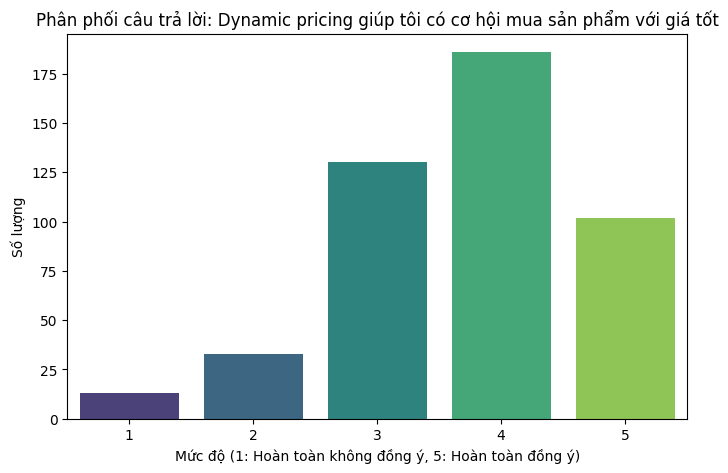

Tần suất và phần trăm cho câu hỏi: Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả
                                                    Frequency  Percentage (%)
Dynamic pricing khiến tôi cảm thấy khó dự đoán ...                           
1                                                          10        2.155172
2                                                          24        5.172414
3                                                         145       31.250000
4                                                         181       39.008621
5                                                         104       22.413793


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


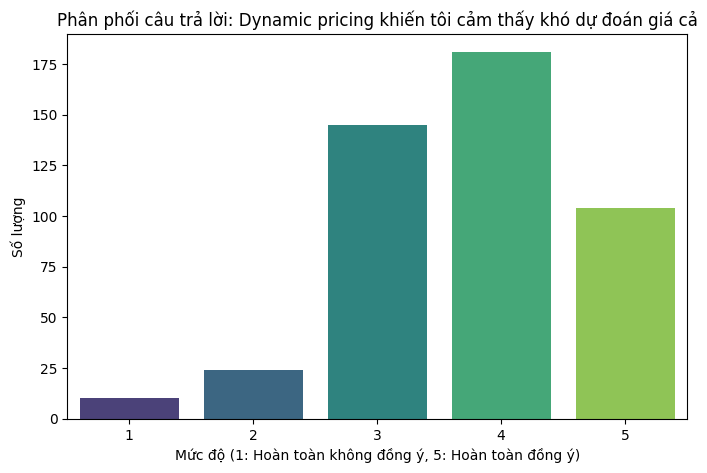

Tần suất và phần trăm cho câu hỏi: Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ
                                                    Frequency  Percentage (%)
Tôi tin rằng dynamic pricing là chiến lược hiệu...                           
1                                                          15        3.232759
2                                                          37        7.974138
3                                                         113       24.353448
4                                                         184       39.655172
5                                                         115       24.784483


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


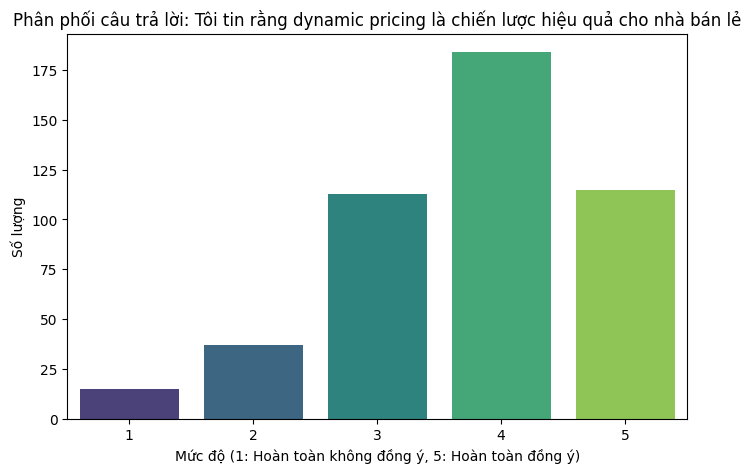

Tần suất và phần trăm cho câu hỏi: Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử
                                                    Frequency  Percentage (%)
Dynamic pricing làm tăng sự cạnh tranh giữa các...                           
1                                                          18        3.879310
2                                                          45        9.698276
3                                                         136       29.310345
4                                                         174       37.500000
5                                                          91       19.612069


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


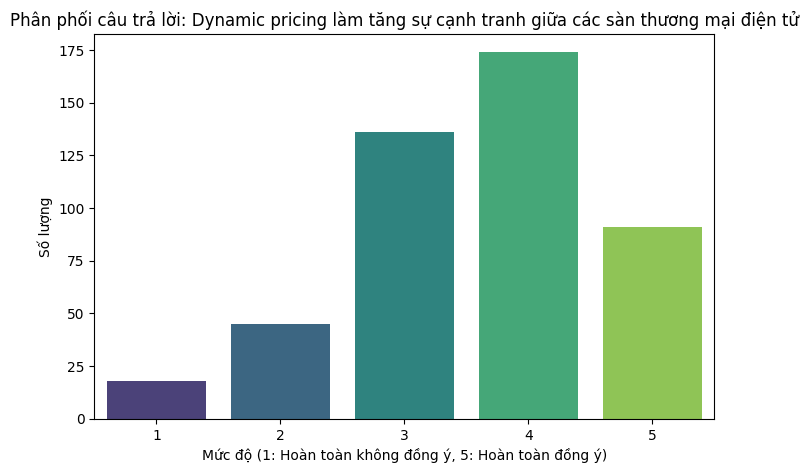

Tần suất và phần trăm cho câu hỏi: Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa
                                                    Frequency  Percentage (%)
Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynami...                           
1                                                           5        1.077586
2                                                          29        6.250000
3                                                         133       28.663793
4                                                         173       37.284483
5                                                         124       26.724138


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


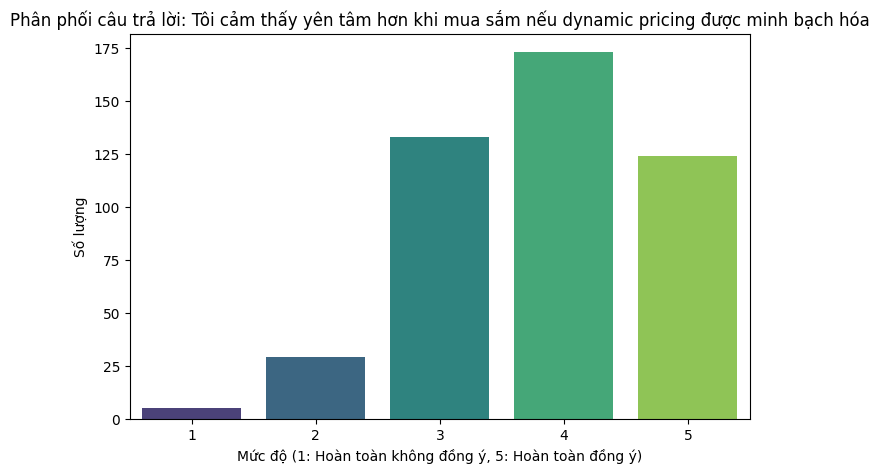

Tần suất và phần trăm cho câu hỏi: Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn
                                                    Frequency  Percentage (%)
Tôi ưu tiên mua sản phẩm thân thiện với môi trư...                           
1                                                           7        1.508621
2                                                          24        5.172414
3                                                         142       30.603448
4                                                         198       42.672414
5                                                          93       20.043103


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


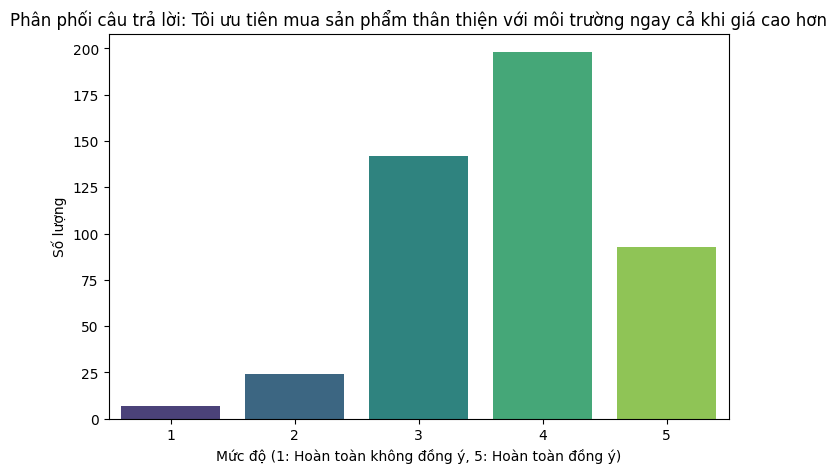

Tần suất và phần trăm cho câu hỏi: Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến
                                                    Frequency  Percentage (%)
Tôi thường tìm kiếm các sản phẩm bền vững khi m...                           
1                                                          22        4.741379
2                                                          50       10.775862
3                                                         155       33.405172
4                                                         147       31.681034
5                                                          90       19.396552


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


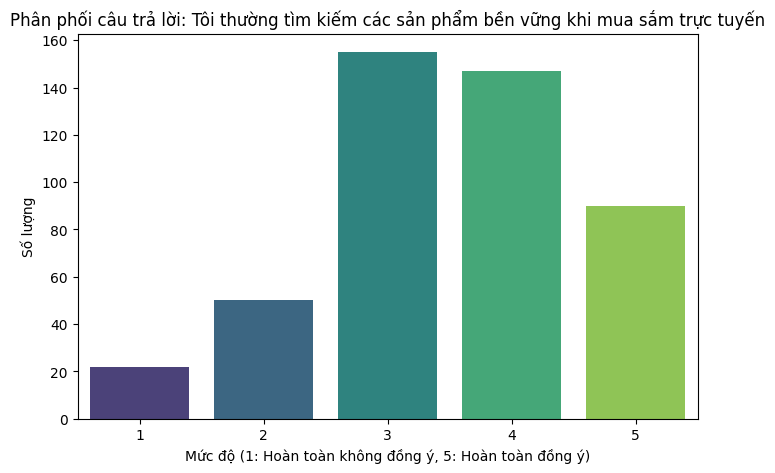

Tần suất và phần trăm cho câu hỏi: Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm
                                                    Frequency  Percentage (%)
Tôi có xu hướng trì hoãn mua sản phẩm bền vững ...                           
1                                                           5        1.077586
2                                                          11        2.370690
3                                                          76       16.379310
4                                                         159       34.267241
5                                                         213       45.905172


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


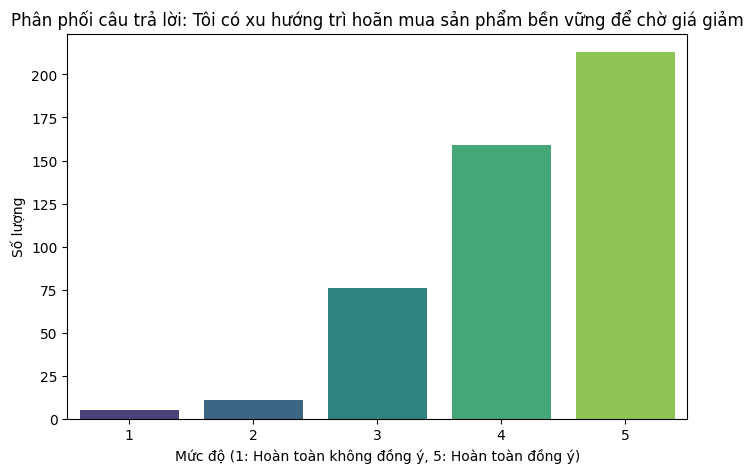

Tần suất và phần trăm cho câu hỏi: Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi
                                                    Frequency  Percentage (%)
Các chương trình giảm giá ảnh hưởng lớn đến quy...                           
1                                                           7        1.508621
2                                                          28        6.034483
3                                                         115       24.784483
4                                                         150       32.327586
5                                                         164       35.344828


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


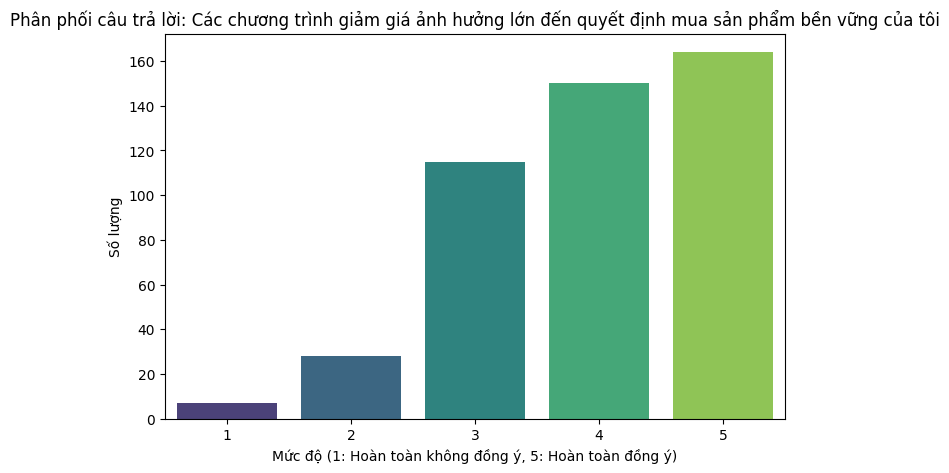

Tần suất và phần trăm cho câu hỏi: Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao
                                                    Frequency  Percentage (%)
Tôi sẵn sàng chấp nhận giá biến động nếu sản ph...                           
1                                                           5        1.077586
2                                                          18        3.879310
3                                                         140       30.172414
4                                                         195       42.025862
5                                                         106       22.844828


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


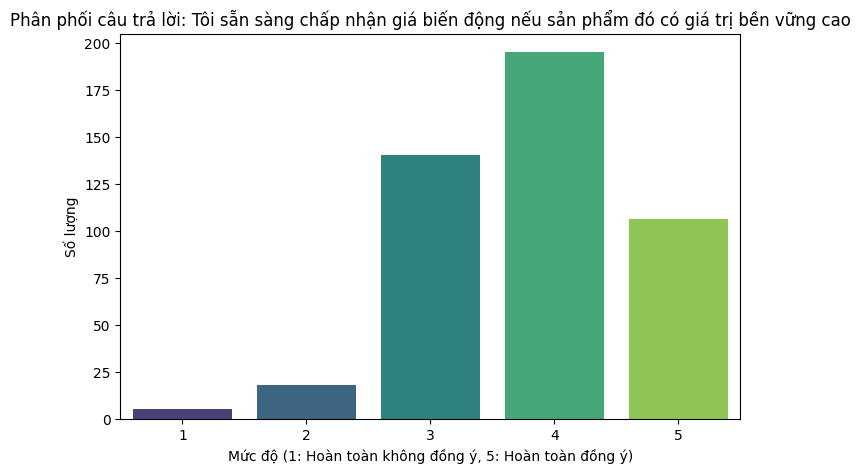

Tần suất và phần trăm cho câu hỏi: Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến
                                                    Frequency  Percentage (%)
Tôi chú trọng hơn đến việc so sánh giá trước kh...                           
1                                                           4        0.862069
2                                                          13        2.801724
3                                                         151       32.543103
4                                                         184       39.655172
5                                                         112       24.137931


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


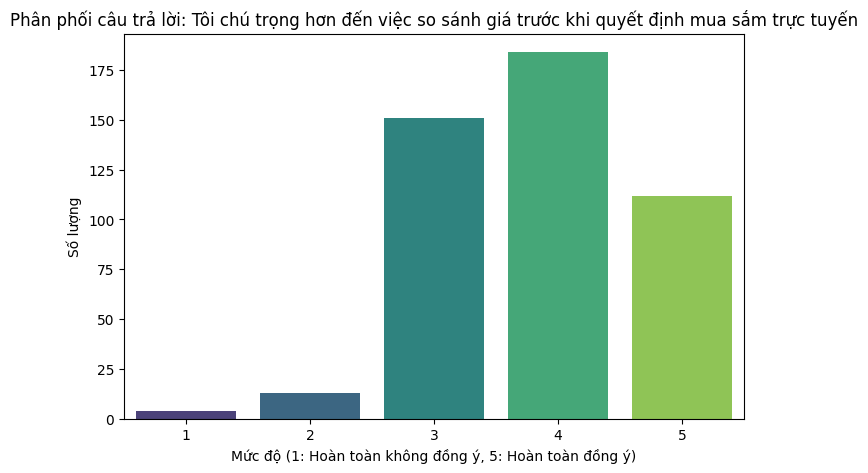

Tần suất và phần trăm cho câu hỏi: Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế
                                                    Frequency  Percentage (%)
Tôi ưu tiên mua các sản phẩm thiết yếu hơn là c...                           
1                                                           4        0.862069
2                                                          19        4.094828
3                                                         126       27.155172
4                                                         187       40.301724
5                                                         128       27.586207


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


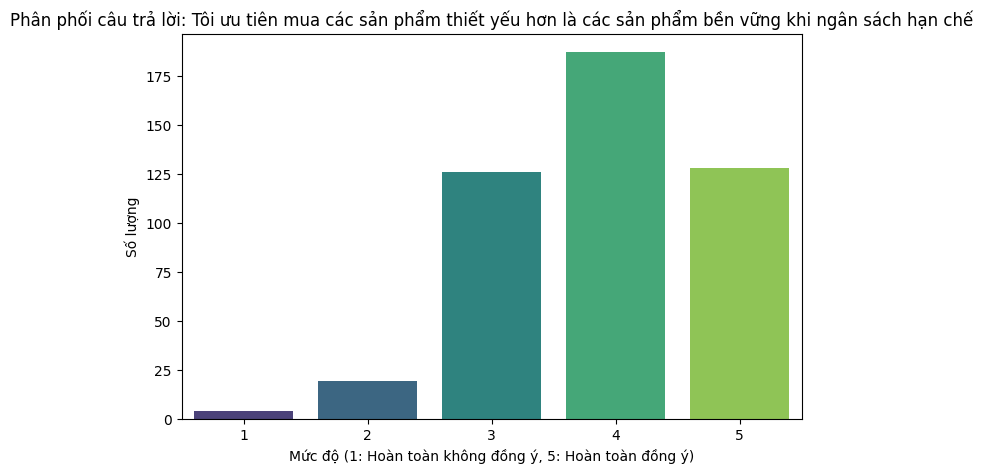

Tần suất và phần trăm cho câu hỏi: Tôi cảm thấy các chiến lược định giá động ngày càng phổ biến trên các nền tảng thương mại điện tử
                                                    Frequency  Percentage (%)
Tôi cảm thấy các chiến lược định giá động ngày ...                           
1                                                           5        1.077586
2                                                          16        3.448276
3                                                         110       23.706897
4                                                         184       39.655172
5                                                         149       32.112069


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


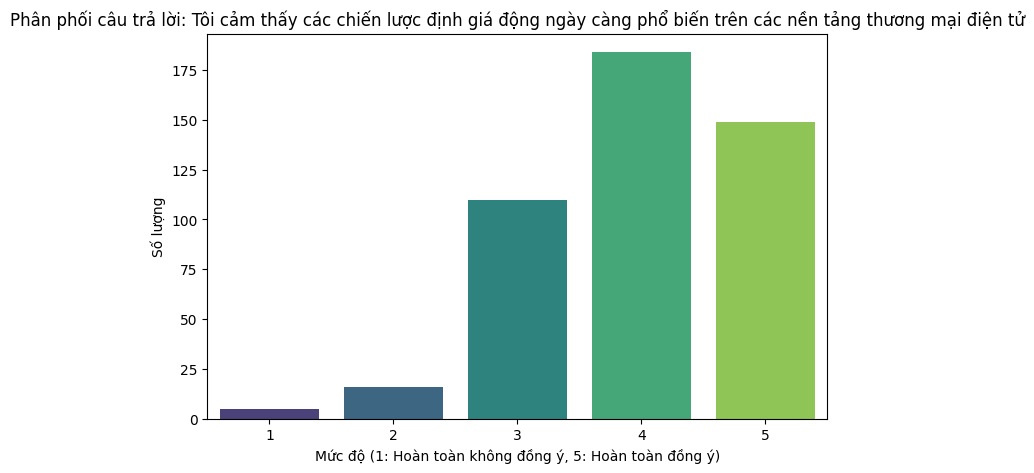

Tần suất và phần trăm cho câu hỏi: Tôi tin rằng việc minh bạch hóa thông tin định giá sẽ giúp tăng niềm tin vào thương mại điện tử
                                                    Frequency  Percentage (%)
Tôi tin rằng việc minh bạch hóa thông tin định ...                           
1                                                          16        3.448276
2                                                          41        8.836207
3                                                         159       34.267241
4                                                         137       29.525862
5                                                         111       23.922414


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


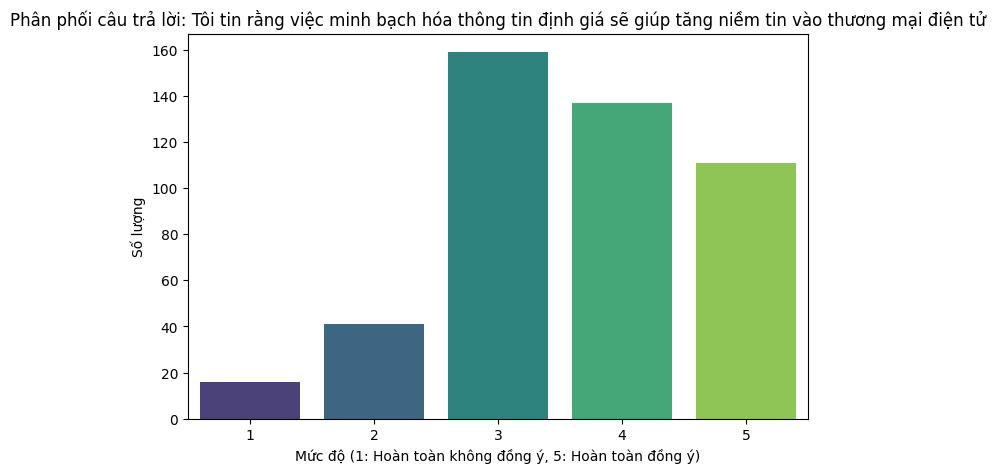

Tần suất và phần trăm cho câu hỏi: Tôi bị thu hút bởi các chương trình khuyến mãi khi mua sắm trực tuyến
                                                    Frequency  Percentage (%)
Tôi bị thu hút bởi các chương trình khuyến mãi ...                           
1                                                          16        3.448276
2                                                          57       12.284483
3                                                         174       37.500000
4                                                         144       31.034483
5                                                          73       15.732759


<ipython-input-6-1299c313b030>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')


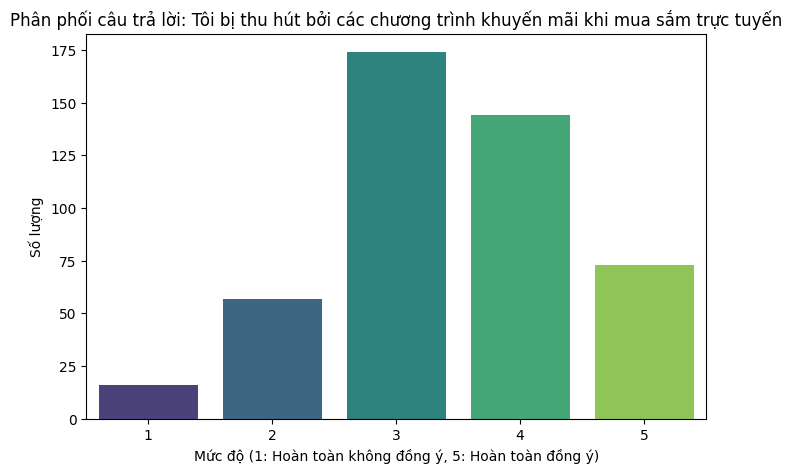

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_form.csv'
cleaned_form = pd.read_csv(file_path)

likert_columns = [
    "Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt",
    "Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả",
    "Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ",
    "Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử",
    "Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa",
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm",
    "Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao",
    "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
    "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế",
    "Tôi cảm thấy các chiến lược định giá động ngày càng phổ biến trên các nền tảng thương mại điện tử",
    "Tôi tin rằng việc minh bạch hóa thông tin định giá sẽ giúp tăng niềm tin vào thương mại điện tử",
    "Tôi bị thu hút bởi các chương trình khuyến mãi khi mua sắm trực tuyến"
]
for col in likert_columns:

    freq_table = cleaned_form[col].value_counts().sort_index()
    percent_table = cleaned_form[col].value_counts(normalize=True).sort_index() * 100
    result_table = pd.DataFrame({
        'Frequency': freq_table,
        'Percentage (%)': percent_table
    })

    print(f"Tần suất và phần trăm cho câu hỏi: {col}")
    print(result_table)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')
    plt.title(f"Phân phối câu trả lời: {col}")
    plt.xlabel("Mức độ (1: Hoàn toàn không đồng ý, 5: Hoàn toàn đồng ý)")
    plt.ylabel("Số lượng")
    plt.show()

phân phối và gộp nhóm dữ liệu (độ tuổi, thu nhập, giới tính)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_form.csv'

cleaned_data = pd.read_csv(file_path)

def weighted_frequency_table(column, weights):
    freq_table = cleaned_data[column].value_counts()
    weighted_freq_table = freq_table * freq_table.index.map(weights)
    percent_table = weighted_freq_table / weighted_freq_table.sum() * 100
    return pd.DataFrame({'Weighted Frequency': weighted_freq_table, 'Percentage (%)': percent_table})

weights = {'Nữ': 1.45, 'Nam': 3.21}

gender_weighted_freq_table = weighted_frequency_table('Giới tính', weights)
print(gender_weighted_freq_table)

           Weighted Frequency  Percentage (%)
Giới tính                                    
Nữ                     462.55        49.84375
Nam                    465.45        50.15625


In [8]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/form.csv'
cleaned_form = pd.read_csv(file_path)

def group_age(form, min_samples=50):
    age_counts = form['Độ tuổi'].value_counts()
    if age_counts['Dưới 18'] < min_samples or age_counts['Trên 30'] < min_samples:
        form['Độ tuổi'] = form['Độ tuổi'].apply(lambda x: 'Khác' if x == 'Dưới 18' or x == 'Trên 30' else x)
    return form

cleaned_form = group_age(cleaned_form)

print(cleaned_form['Độ tuổi'].value_counts())


Độ tuổi
18 - 30    406
Khác        58
Name: count, dtype: int64


In [9]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/form.csv'
cleaned_form = pd.read_csv(file_path)

def group_income(form, min_samples=50):
    income_counts = form['Thu nhập'].value_counts()
    print("Unique values in 'Thu nhập':", form['Thu nhập'].unique())

    if income_counts['5 - 10 triệu'] < min_samples or income_counts['10 - 15  triệu'] < min_samples or income_counts['Trên 15 triệu'] < min_samples:
        form['Thu nhập'] = form['Thu nhập'].apply(lambda x: 'Thu nhập thấp' if x == 'Dưới 5 triệu' or x == '5 - 10 triệu' else 'Thu nhập cao')

    return form

cleaned_form = group_income(cleaned_form)

print(cleaned_form['Thu nhập'].value_counts())


Unique values in 'Thu nhập': ['5 - 10 triệu' 'Dưới 5 triệu' '10 - 15  triệu' 'Trên 15 triệu']
Thu nhập
Thu nhập thấp    451
Thu nhập cao      13
Name: count, dtype: int64


In [11]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/form.csv'
cleaned_form = pd.read_csv(file_path)

def group_likert(form, likert_columns):
    form.columns = form.columns.str.strip().str.replace('\n', '')
    for column in likert_columns:
        column = column.strip().replace('\n', '')
        form[column] = form[column].apply(lambda x: 'Đồng thuận' if x in [4, 5]
                                          else ('Phản đối' if x in [1, 2] else 'Trung lập'))
    return form


likert_columns = [
    "Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt",
    "Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả",
    "Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ",
    "Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử",
    "Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa",
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm",
    "Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao",
    "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
    "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế",
    "Tôi cảm thấy các chiến lược định giá động ngày càng phổ biến trên các nền tảng thương mại điện tử",
    "Tôi tin rằng việc minh bạch hóa thông tin định giá sẽ giúp tăng niềm tin vào thương mại điện tử",
    "Tôi bị thu hút bởi các chương trình khuyến mãi khi mua sắm trực tuyến"
]

cleaned_form = group_likert(cleaned_form, likert_columns)
print(cleaned_form[likert_columns].head())


  Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt  \
0                                          Trung lập            
1                                         Đồng thuận            
2                                          Trung lập            
3                                         Đồng thuận            
4                                         Đồng thuận            

  Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả  \
0                                         Đồng thuận      
1                                          Trung lập      
2                                          Trung lập      
3                                          Trung lập      
4                                          Trung lập      

  Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ  \
0                                         Đồng thuận                   
1                                         Đồng thuận                   
2                                     

phân tích mô tả

In [14]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/form.csv'
cleaned_form = pd.read_csv(file_path)
cleaned_form.columns = cleaned_form.columns.str.strip()

gender_counts = cleaned_form['Giới tính'].value_counts()
gender_percentage = gender_counts / gender_counts.sum() * 100

age_counts = cleaned_form['Độ tuổi'].value_counts()
age_percentage = age_counts / age_counts.sum() * 100

income_counts = cleaned_form['Thu nhập'].value_counts()
income_percentage = income_counts / income_counts.sum() * 100

shopping_freq_counts = cleaned_form['Tần suất mua sắm trực tuyến'].value_counts()
shopping_freq_percentage = shopping_freq_counts / shopping_freq_counts.sum() * 100

def group_likert(form):
    likert_columns = [
        "Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt",
        "Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả",
        "Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ",
        "Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử",
        "Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa",
        "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
        "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
        "Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm",
        "Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi",
        "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao",
        "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
        "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế",
        "Tôi cảm thấy các chiến lược định giá động ngày càng phổ biến trên các nền tảng thương mại điện tử",
        "Tôi tin rằng việc minh bạch hóa thông tin định giá sẽ giúp tăng niềm tin vào thương mại điện tử",
        "Tôi bị thu hút bởi các chương trình khuyến mãi khi mua sắm trực tuyến"
    ]
    for column in likert_columns:
        form[column] = form[column].replace({1: 'Phản đối', 2: 'Phản đối', 3: 'Trung lập', 4: 'Đồng thuận', 5: 'Đồng thuận'})

    return form

cleaned_form = group_likert(cleaned_form)

likert_counts = cleaned_form[likert_columns].apply(lambda x: x.value_counts())
likert_percentage = likert_counts / likert_counts.sum() * 100

likert_mean = cleaned_form[likert_columns].apply(lambda x: x.replace({'Phản đối': 1, 'Trung lập': 3, 'Đồng thuận': 5}).mean())

print("Tần suất và tỷ lệ phần trăm Giới tính:")
print(gender_counts, gender_percentage)
print("\nTần suất và tỷ lệ phần trăm Độ tuổi:")
print(age_counts, age_percentage)
print("\nTần suất và tỷ lệ phần trăm Thu nhập:")
print(income_counts, income_percentage)
print("\nTần suất và tỷ lệ phần trăm Tần suất mua sắm trực tuyến:")
print(shopping_freq_counts, shopping_freq_percentage)

print("\nTần suất và tỷ lệ phần trăm các câu trả lời Likert:")
print(likert_counts, likert_percentage)

print("\nĐiểm trung bình của các câu trả lời Likert:")
print(likert_mean)

Tần suất và tỷ lệ phần trăm Giới tính:
Giới tính
Nữ     319
Nam    145
Name: count, dtype: int64 Giới tính
Nữ     68.75
Nam    31.25
Name: count, dtype: float64

Tần suất và tỷ lệ phần trăm Độ tuổi:
Độ tuổi
18 - 30    406
Dưới 18     42
Trên 30     16
Name: count, dtype: int64 Độ tuổi
18 - 30    87.500000
Dưới 18     9.051724
Trên 30     3.448276
Name: count, dtype: float64

Tần suất và tỷ lệ phần trăm Thu nhập:
Thu nhập
Dưới 5 triệu      365
5 - 10 triệu       86
10 - 15  triệu     10
Trên 15 triệu       3
Name: count, dtype: int64 Thu nhập
Dưới 5 triệu      78.663793
5 - 10 triệu      18.534483
10 - 15  triệu     2.155172
Trên 15 triệu      0.646552
Name: count, dtype: float64

Tần suất và tỷ lệ phần trăm Tần suất mua sắm trực tuyến:
Tần suất mua sắm trực tuyến
Thỉnh thoảng    286
Thường xuyên    178
Name: count, dtype: int64 Tần suất mua sắm trực tuyến
Thỉnh thoảng    61.637931
Thường xuyên    38.362069
Name: count, dtype: float64

Tần suất và tỷ lệ phần trăm các câu trả lời Likert:

<ipython-input-14-8b8d7c9bf7a8>:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  likert_mean = cleaned_form[likert_columns].apply(lambda x: x.replace({'Phản đối': 1, 'Trung lập': 3, 'Đồng thuận': 5}).mean())


<ipython-input-15-85abd7a135ee>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_form[likert_columns] = cleaned_form[likert_columns].replace({'Phản đối': 1, 'Trung lập': 3, 'Đồng thuận': 5})
<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


Thống kê mô tả cho các câu hỏi Likert:
                                                        Mean    StdDev  Min  \
Dynamic pricing giúp tôi có cơ hội mua sản phẩm...  4.043103  1.339819    1   
Dynamic pricing khiến tôi cảm thấy khó dự đoán ...  4.081897  1.258138    1   
Tôi tin rằng dynamic pricing là chiến lược hiệu...  4.064655  1.377120    1   
Dynamic pricing làm tăng sự cạnh tranh giữa các...  3.870690  1.440123    1   
Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynami...  4.133621  1.253690    1   
Tôi ưu tiên mua sản phẩm thân thiện với môi trư...  4.120690  1.234180    1   
Tôi thường tìm kiếm các sản phẩm bền vững khi m...  3.711207  1.470591    1   
Tôi có xu hướng trì hoãn mua sản phẩm bền vững ...  4.534483  0.996157    1   
Các chương trình giảm giá ảnh hưởng lớn đến quy...  4.202586  1.251312    1   
Tôi sẵn sàng chấp nhận giá biến động nếu sản ph...  4.198276  1.166263    1   
Tôi chú trọng hơn đến việc so sánh giá trước kh...  4.202586  1.120164    1   
Tôi ưu tiên m

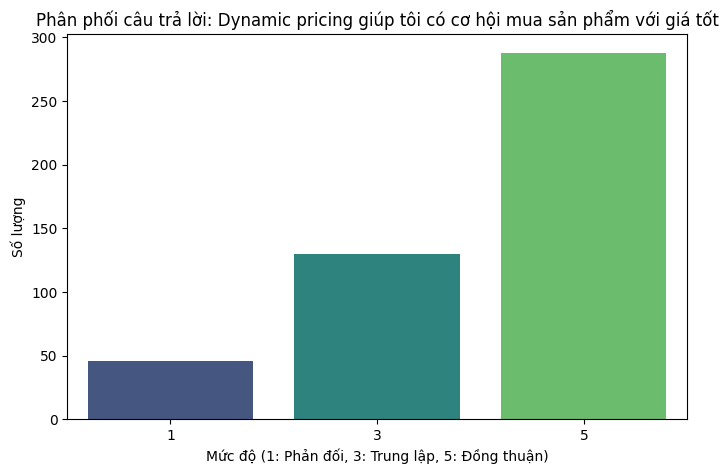

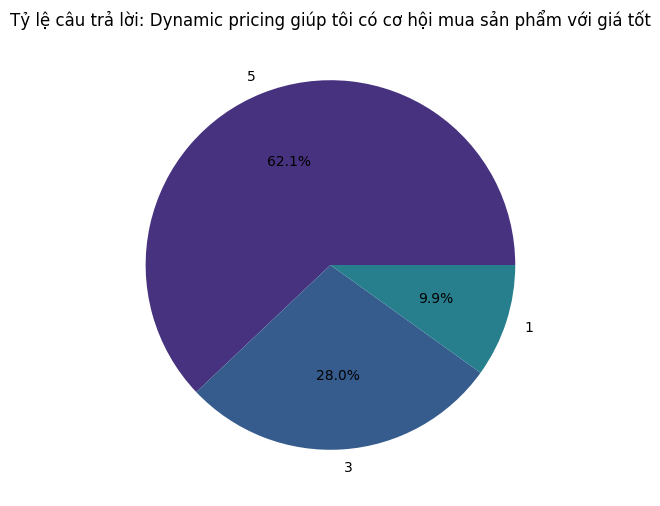

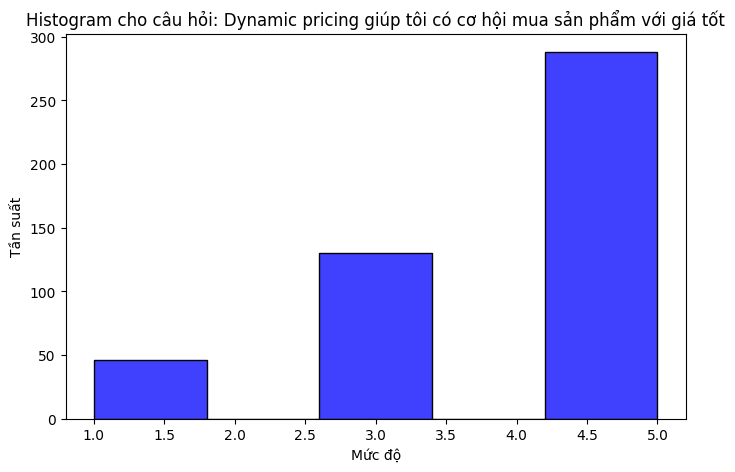

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


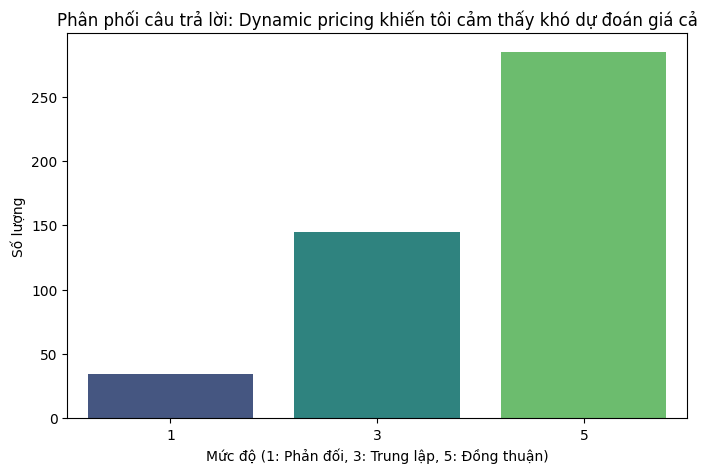

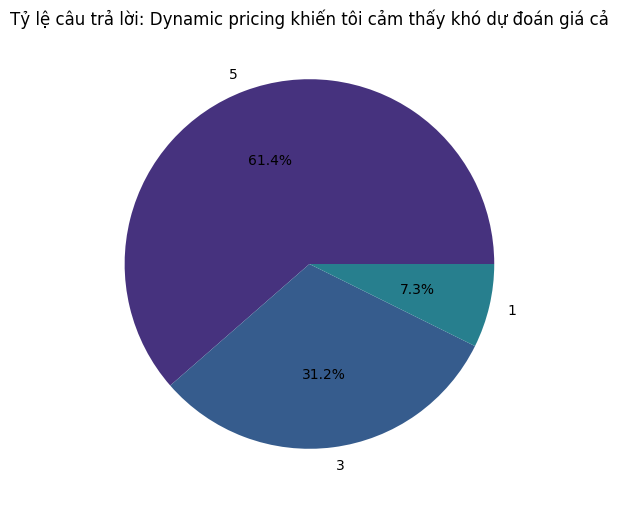

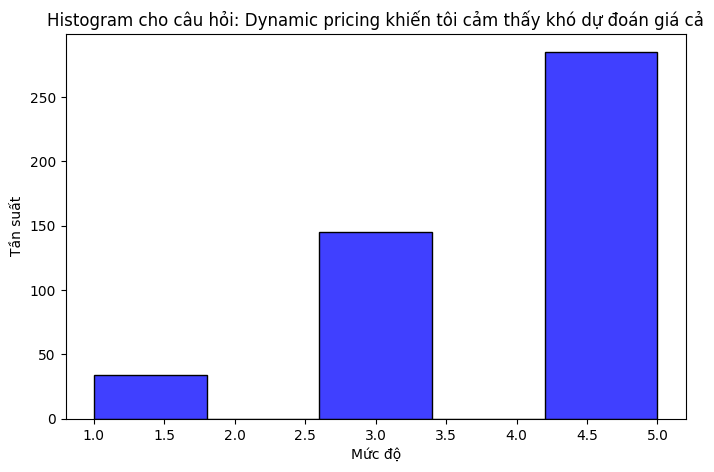

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


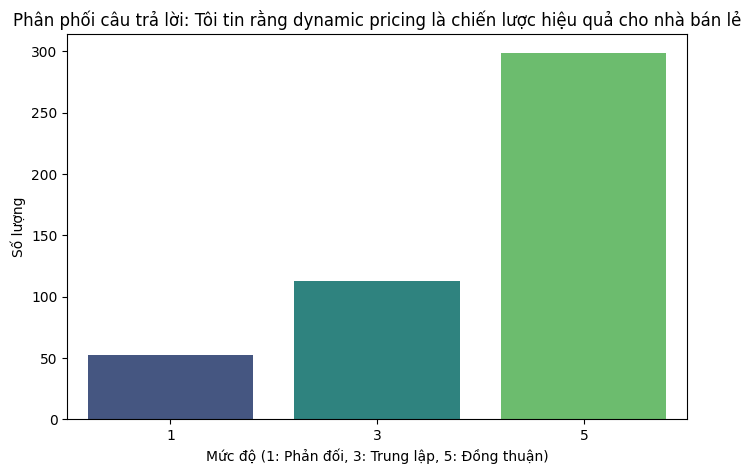

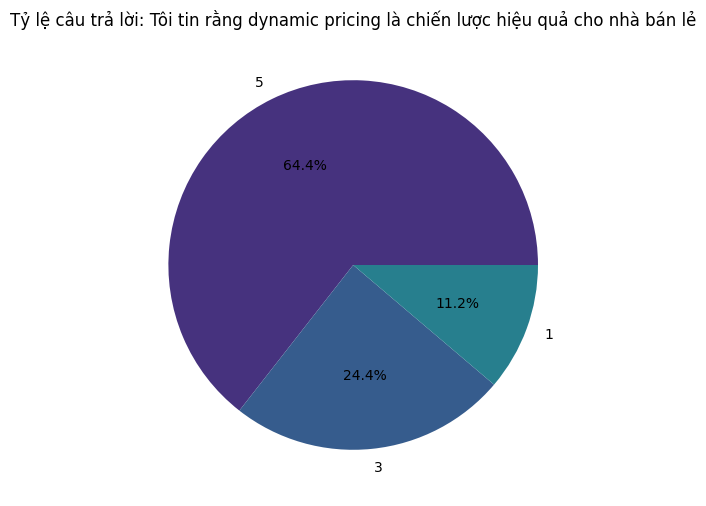

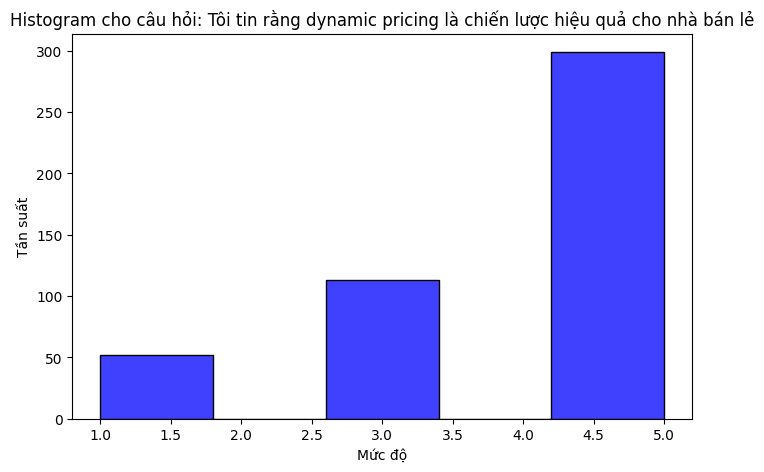

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


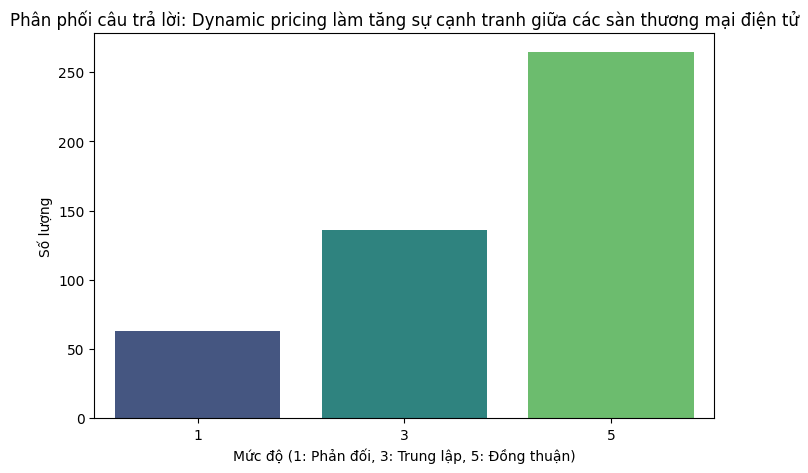

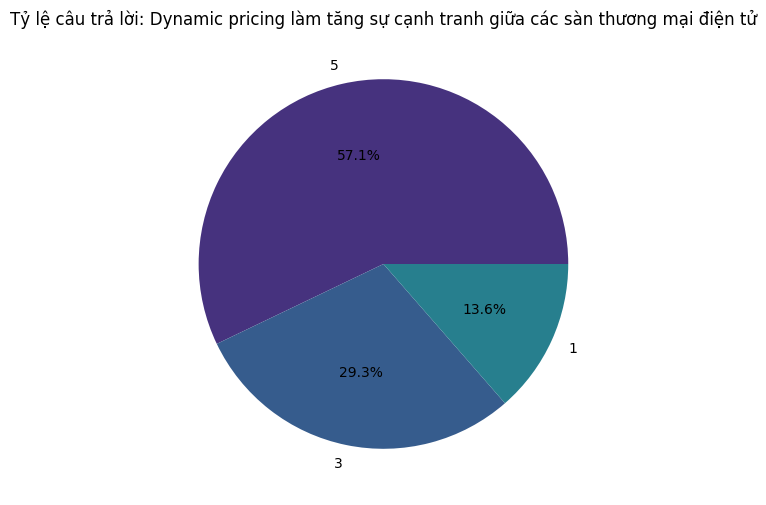

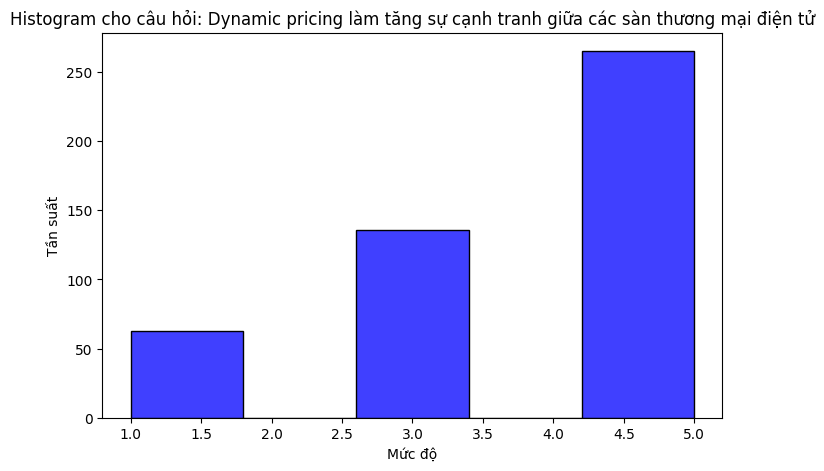

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


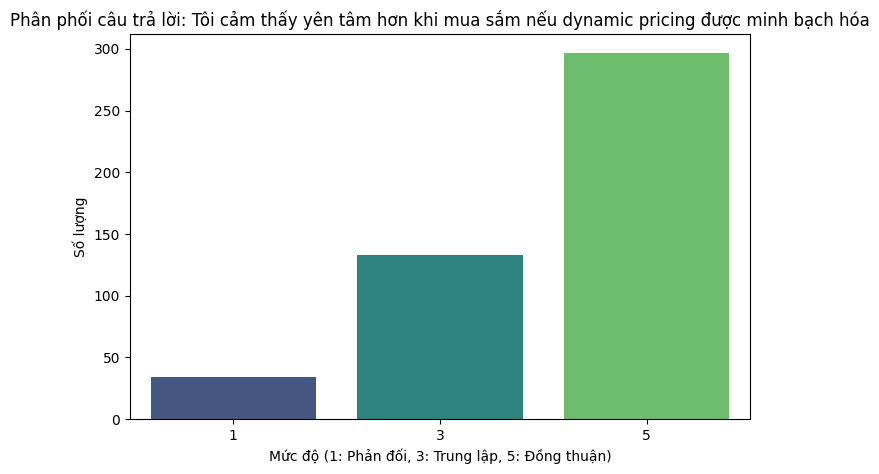

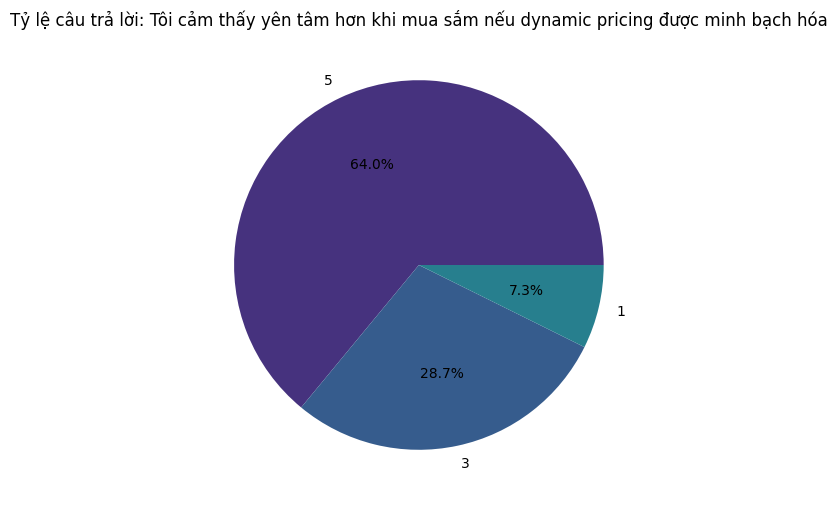

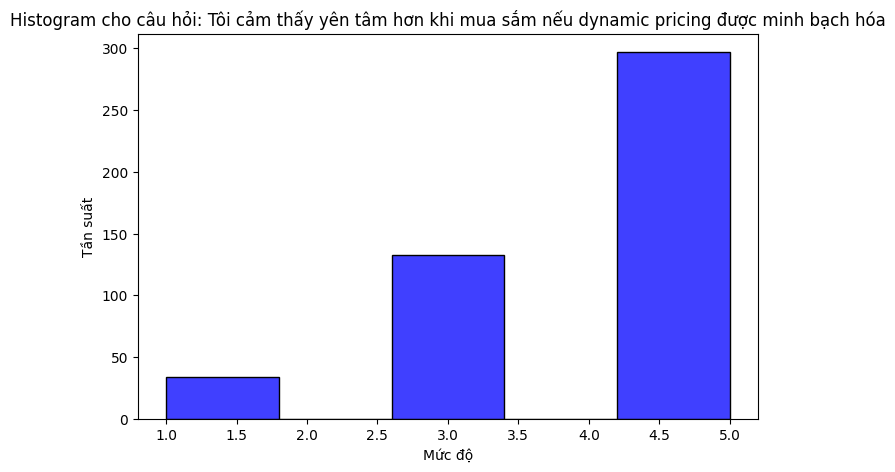

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


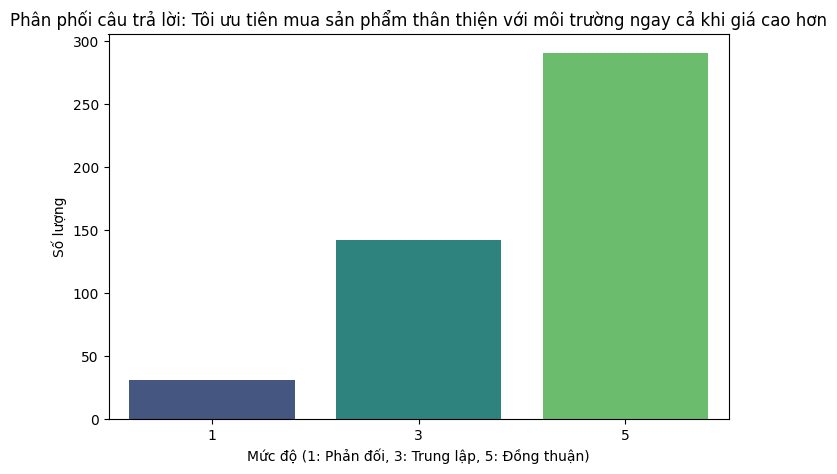

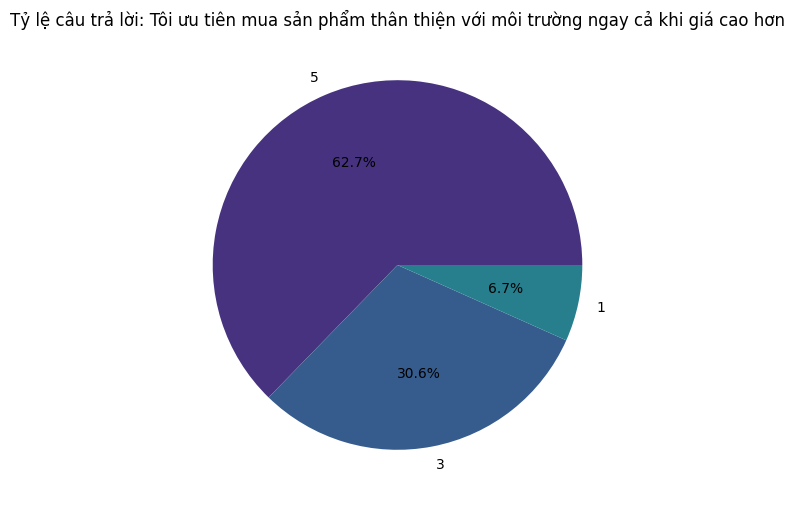

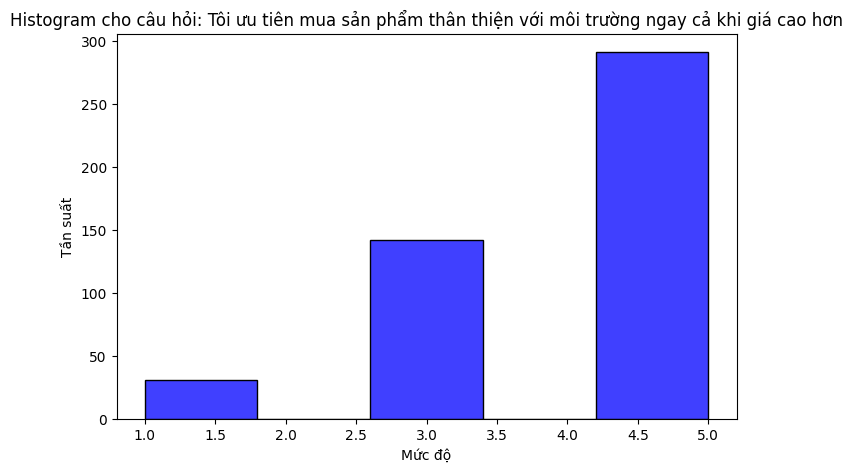

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


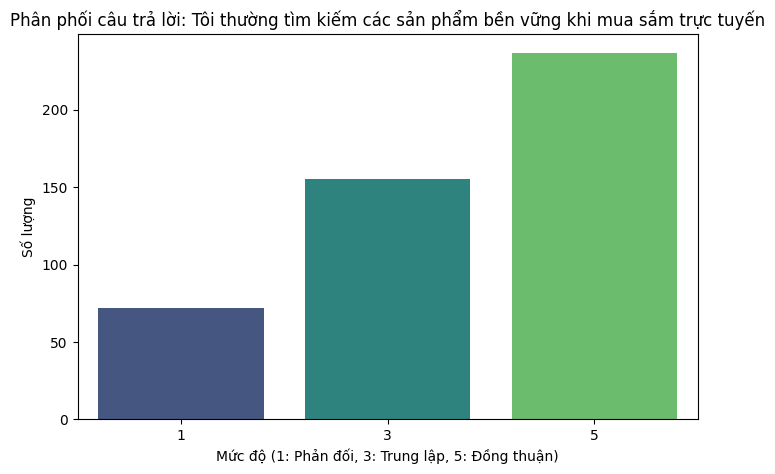

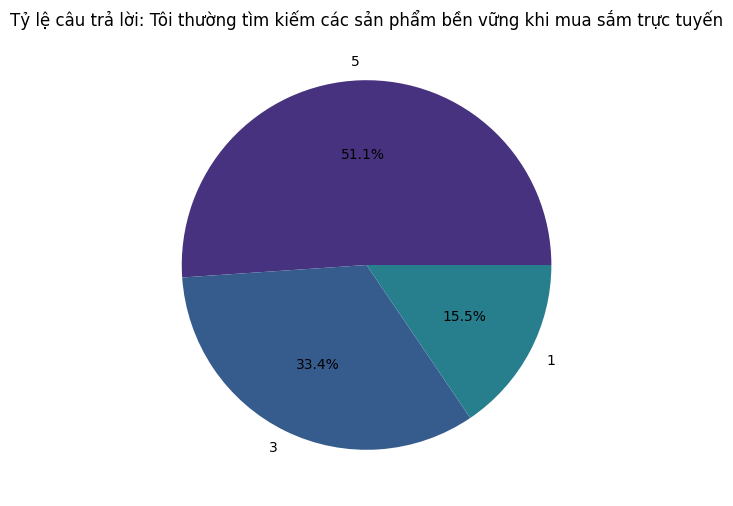

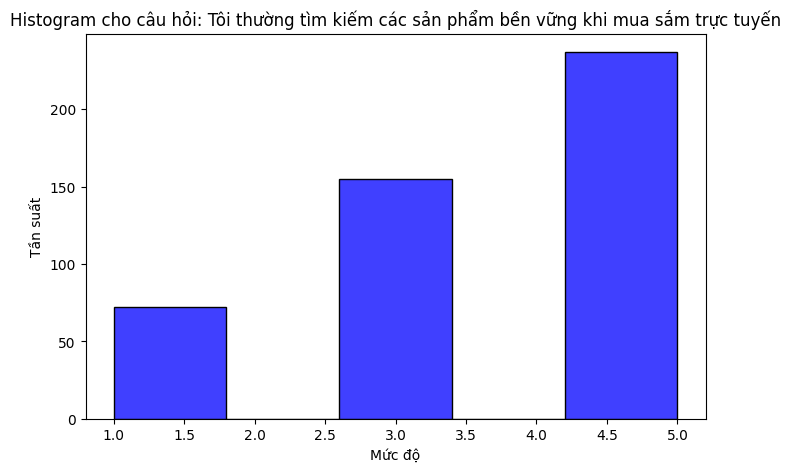

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


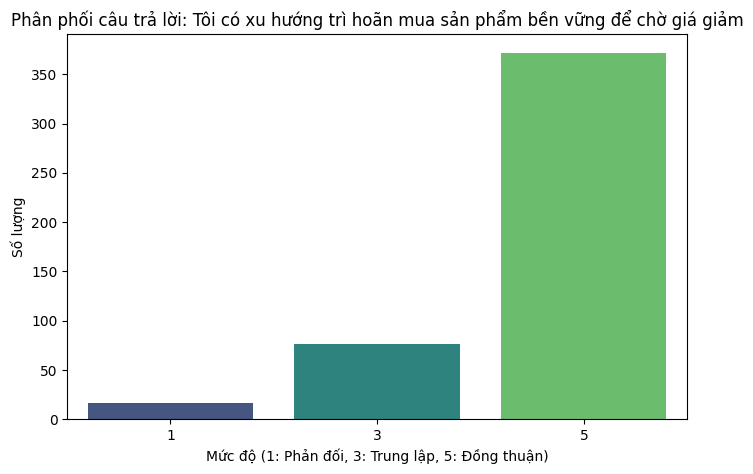

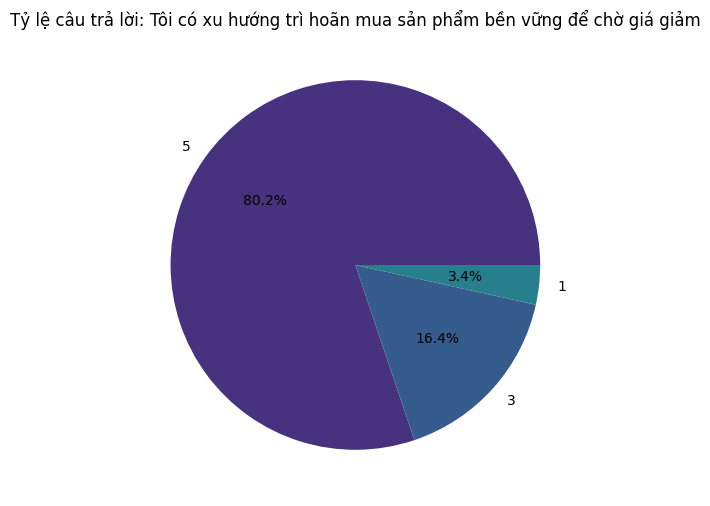

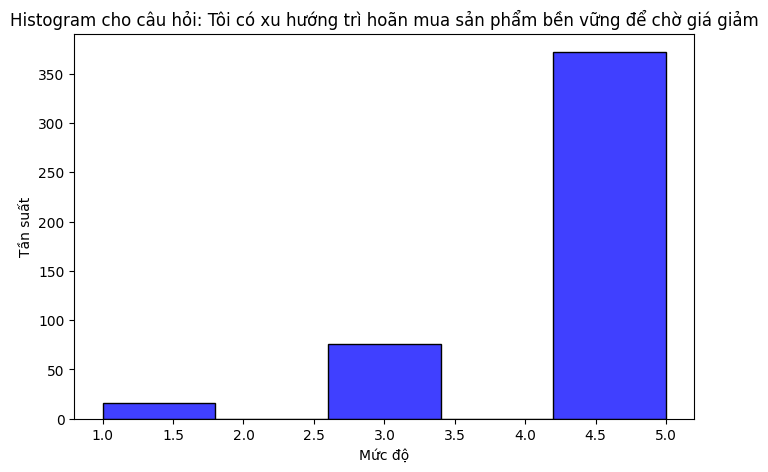

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


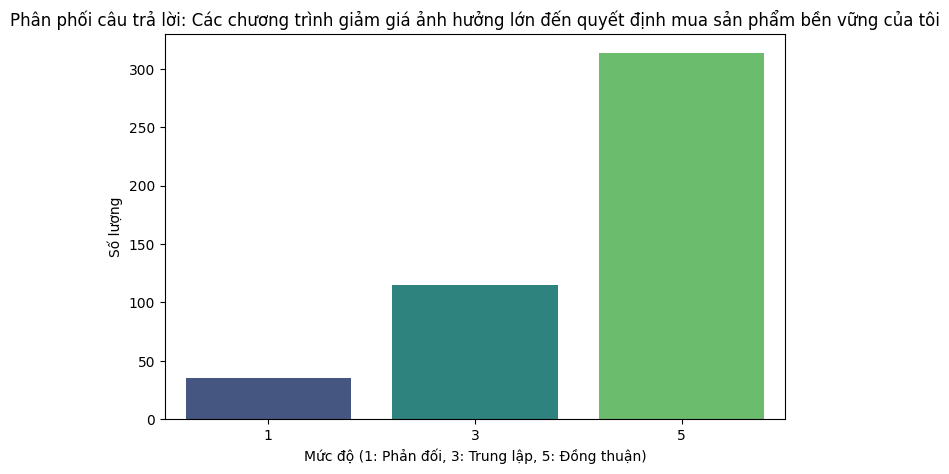

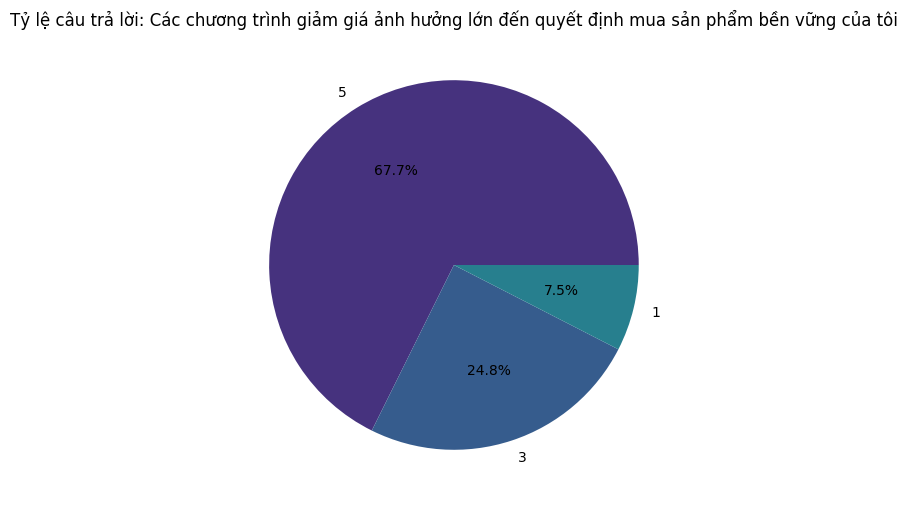

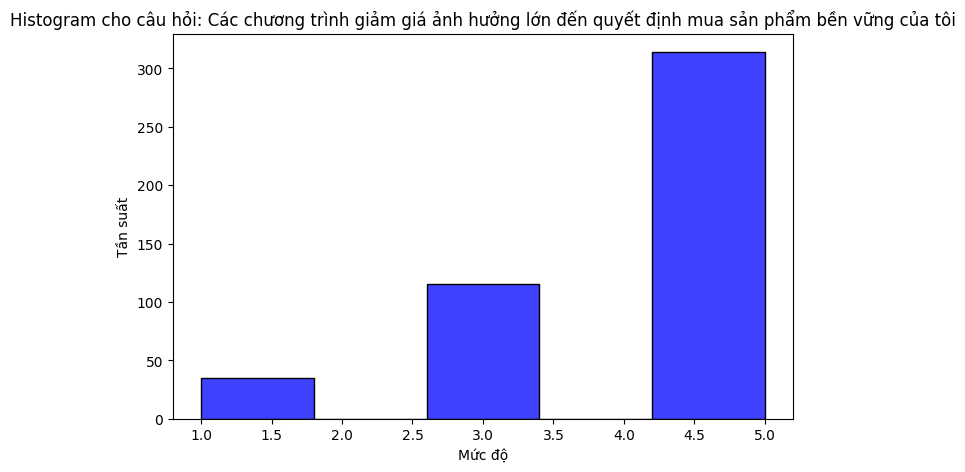

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


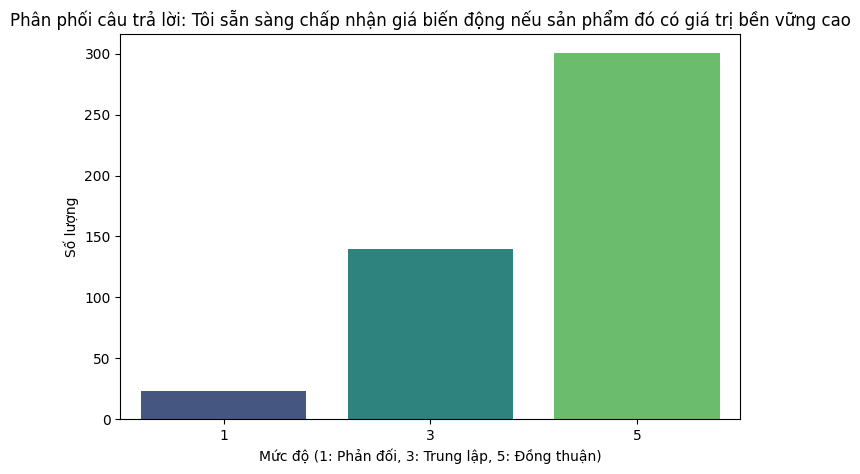

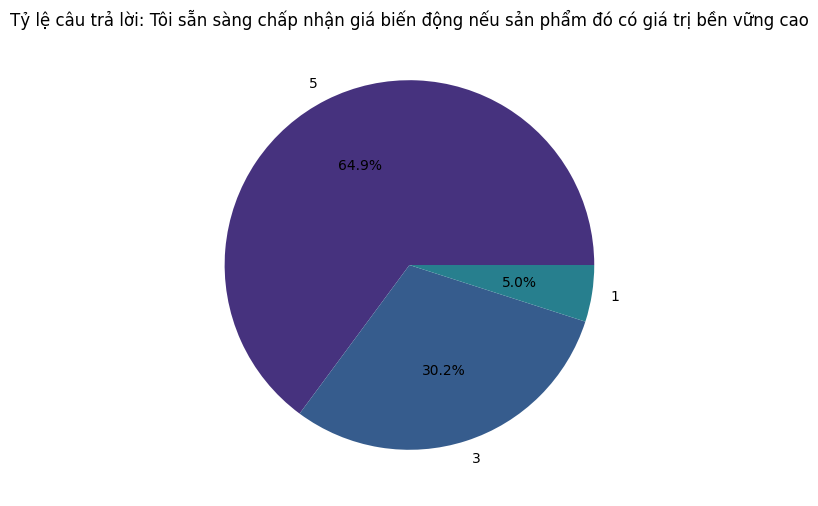

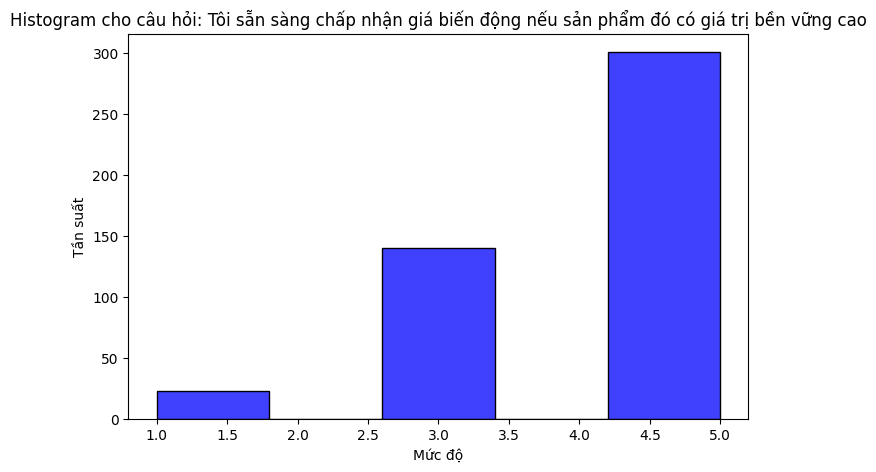

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


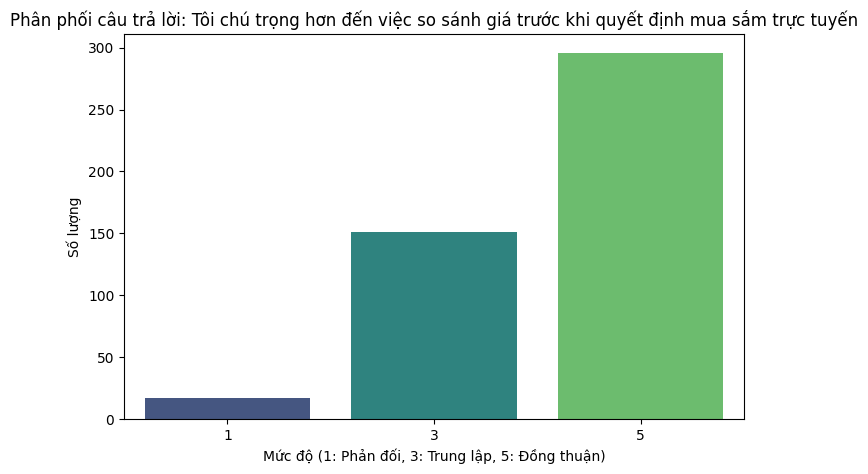

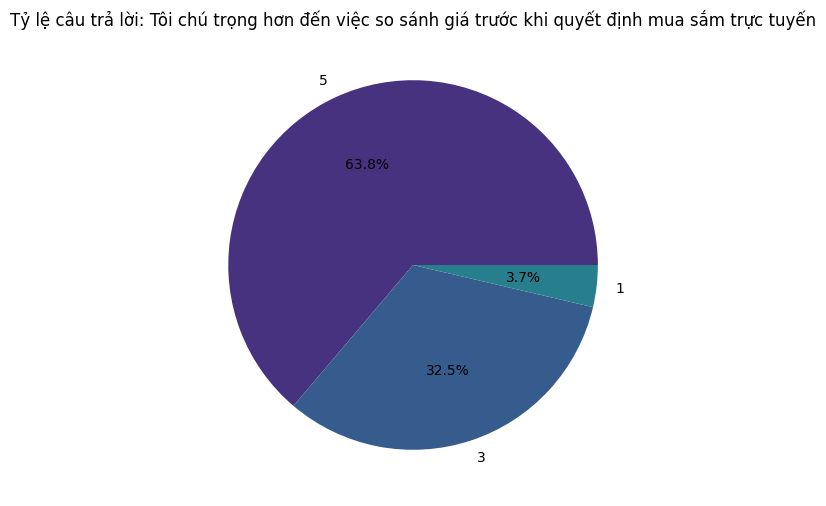

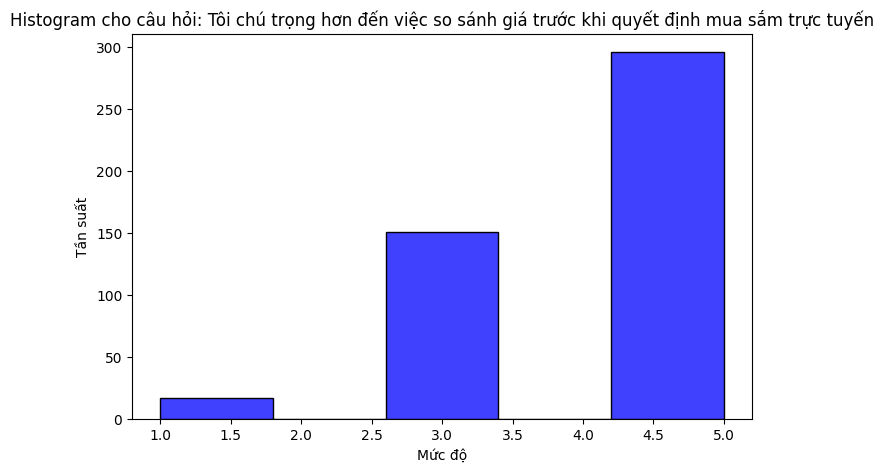

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


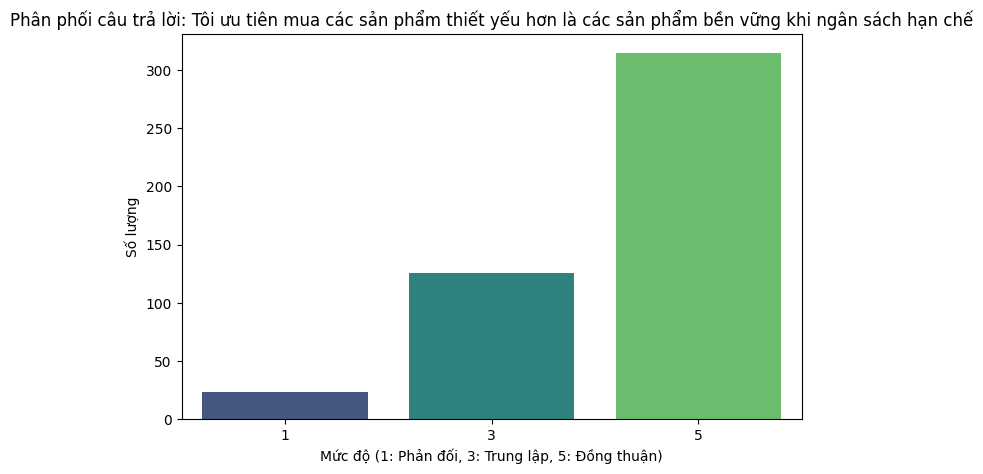

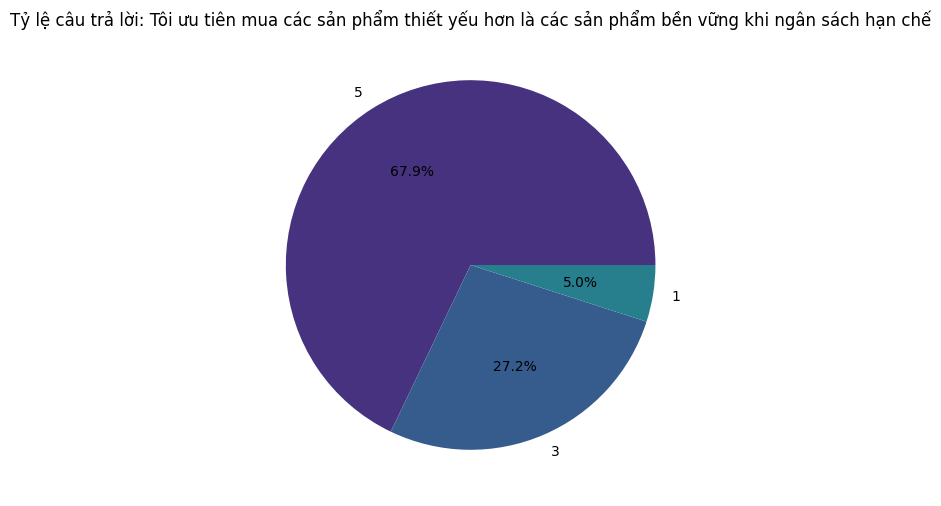

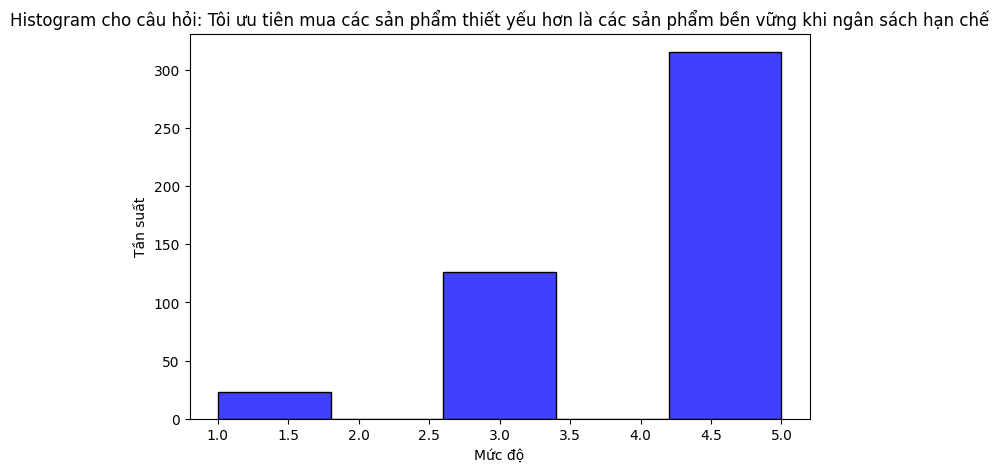

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


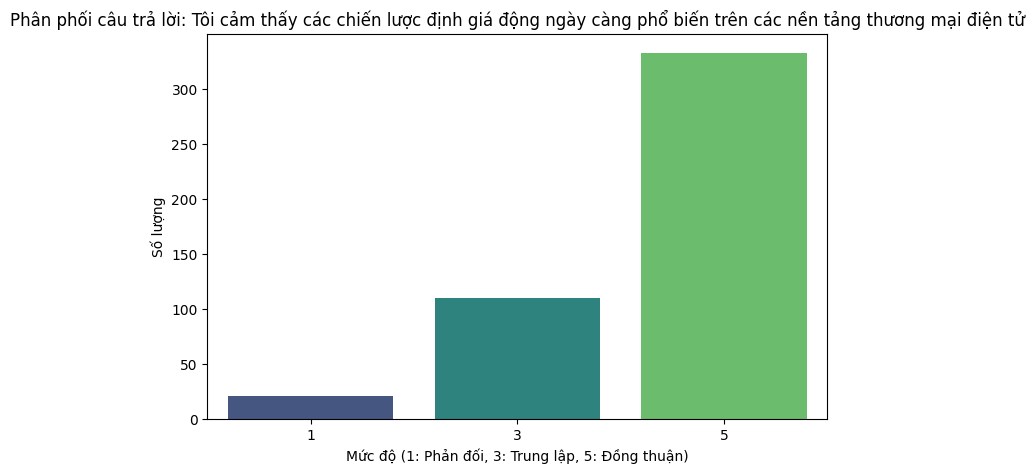

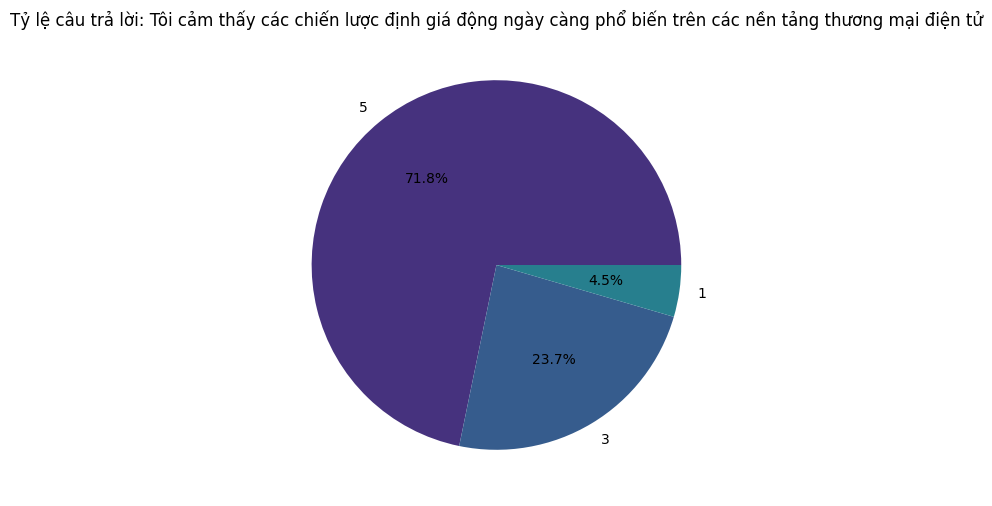

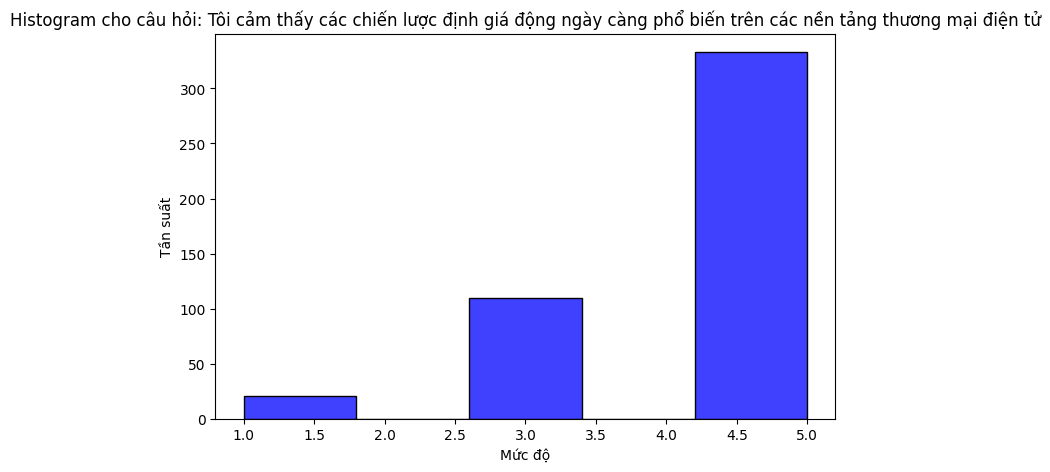

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


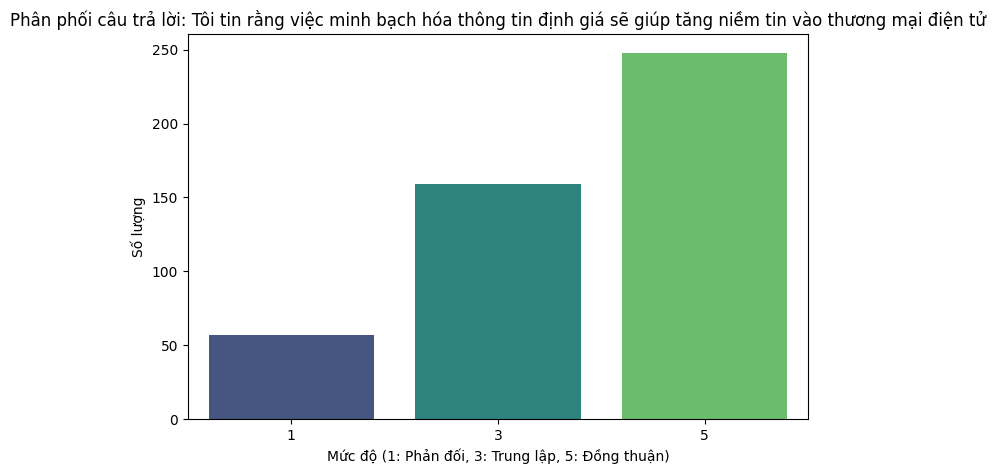

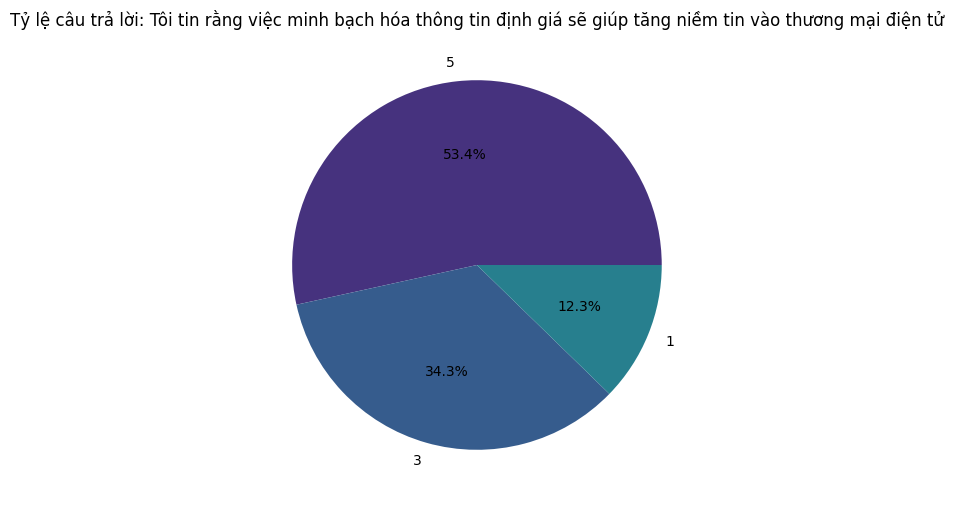

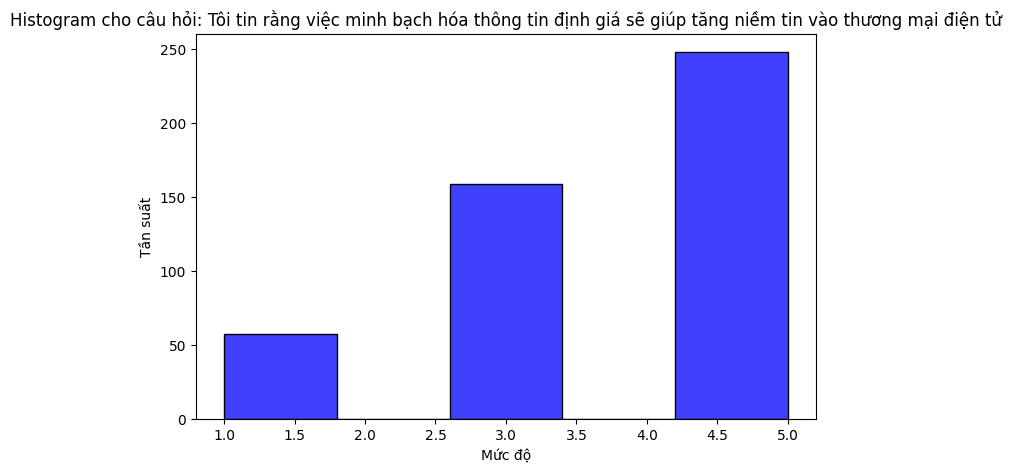

<ipython-input-15-85abd7a135ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_form[column], palette='viridis')


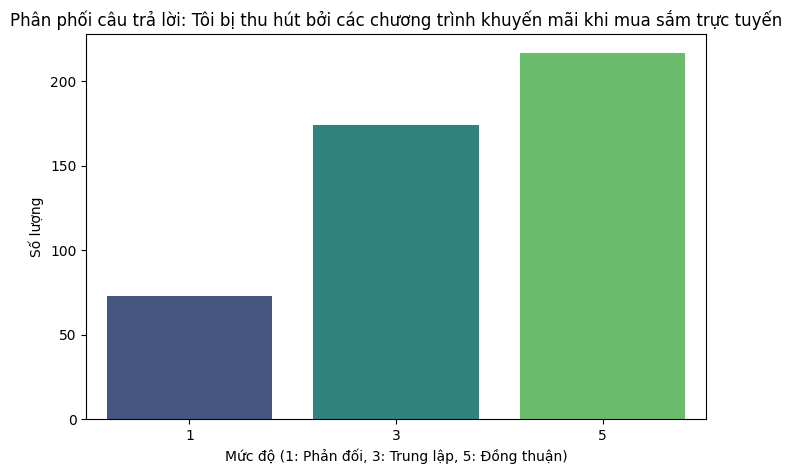

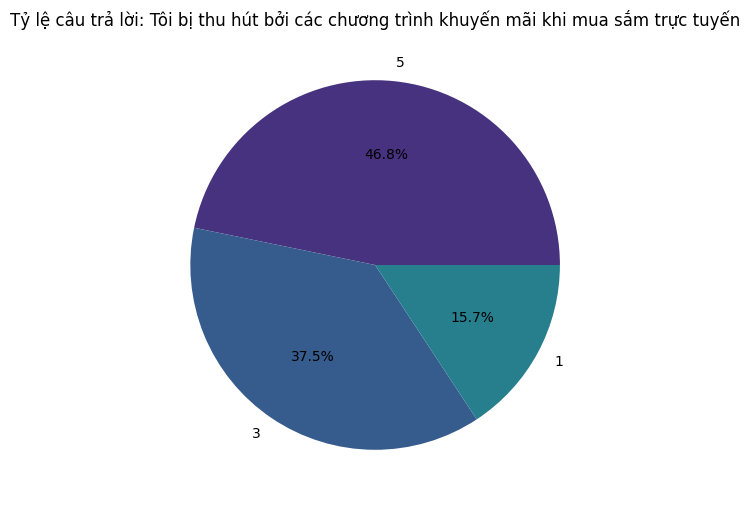

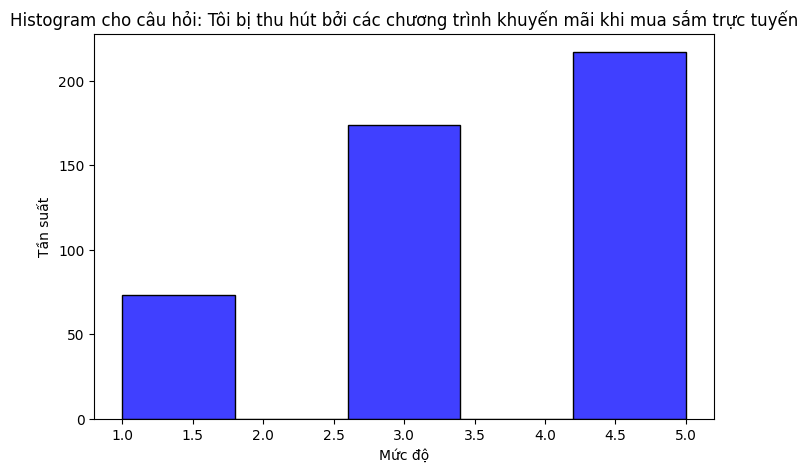

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_form[likert_columns] = cleaned_form[likert_columns].replace({'Phản đối': 1, 'Trung lập': 3, 'Đồng thuận': 5})

likert_stats = pd.DataFrame({
    'Mean': cleaned_form[likert_columns].mean(),
    'StdDev': cleaned_form[likert_columns].std(),
    'Min': cleaned_form[likert_columns].min(),
    'Max': cleaned_form[likert_columns].max()
})
print("Thống kê mô tả cho các câu hỏi Likert:")
print(likert_stats)


for column in likert_columns:

    plt.figure(figsize=(8, 5))
    sns.countplot(x=cleaned_form[column], palette='viridis')
    plt.title(f"Phân phối câu trả lời: {column}")
    plt.xlabel("Mức độ (1: Phản đối, 3: Trung lập, 5: Đồng thuận)")
    plt.ylabel("Số lượng")
    plt.show()


    plt.figure(figsize=(6, 6))
    cleaned_form[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
    plt.title(f"Tỷ lệ câu trả lời: {column}")
    plt.ylabel("")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.histplot(cleaned_form[column], bins=5, kde=False, color='blue')
    plt.title(f"Histogram cho câu hỏi: {column}")
    plt.xlabel("Mức độ")
    plt.ylabel("Tần suất")
    plt.show()

phân tích mqh giữa các yếu tố

In [16]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/form.csv'
cleaned_form = pd.read_csv(file_path)
cleaned_form.columns = cleaned_form.columns.str.strip()


cleaned_form['Độ tuổi'] = cleaned_form['Độ tuổi'].apply(lambda x: 1 if x == '18 - 30' else 2)
cleaned_form['Giới tính'] = cleaned_form['Giới tính'].apply(lambda x: 1 if x == 'Nam' else 2)
cleaned_form['Tần suất mua sắm trực tuyến'] = cleaned_form['Tần suất mua sắm trực tuyến'].apply(lambda x: 1 if x == 'Thường xuyên' else 2)
cleaned_form['Bạn đã từng gặp trường hợp giá sản phẩm thay đổi liên tục trên các sàn thương mại điện tử chưa?'] = cleaned_form['Bạn đã từng gặp trường hợp giá sản phẩm thay đổi liên tục trên các sàn thương mại điện tử chưa?'].apply(lambda x: 1 if x == 'Đã từng' else 2)
cleaned_form['Thu nhập'] = cleaned_form['Thu nhập'].apply(lambda x: 1 if x == 'Thu nhập thấp' else 2)
print(cleaned_form.head())


cleaned_form.to_csv('/content/drive/MyDrive/Colab Notebooks/encoded_form.csv', index=False)
print("Dữ liệu đã được mã hóa và lưu thành công.")

   Giới tính  Độ tuổi  Thu nhập  Tần suất mua sắm trực tuyến  \
0          2        1         2                            1   
1          2        1         2                            1   
2          2        2         2                            1   
3          2        1         2                            1   
4          1        1         2                            2   

   Bạn đã từng gặp trường hợp giá sản phẩm thay đổi liên tục trên các sàn thương mại điện tử chưa?  \
0                                                  1                                                 
1                                                  1                                                 
2                                                  1                                                 
3                                                  1                                                 
4                                                  1                                                 

  

EDA

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


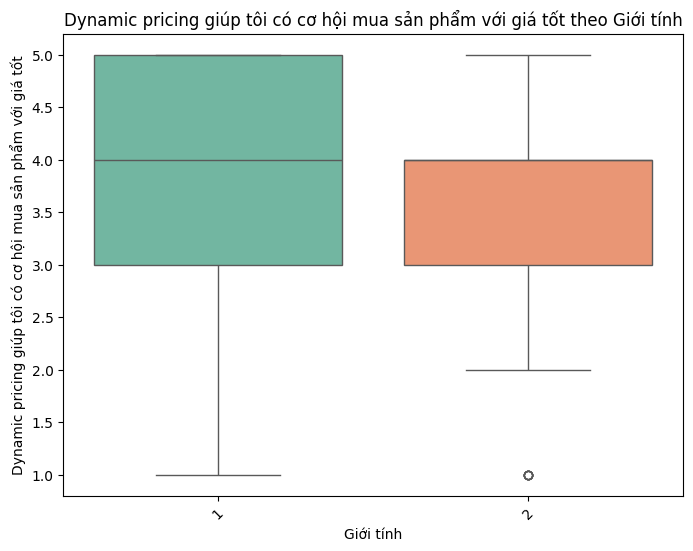

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


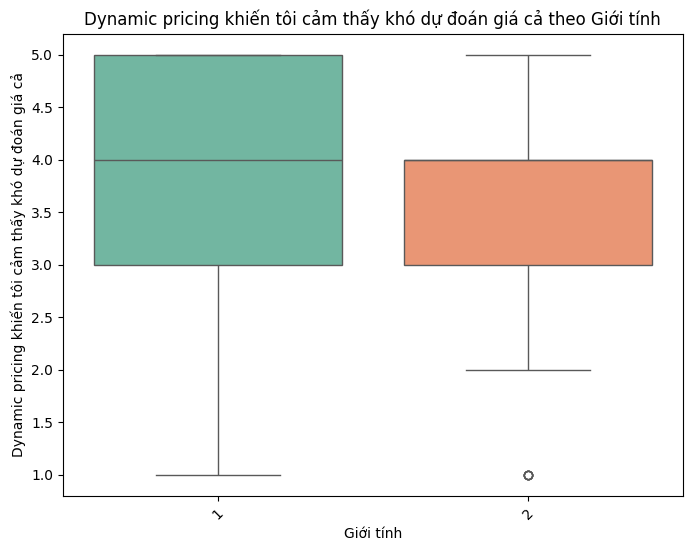

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


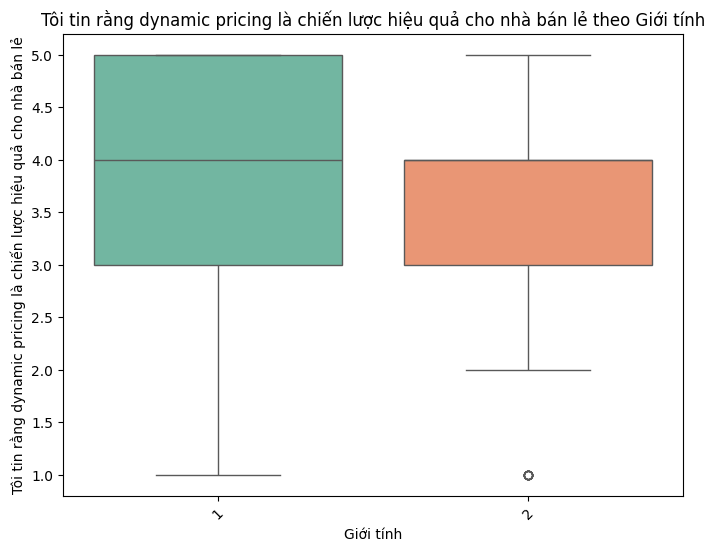

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


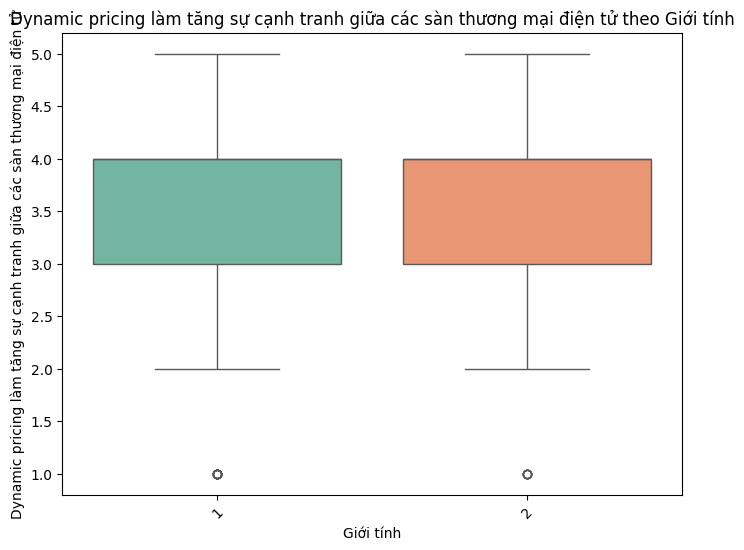

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


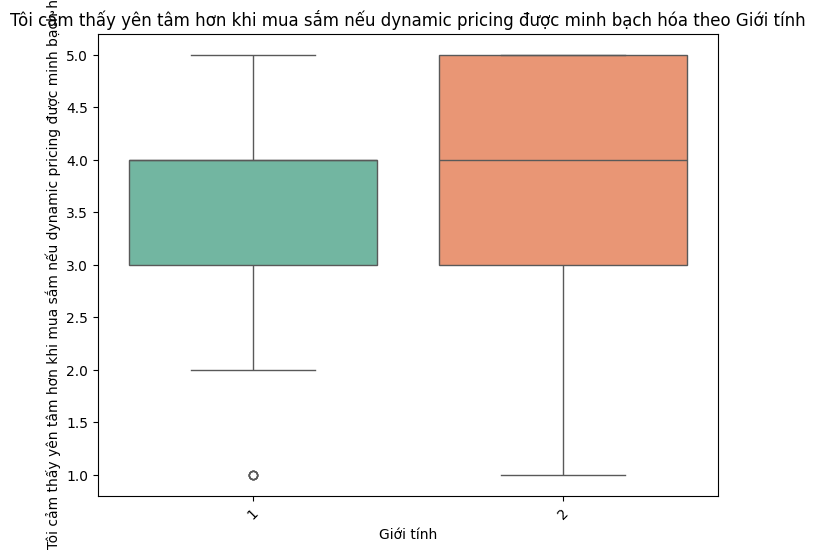

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


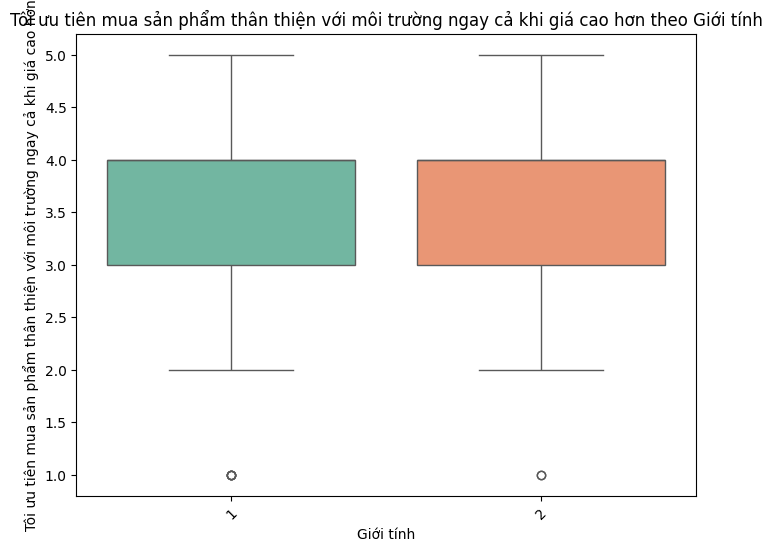

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


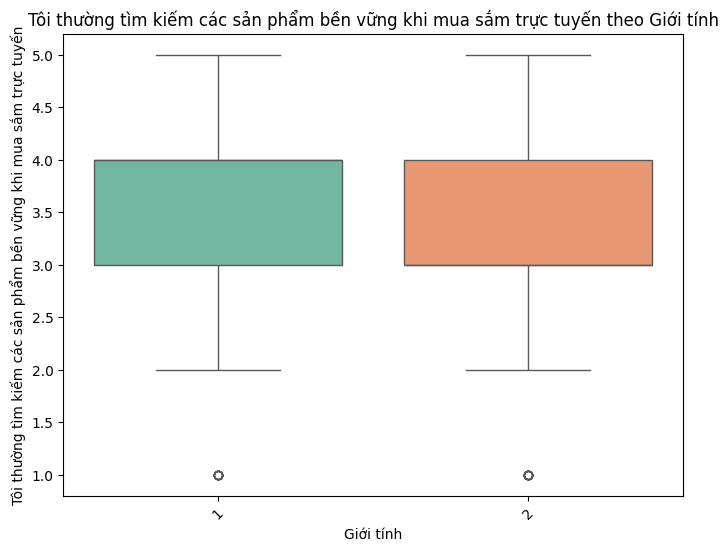

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


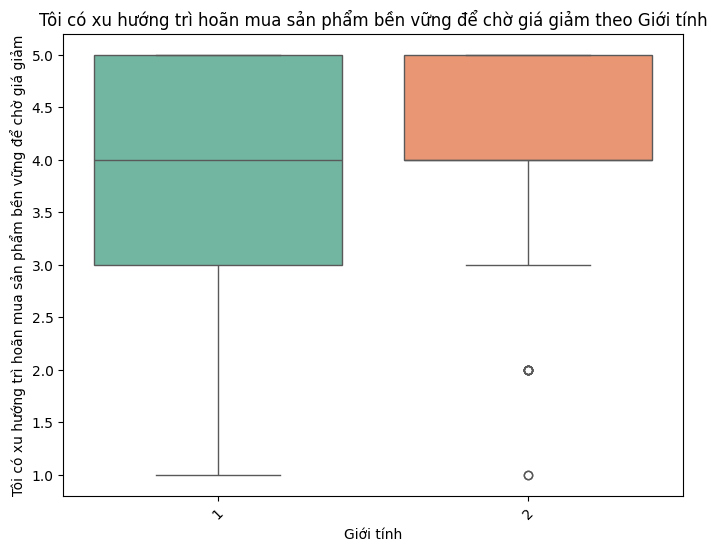

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


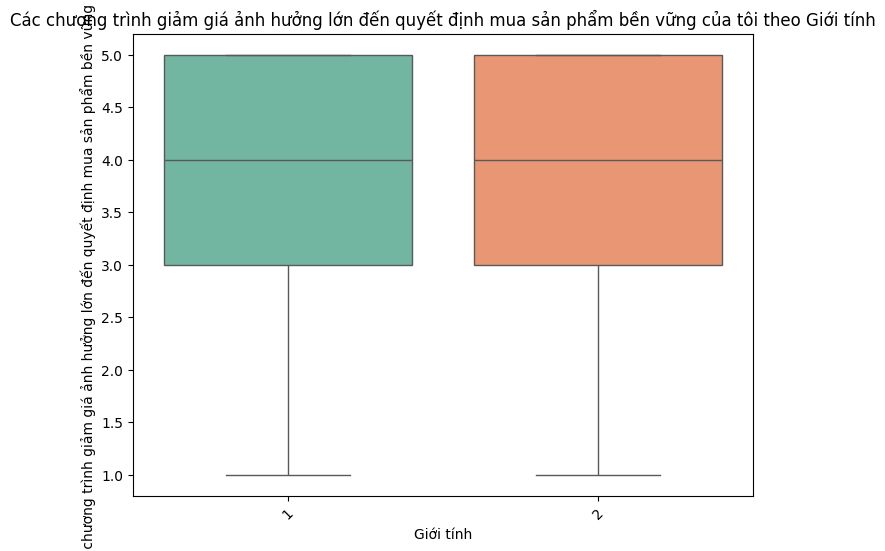

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


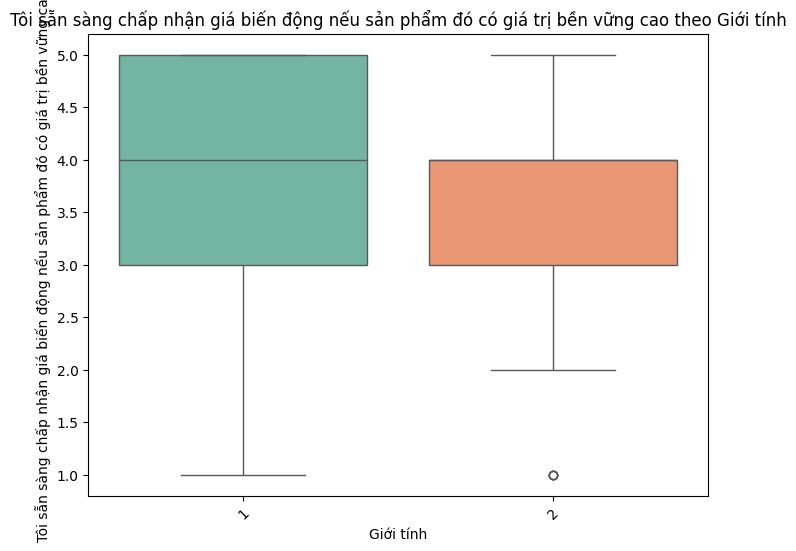

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


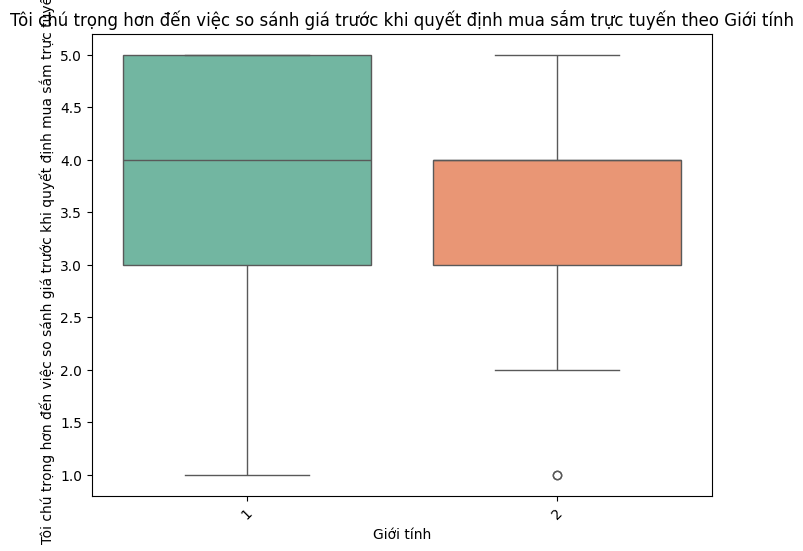

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


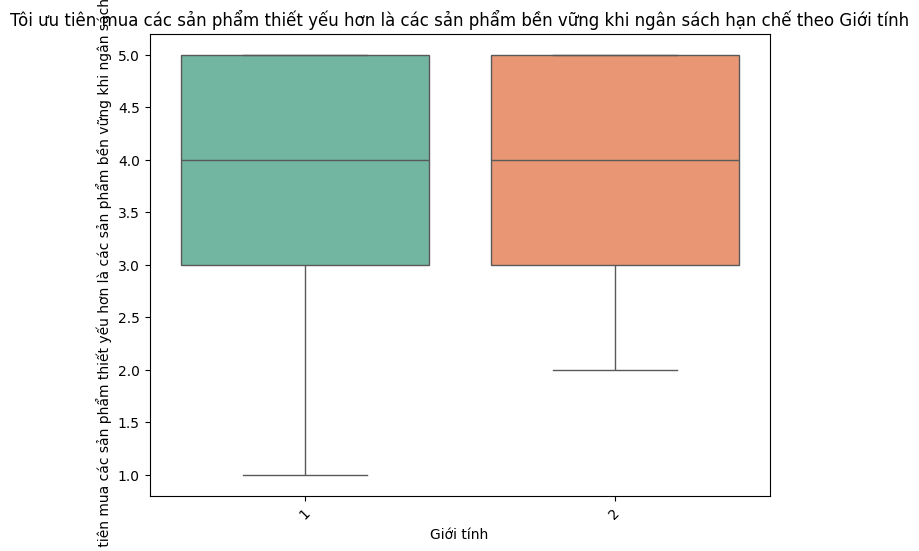

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


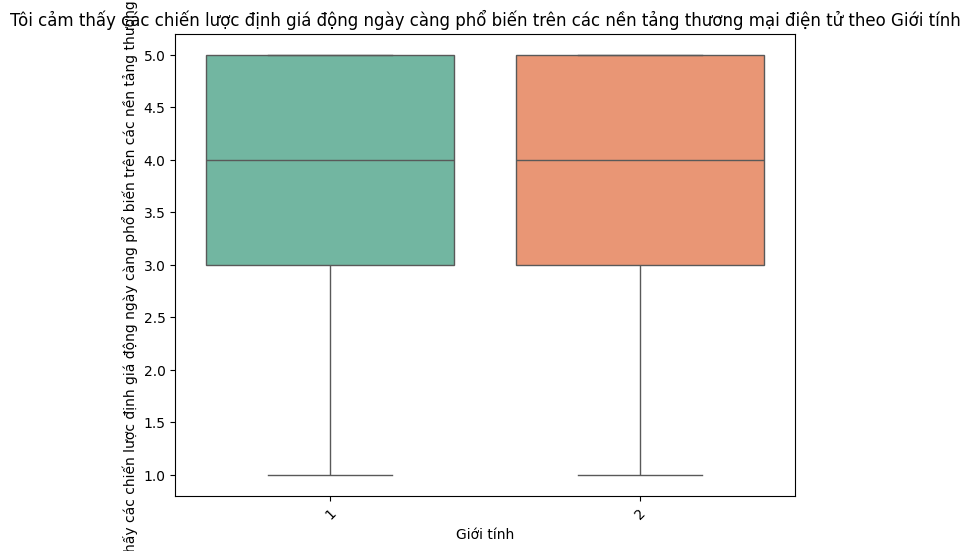

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


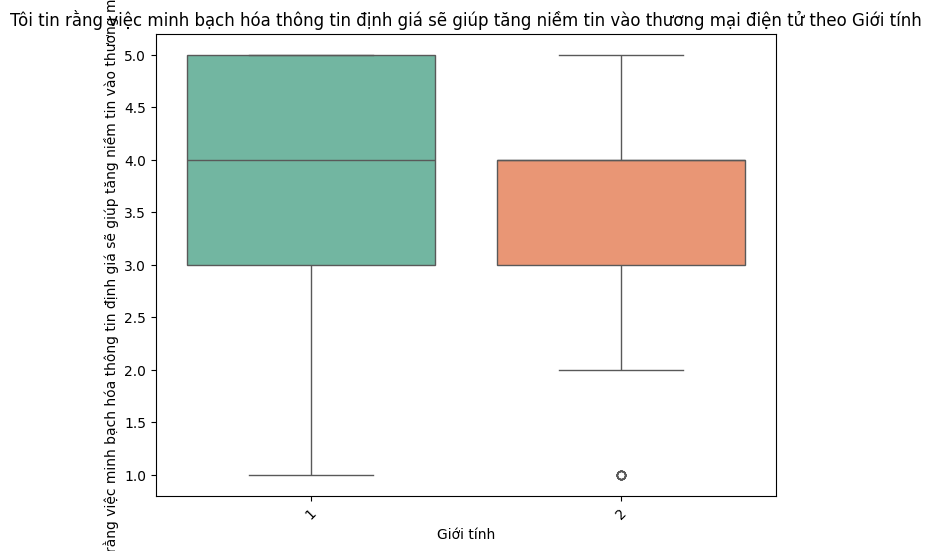

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


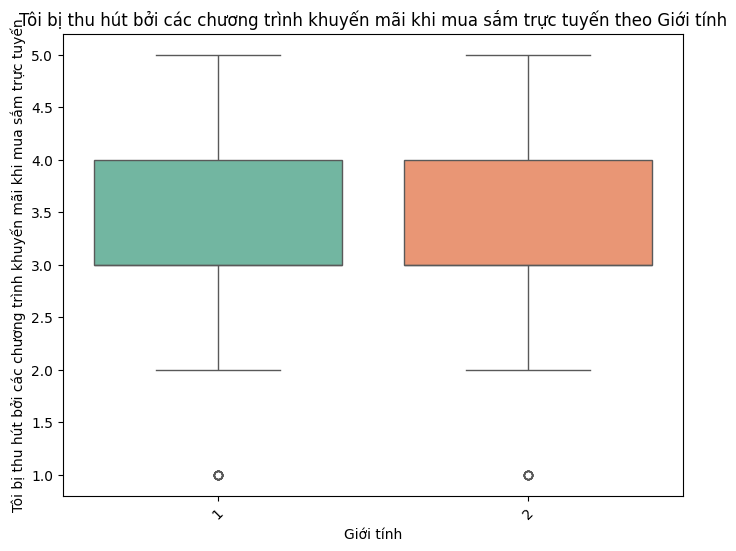

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


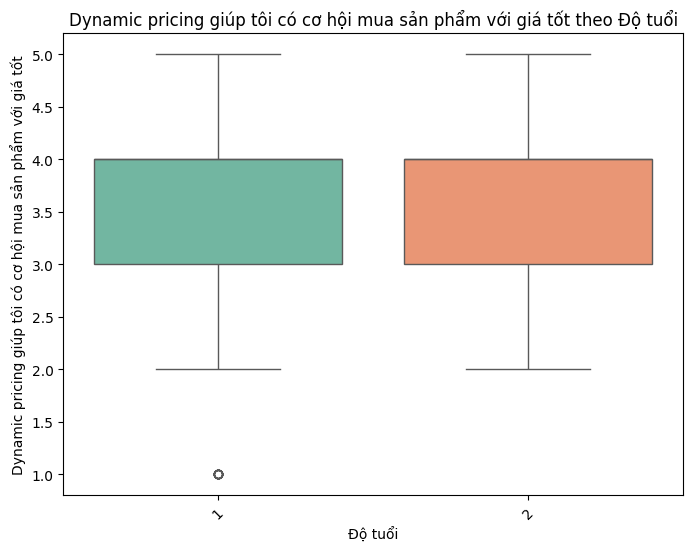

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


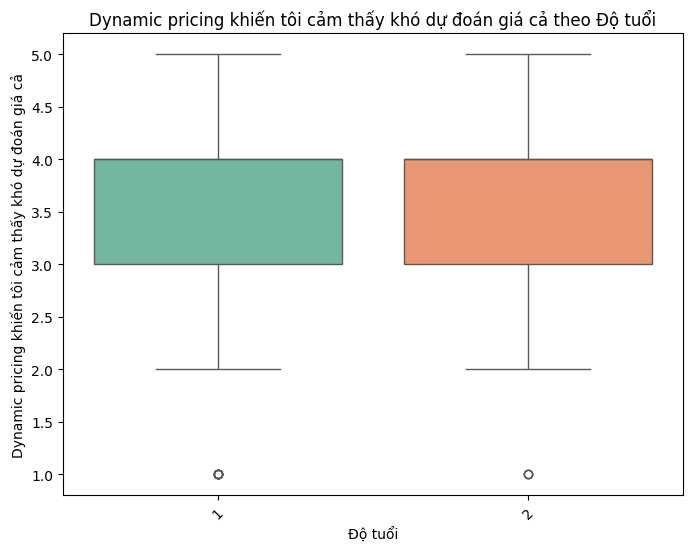

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


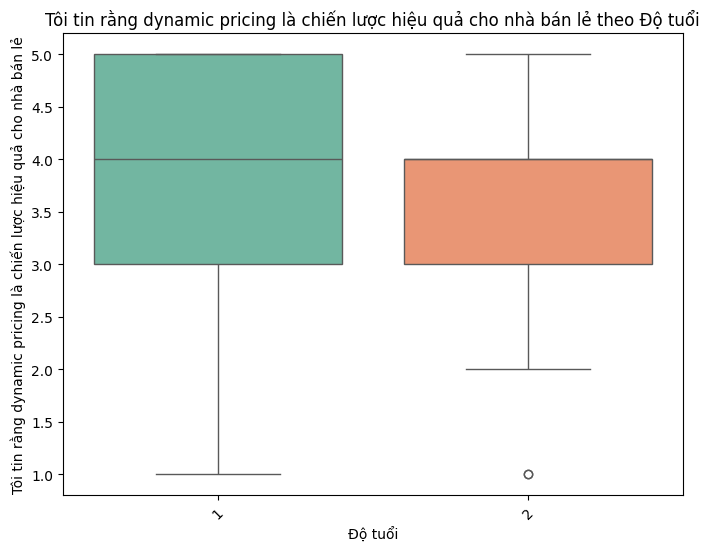

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


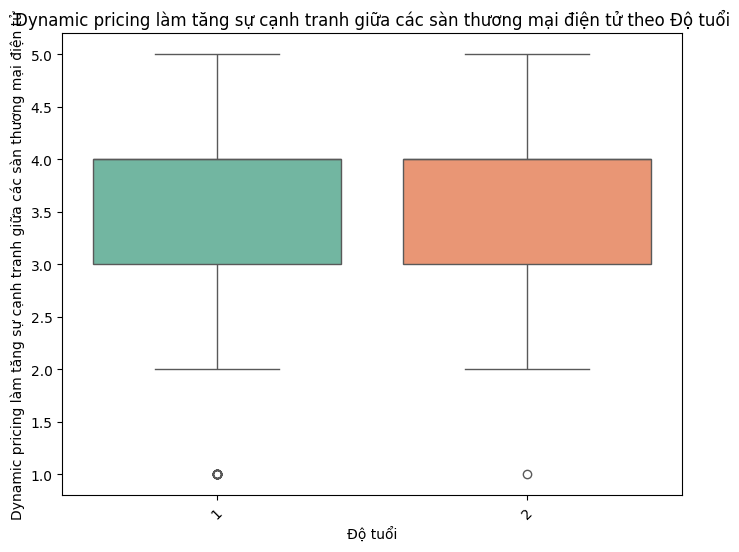

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


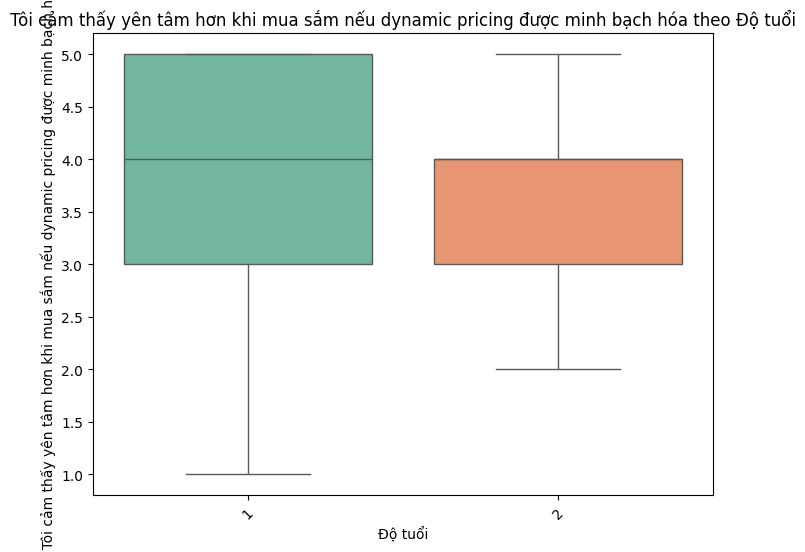

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


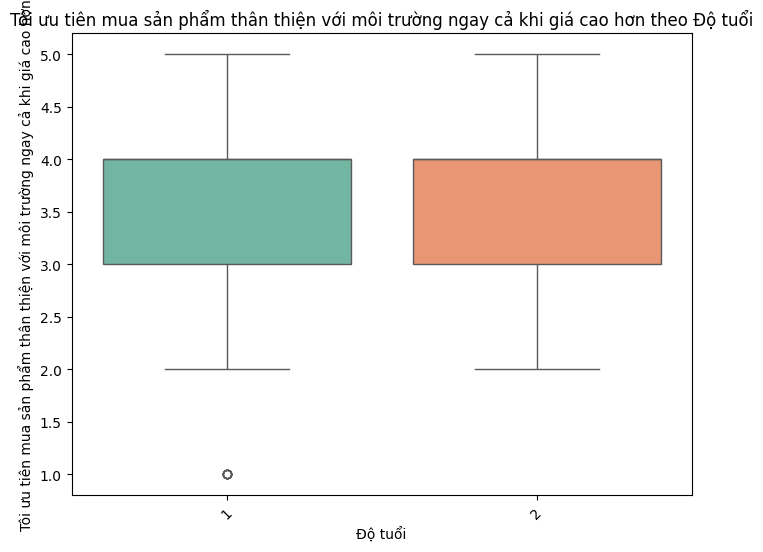

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


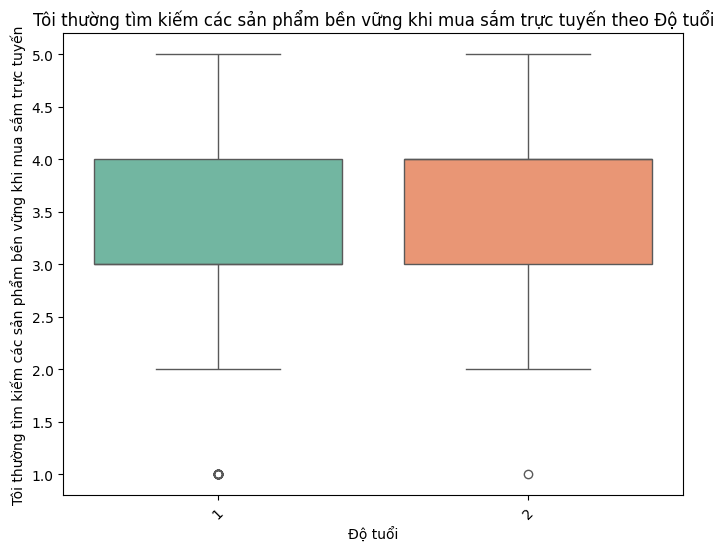

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


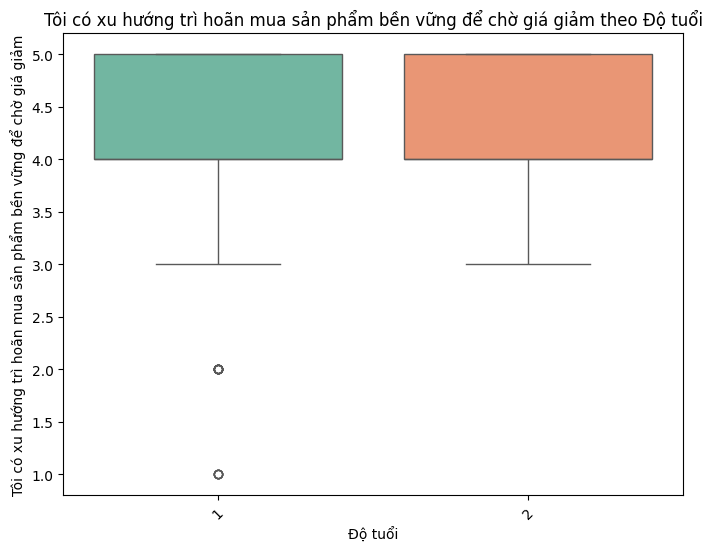

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


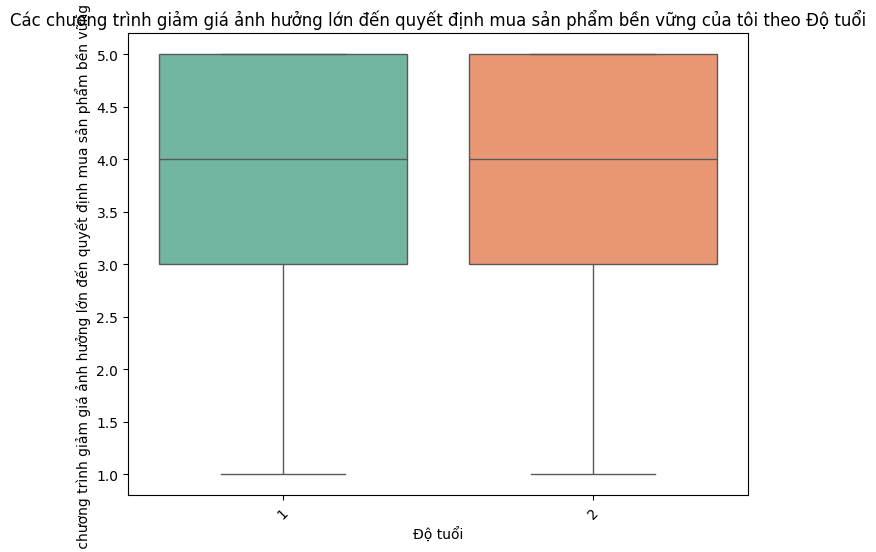

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


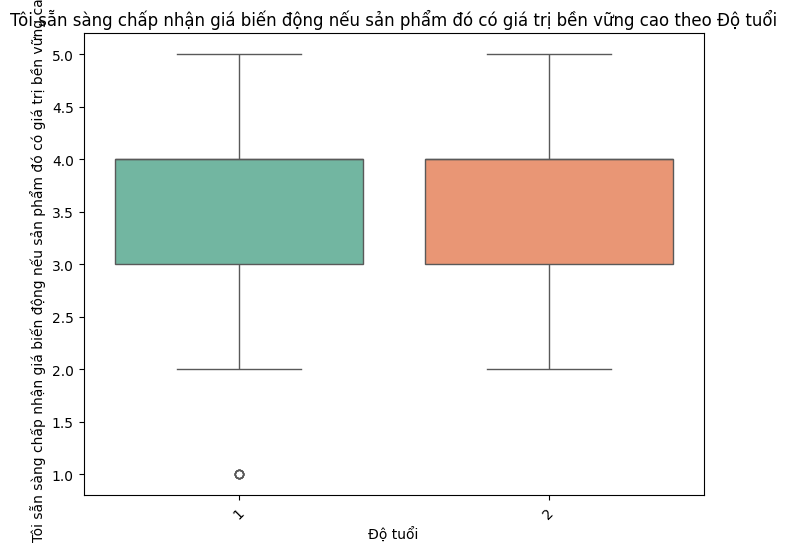

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


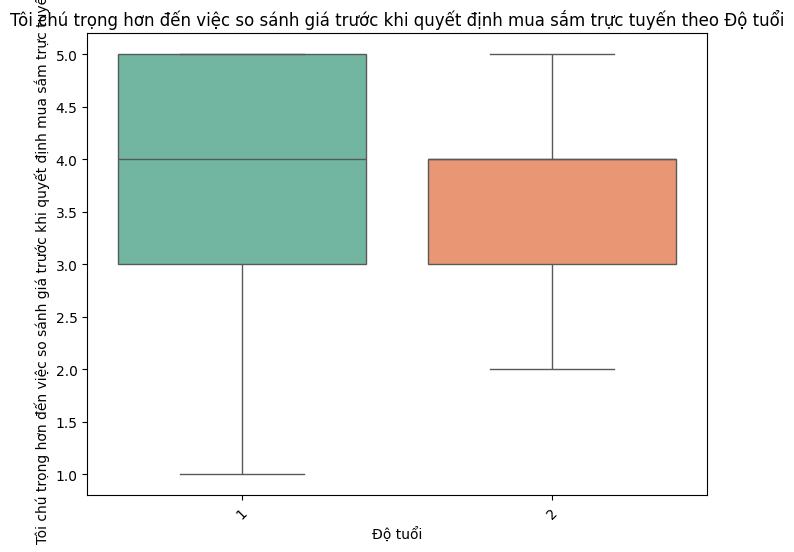

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


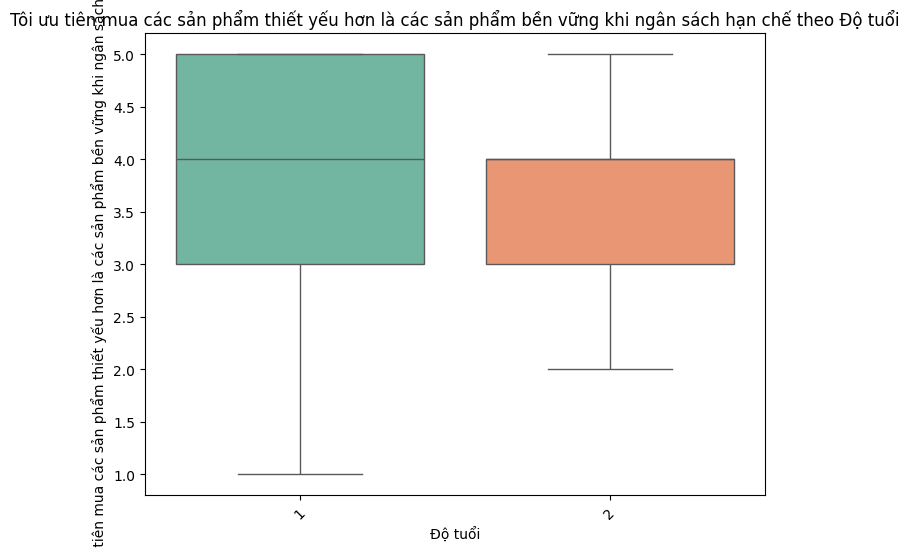

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


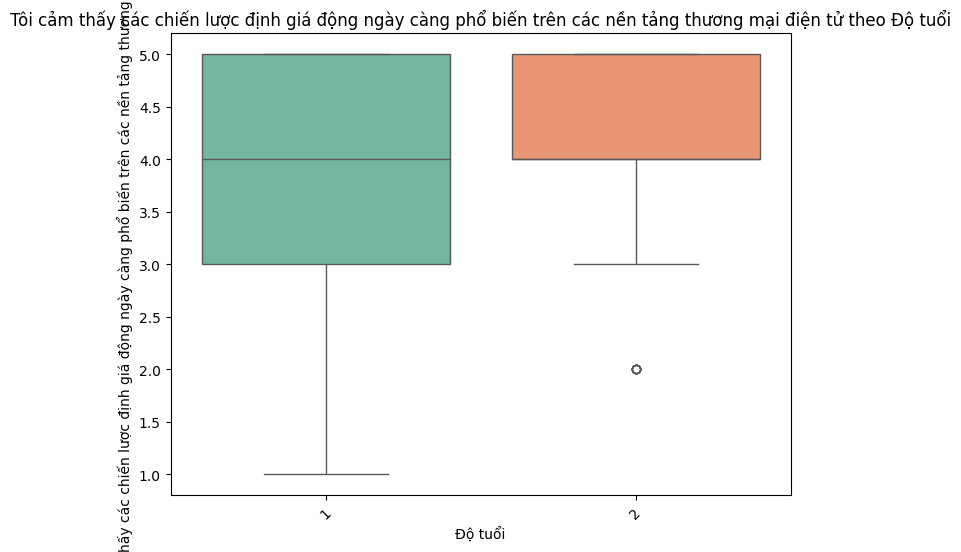

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


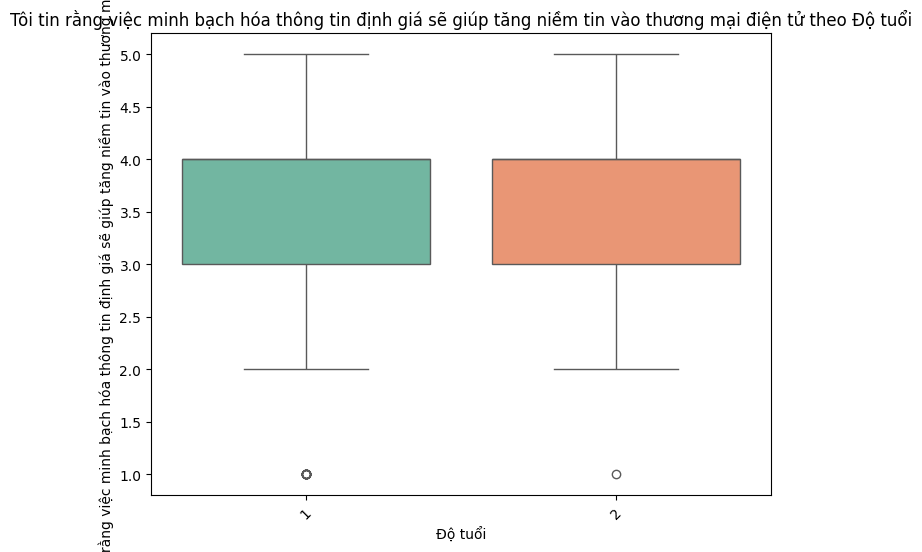

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


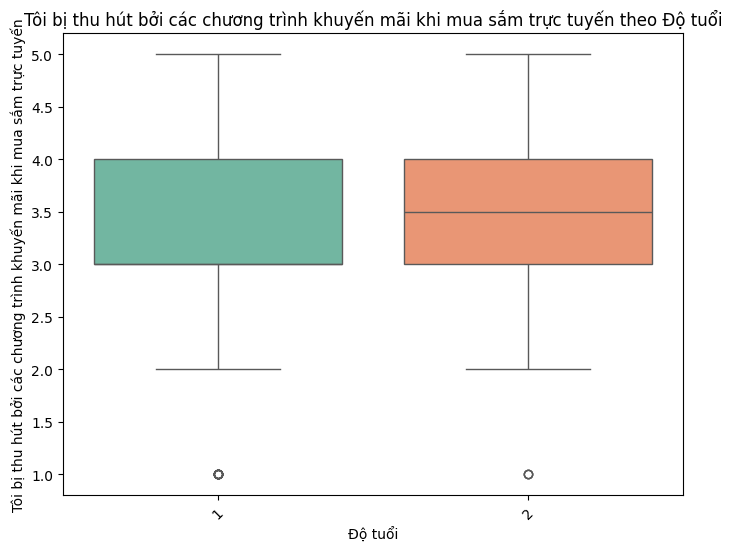

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


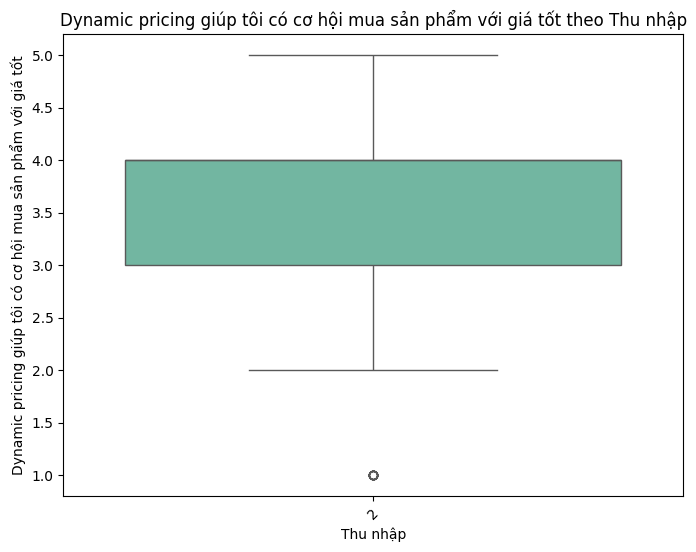

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


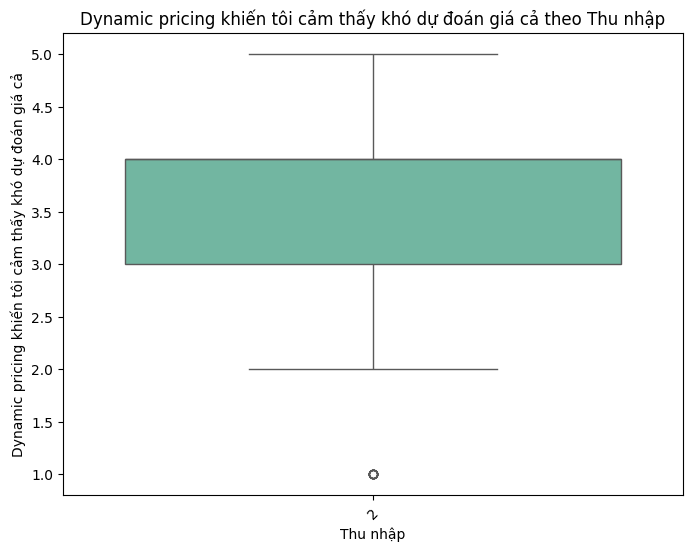

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


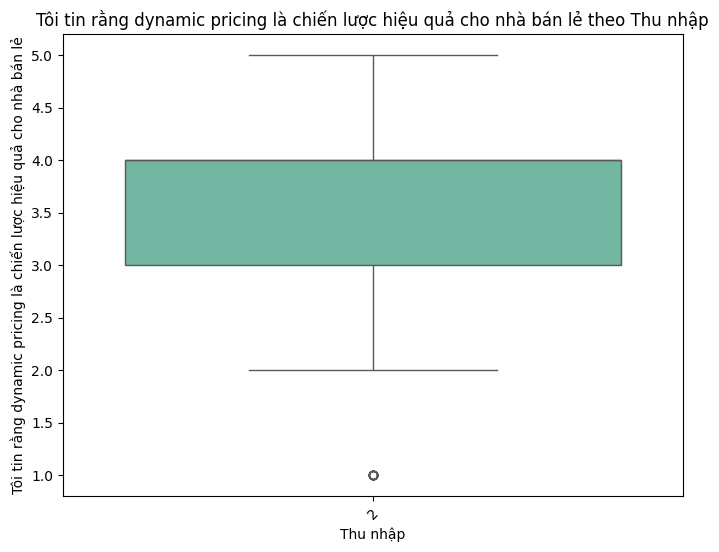

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


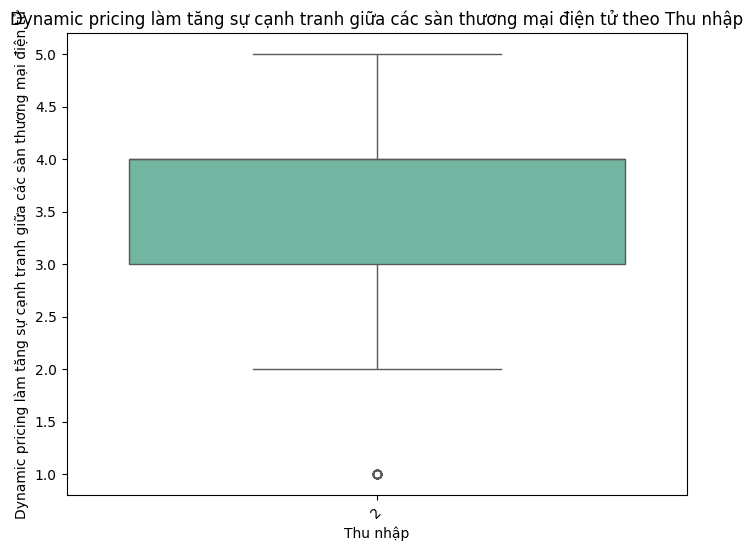

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


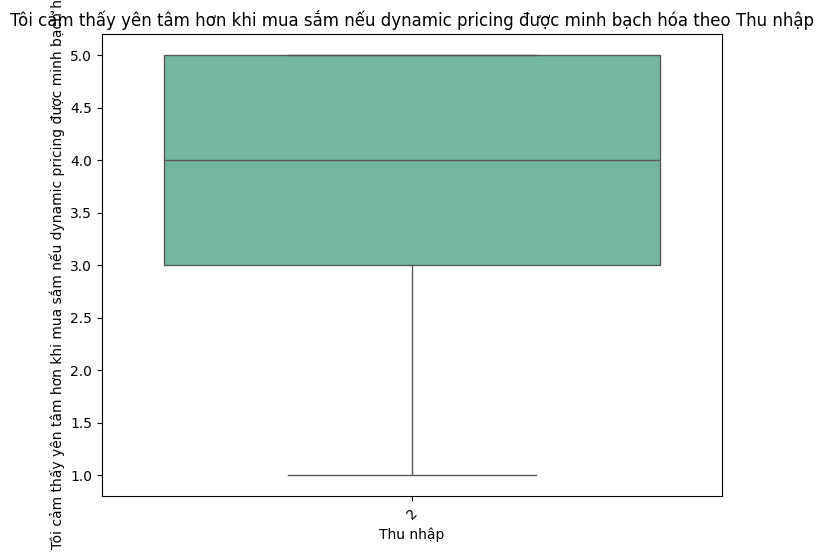

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


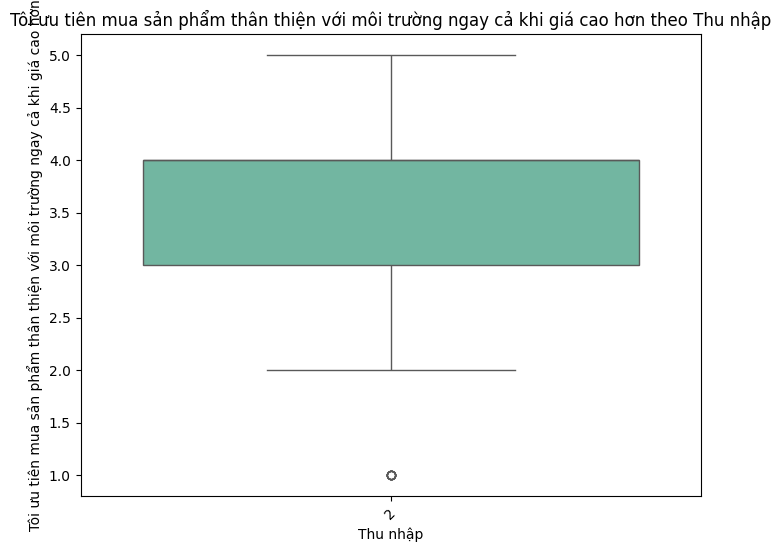

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


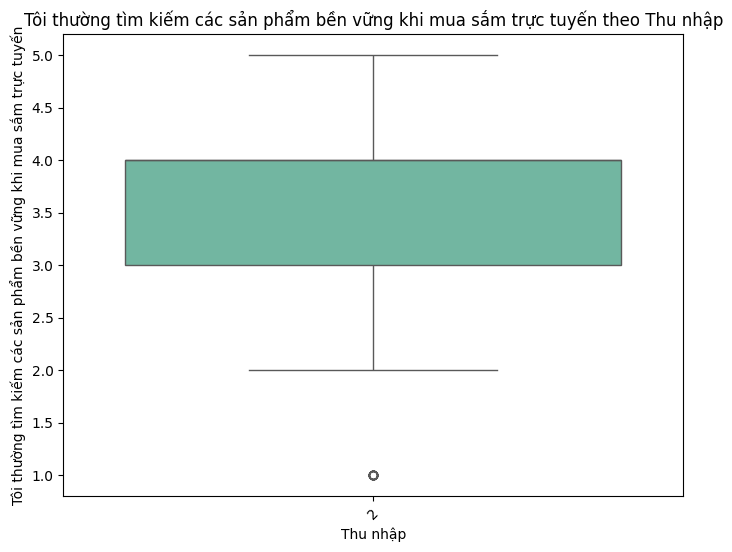

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


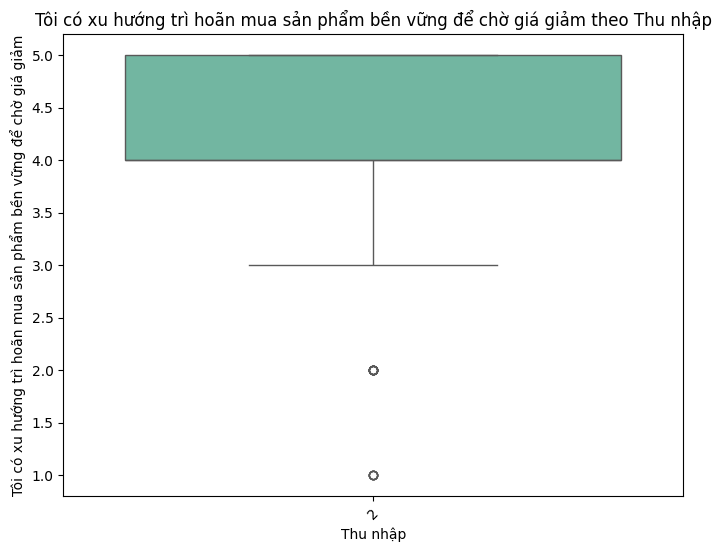

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


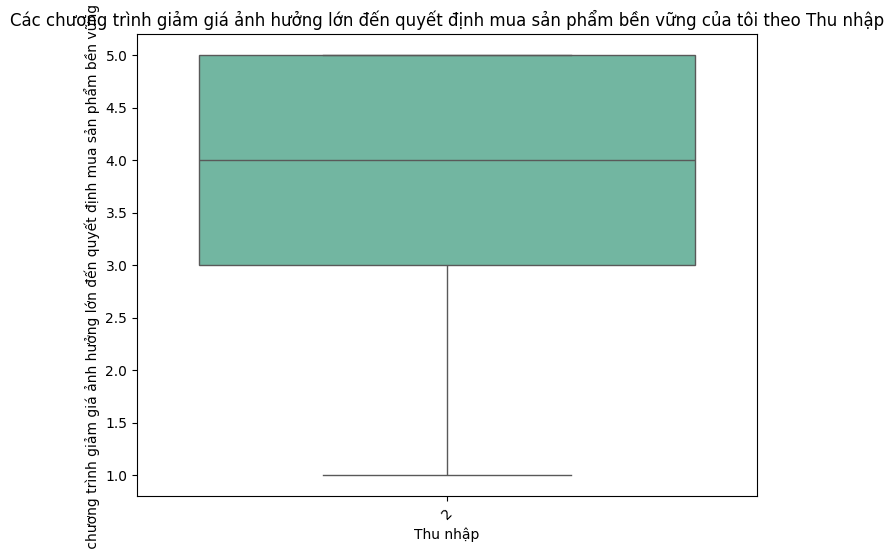

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


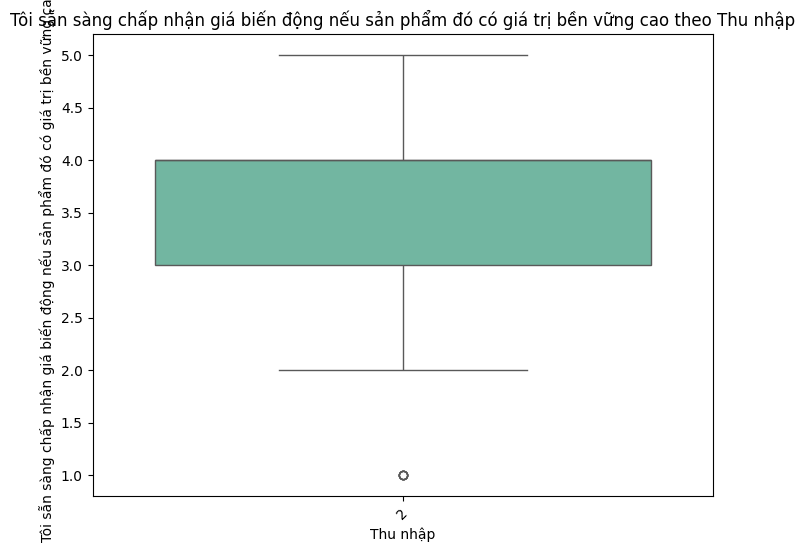

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


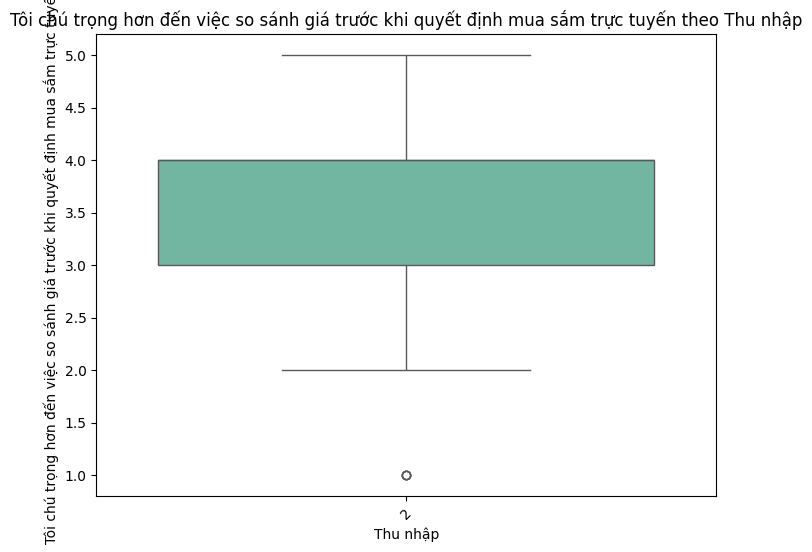

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


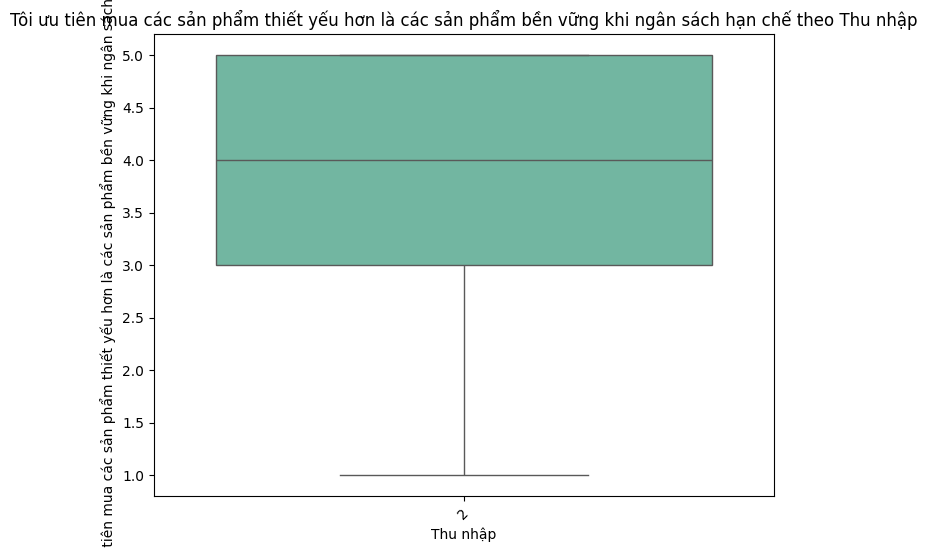

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


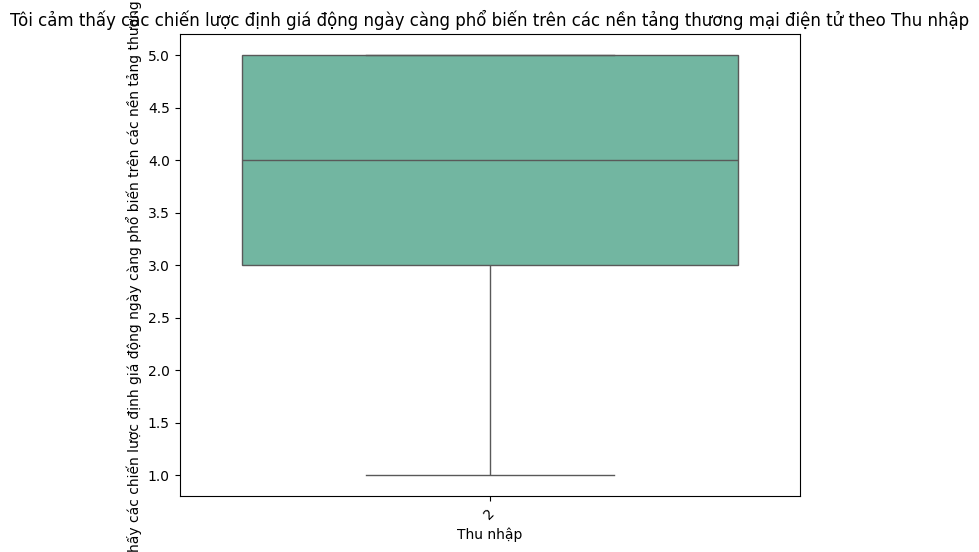

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


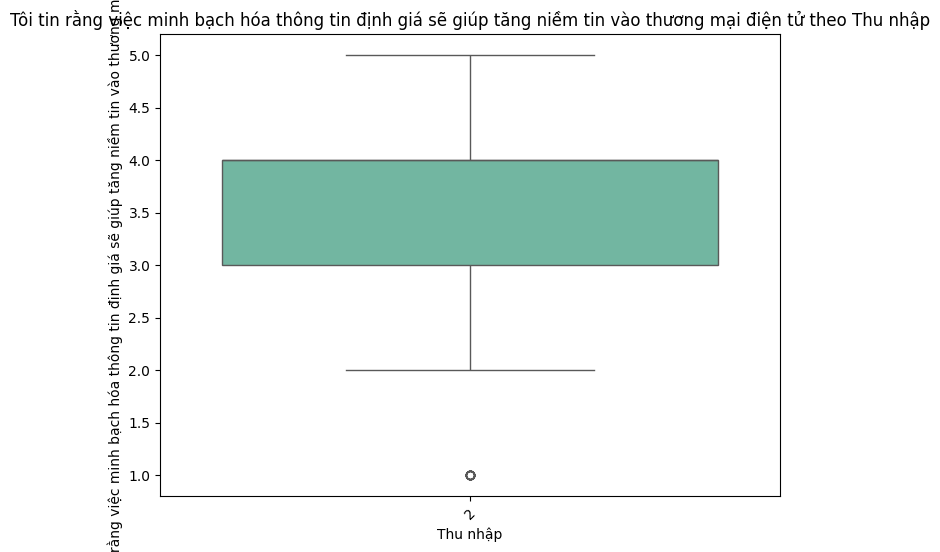

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


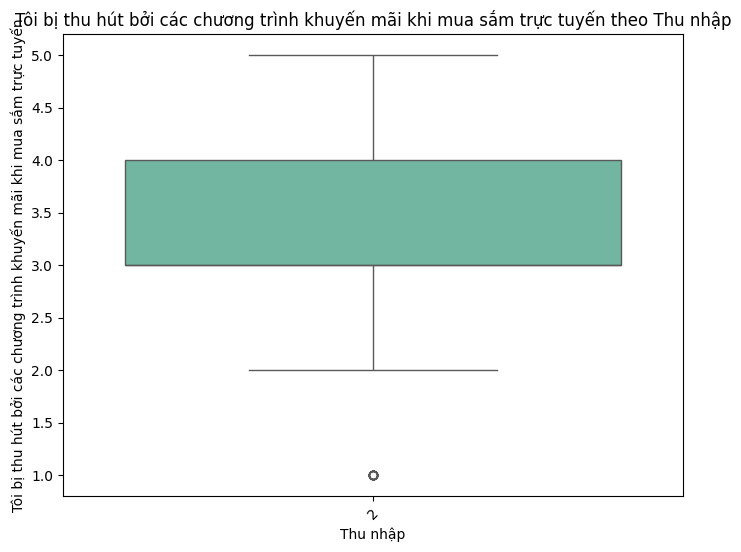

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


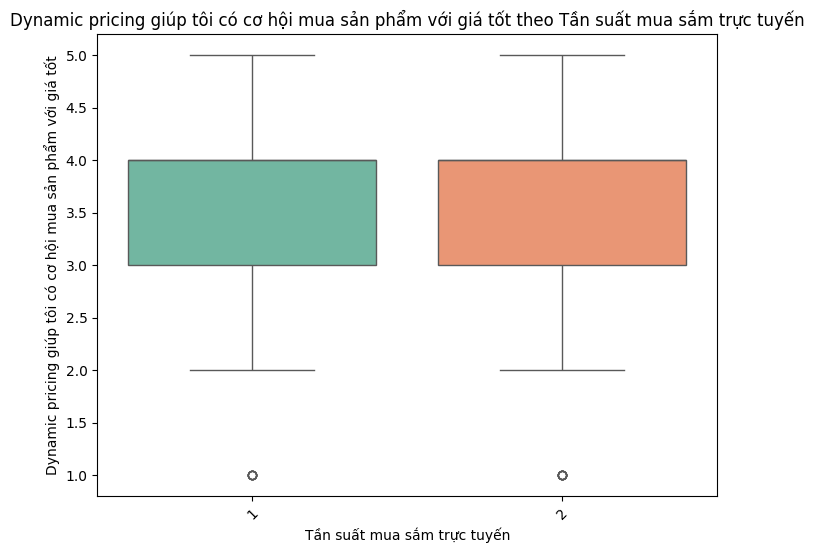

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


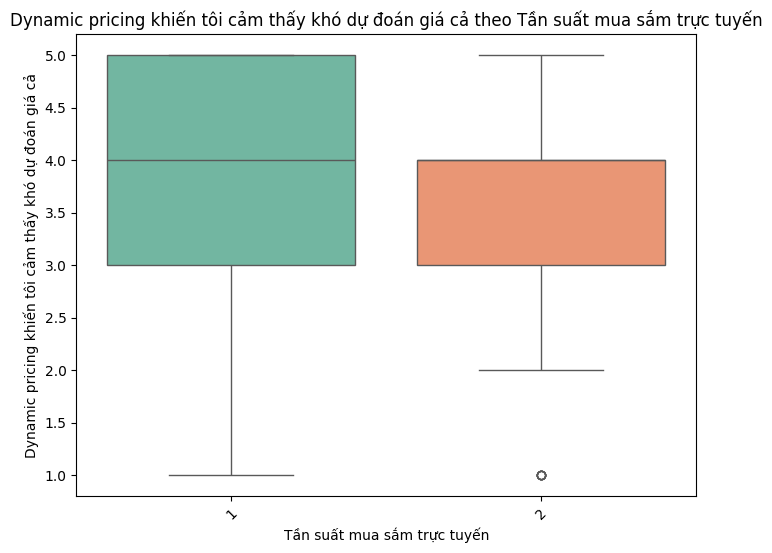

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


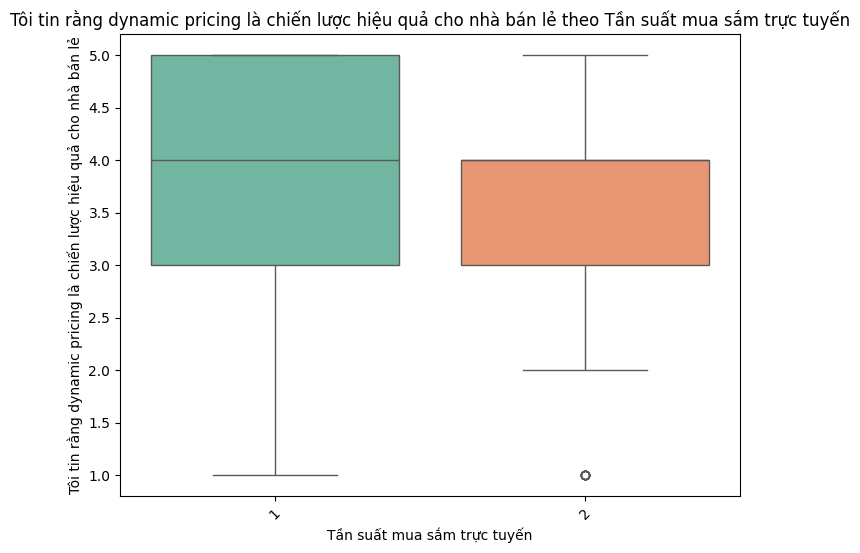

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


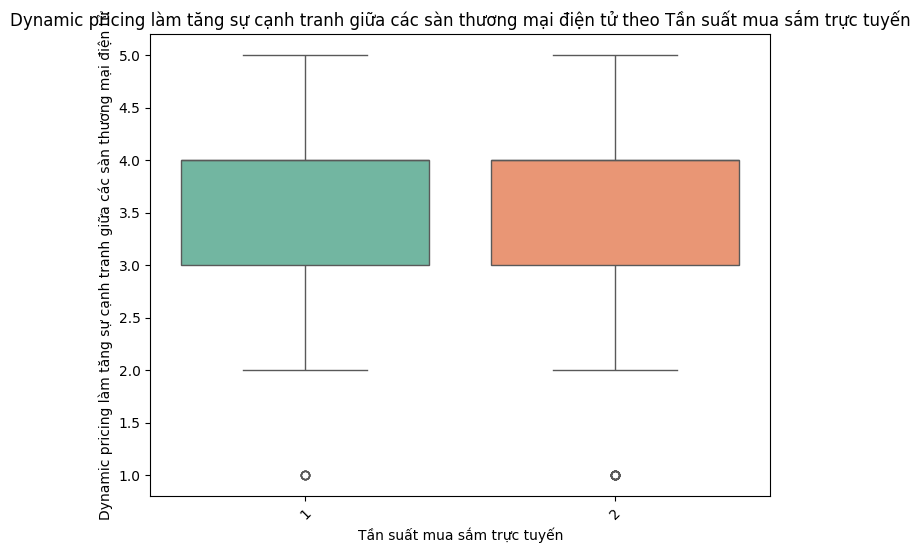

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


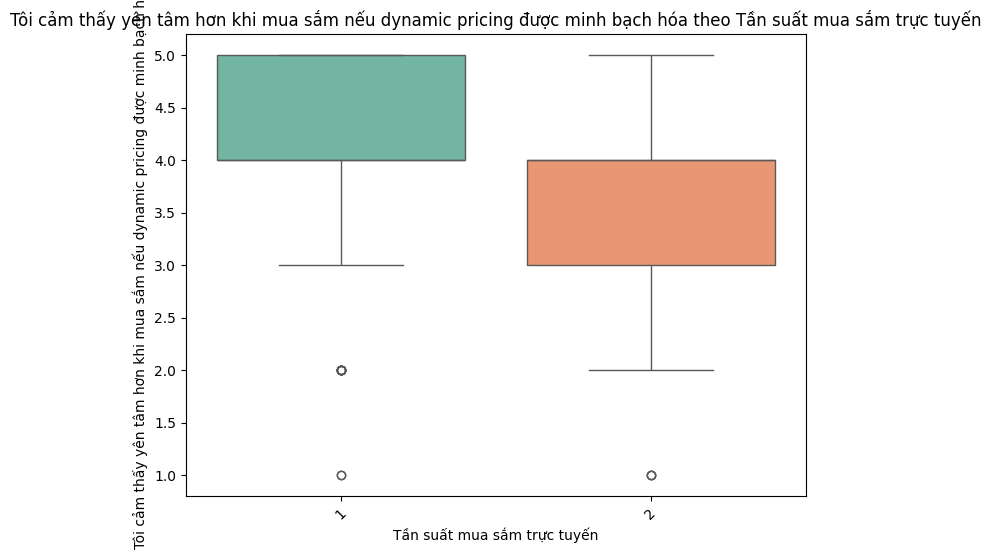

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


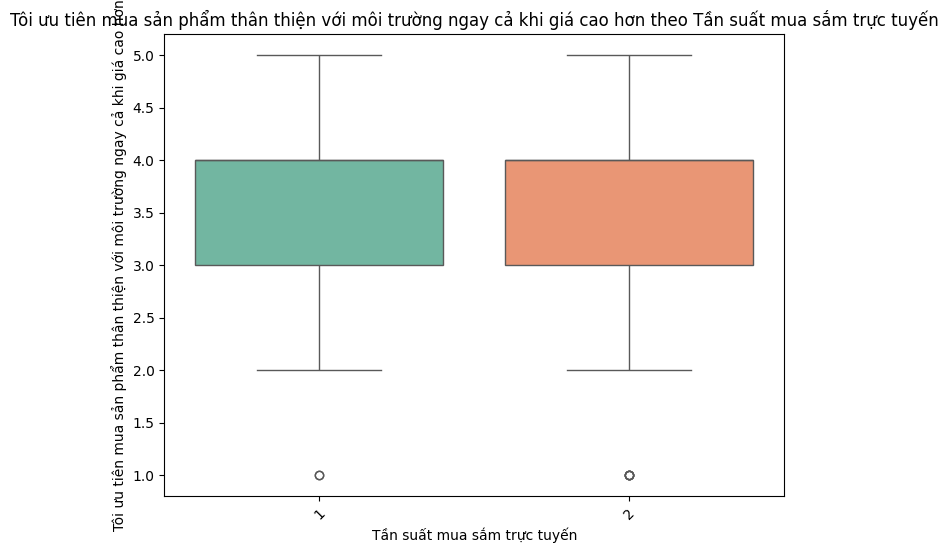

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


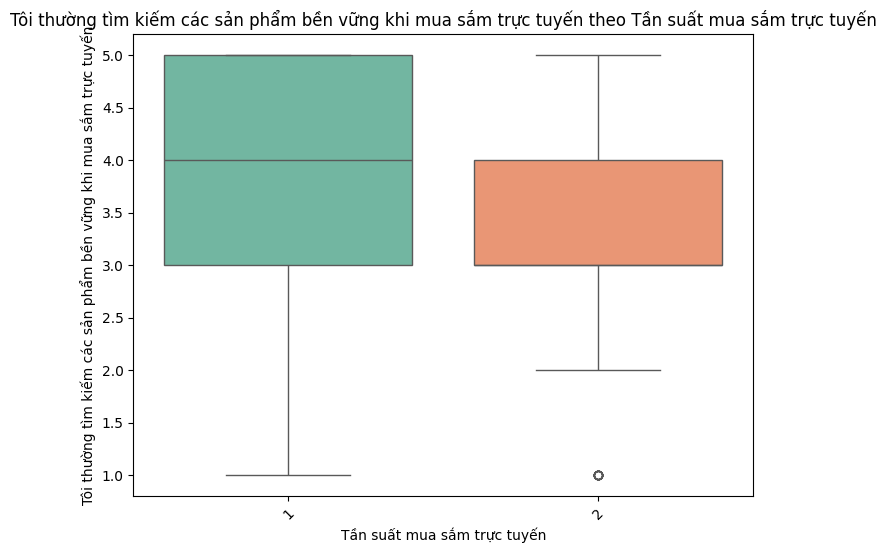

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


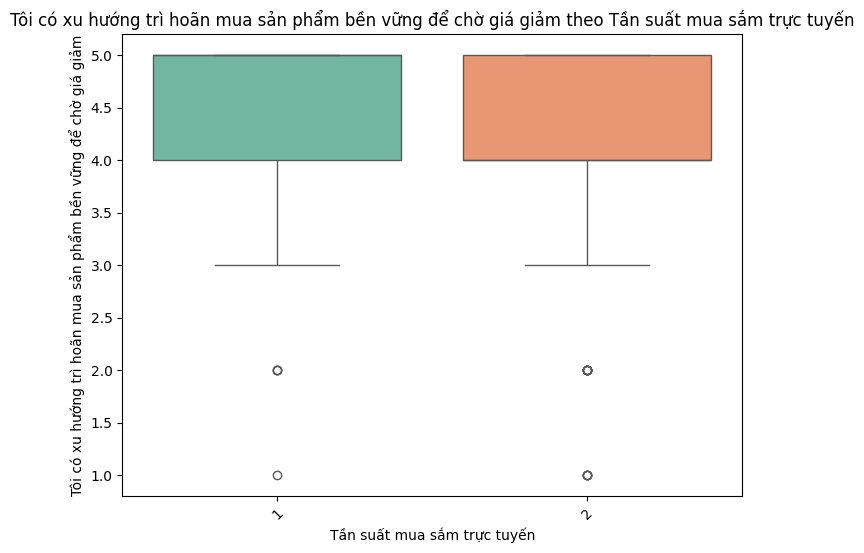

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


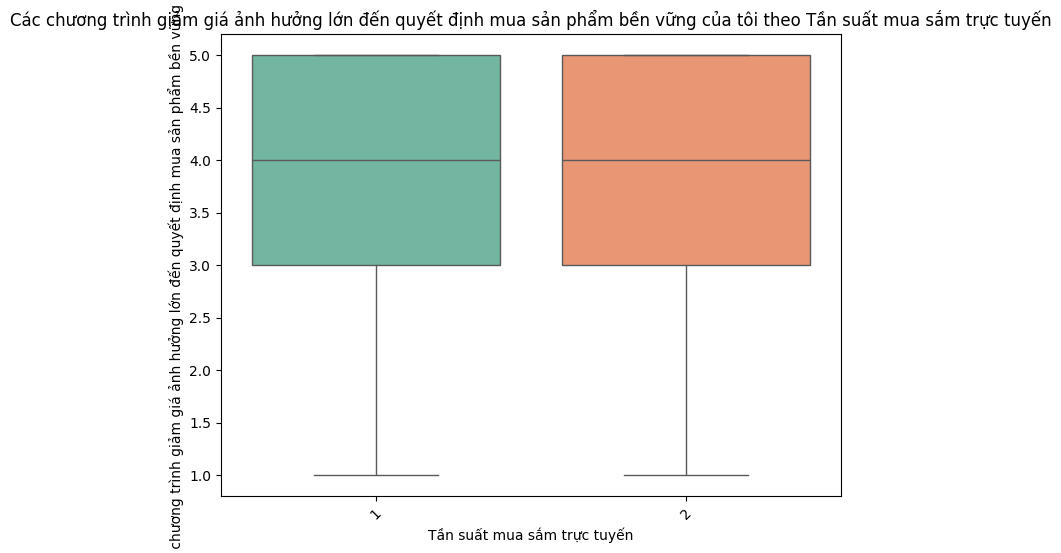

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


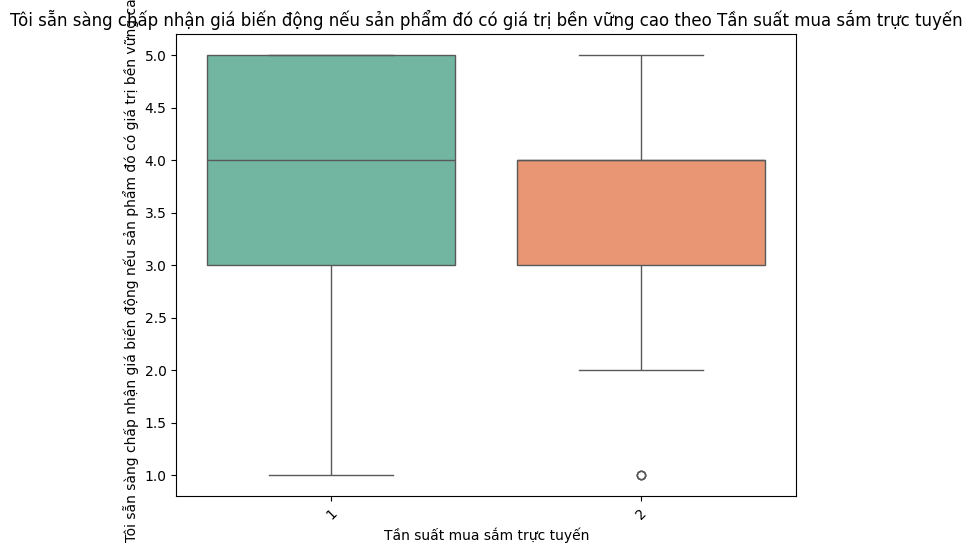

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


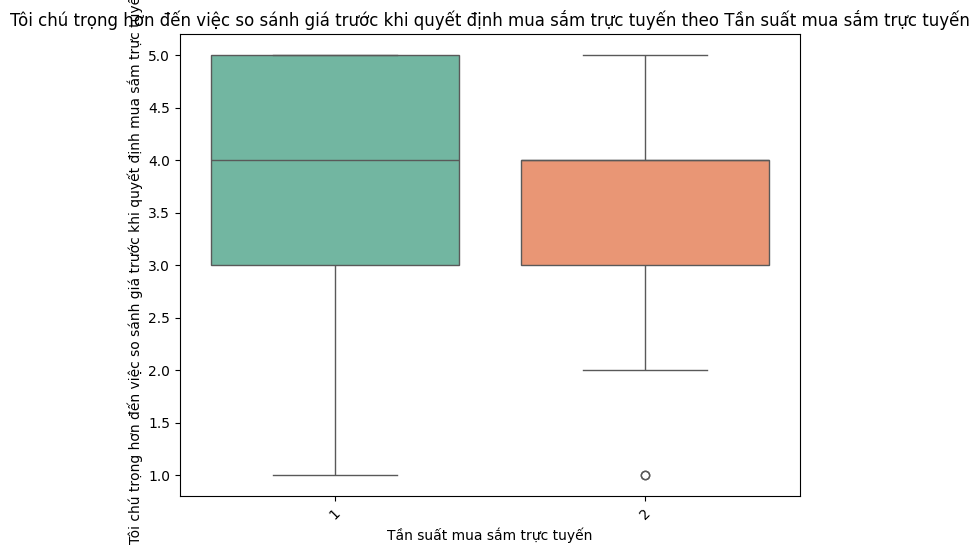

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


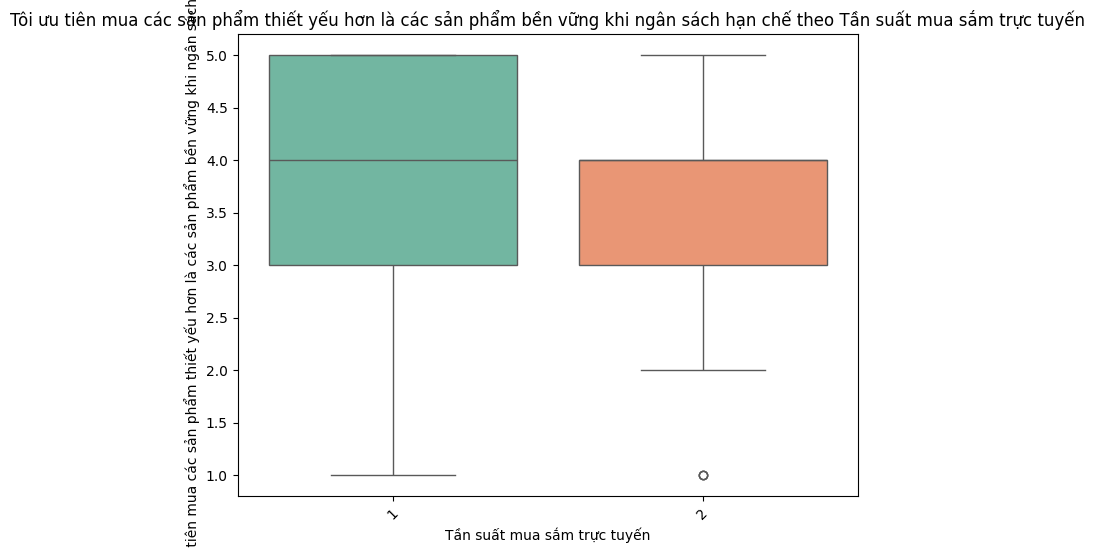

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


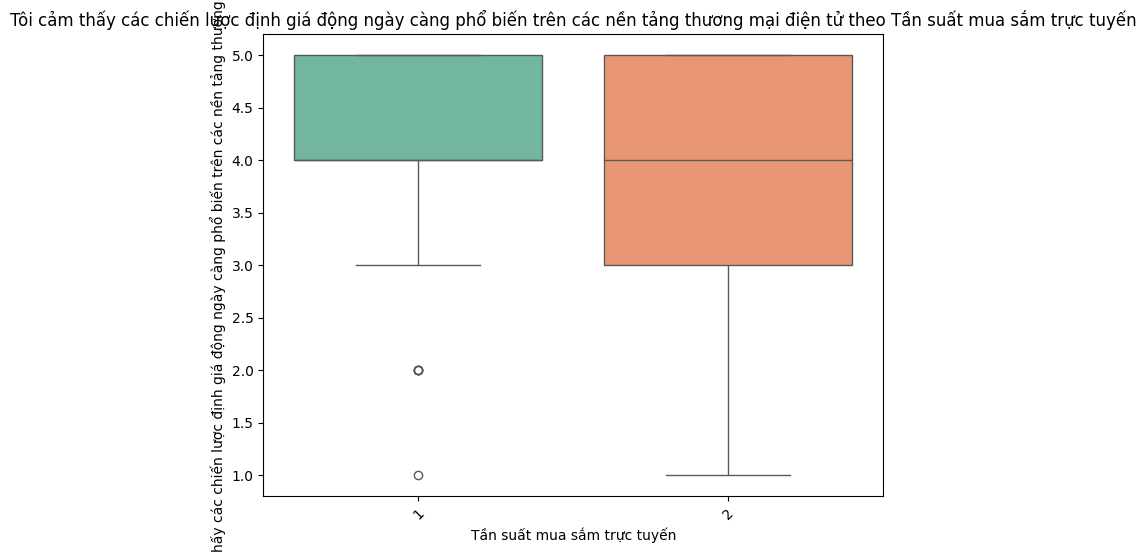

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


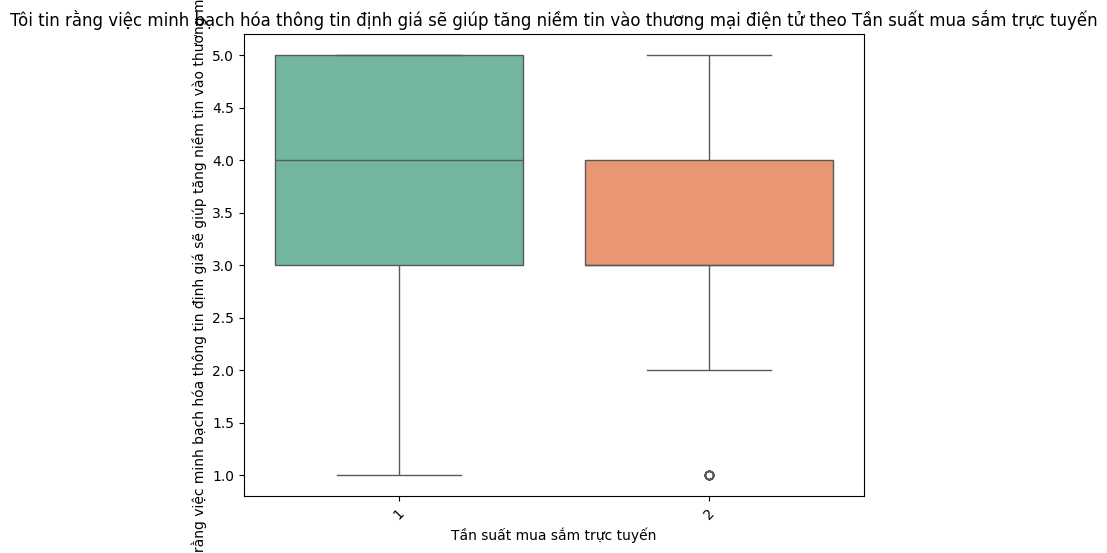

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


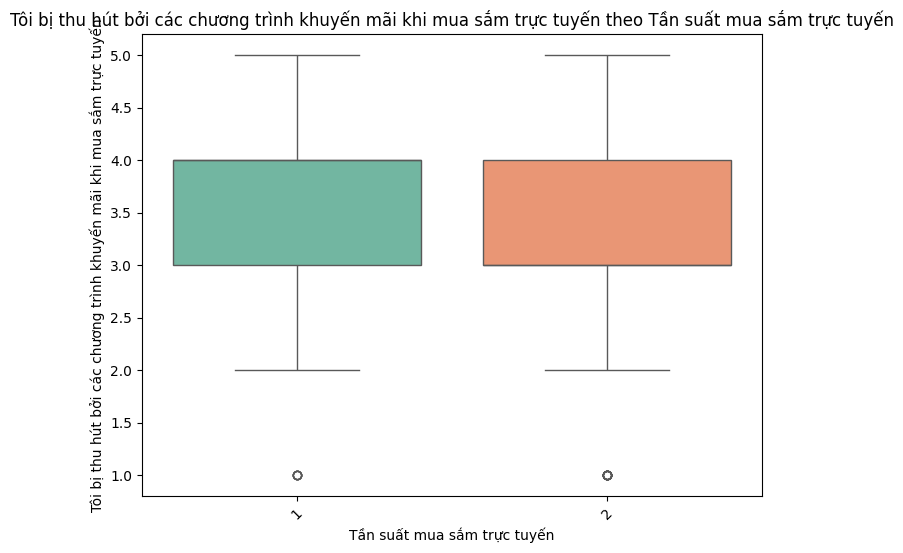

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


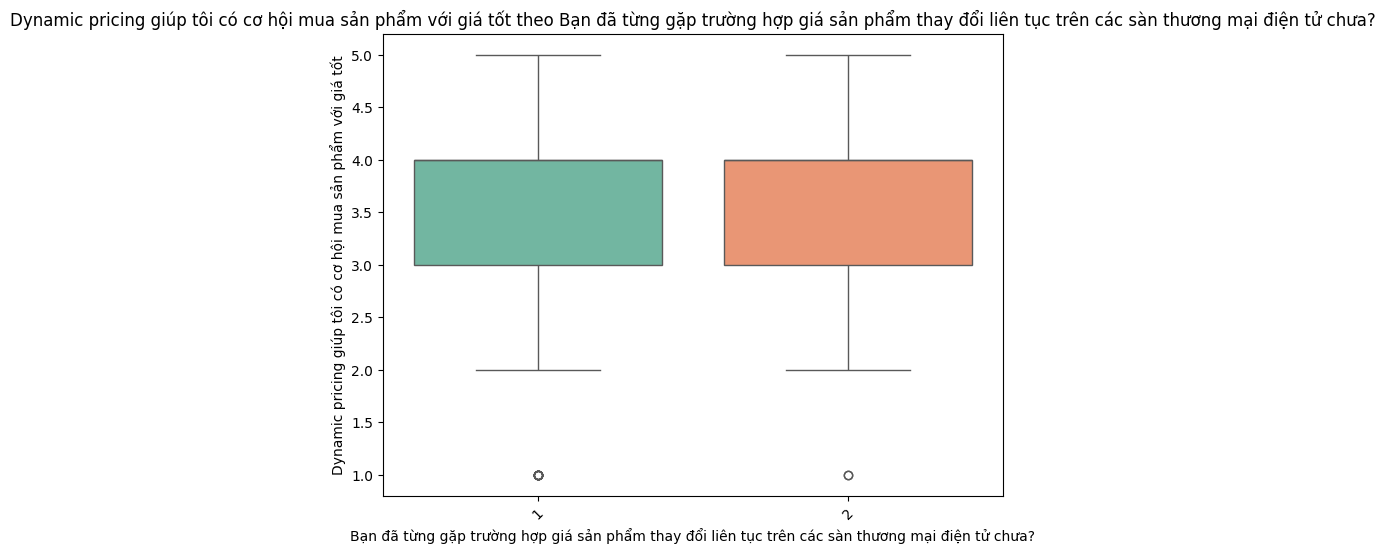

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


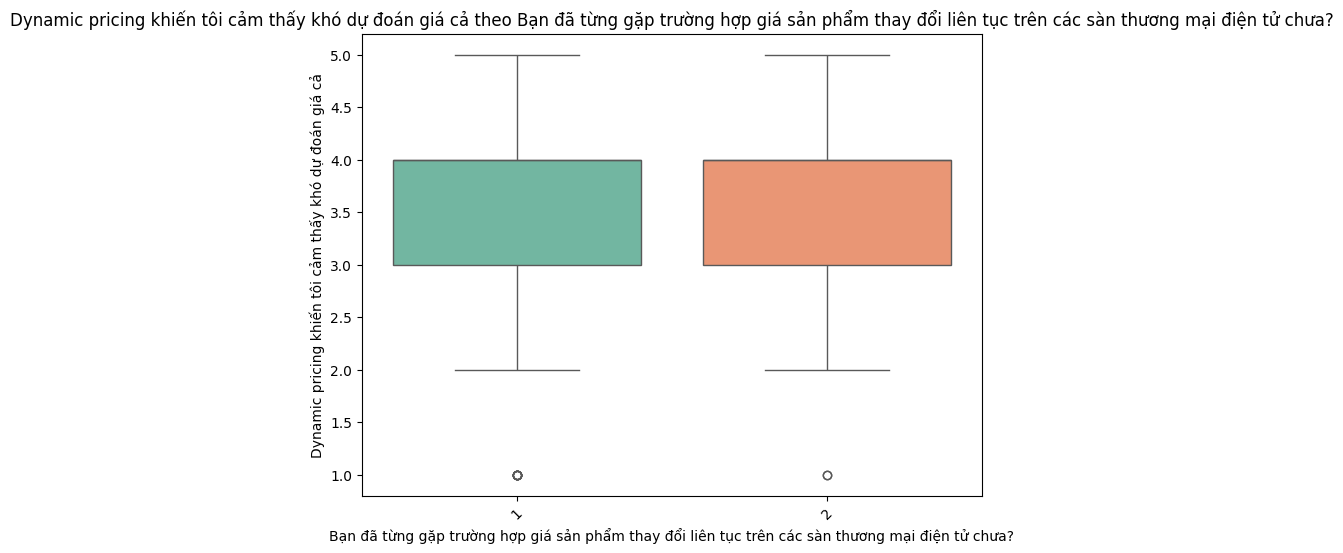

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


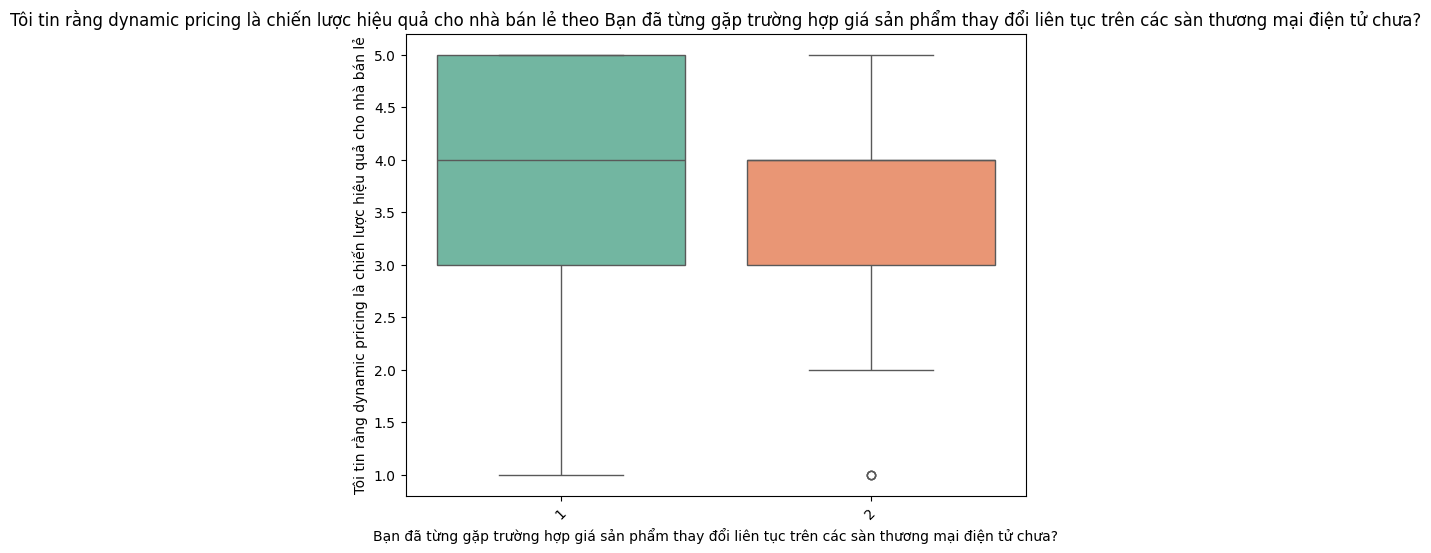

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


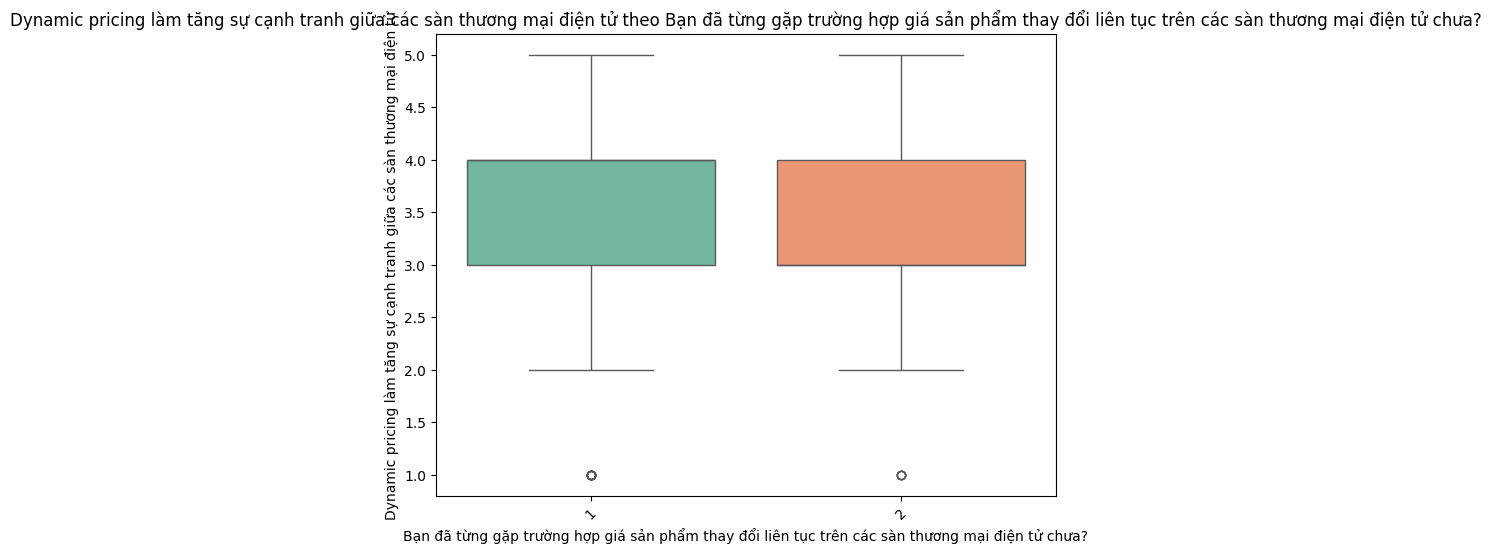

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


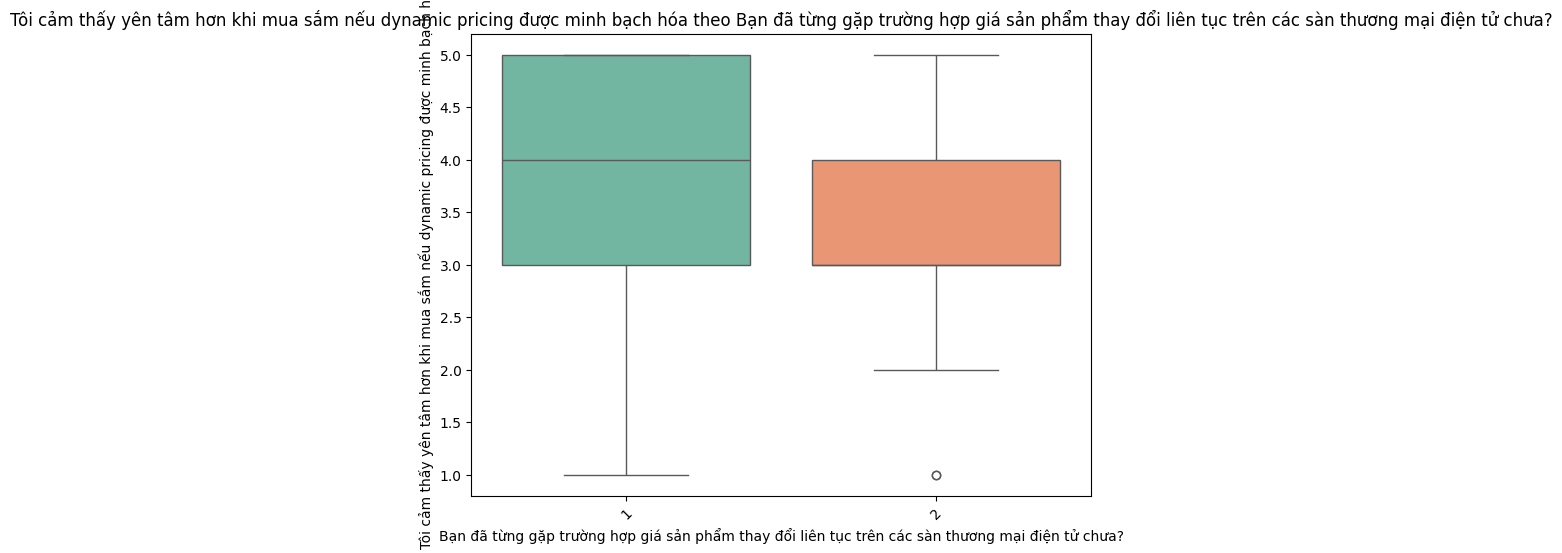

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


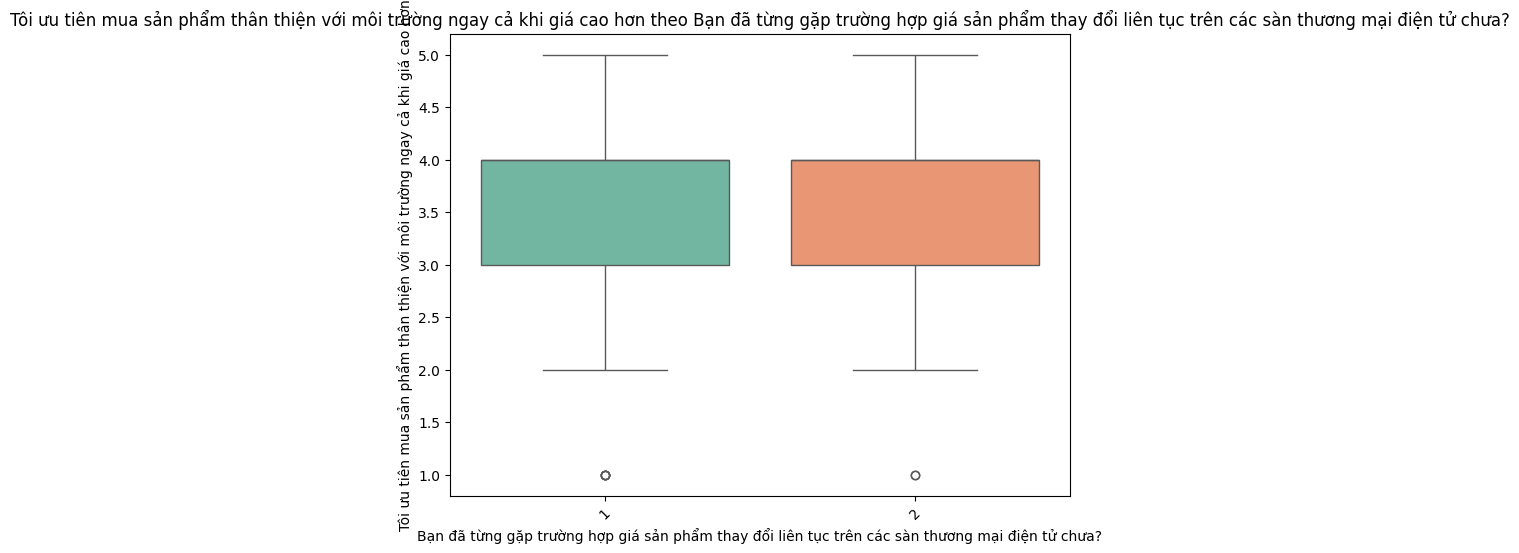

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


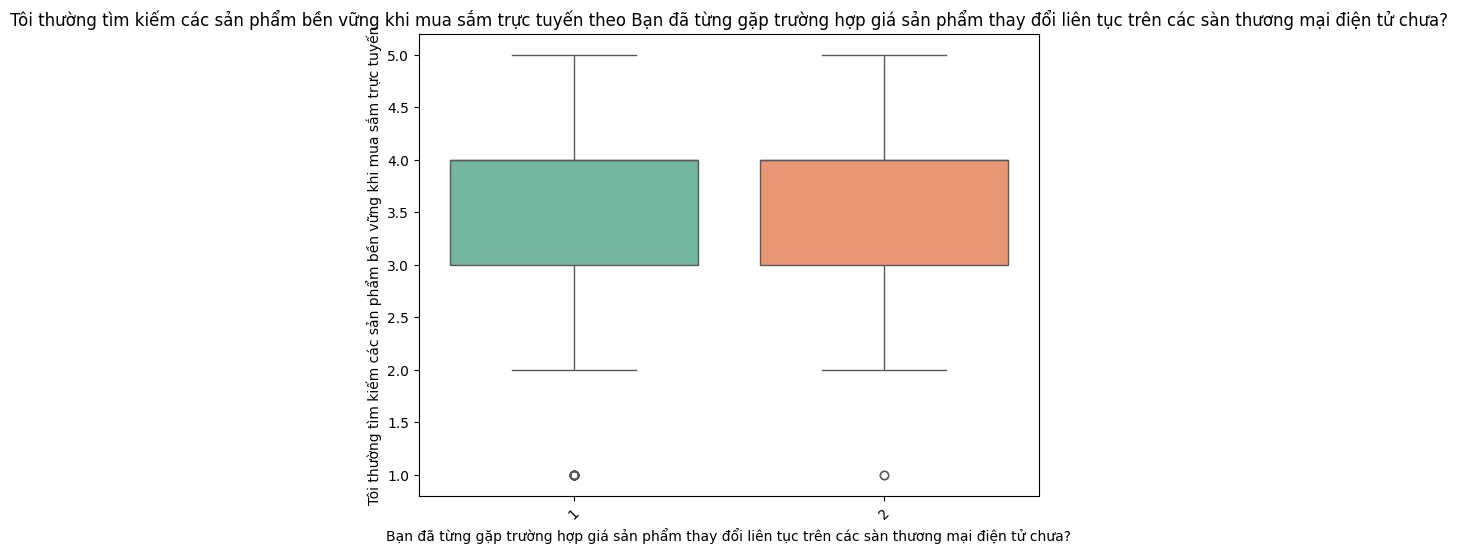

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


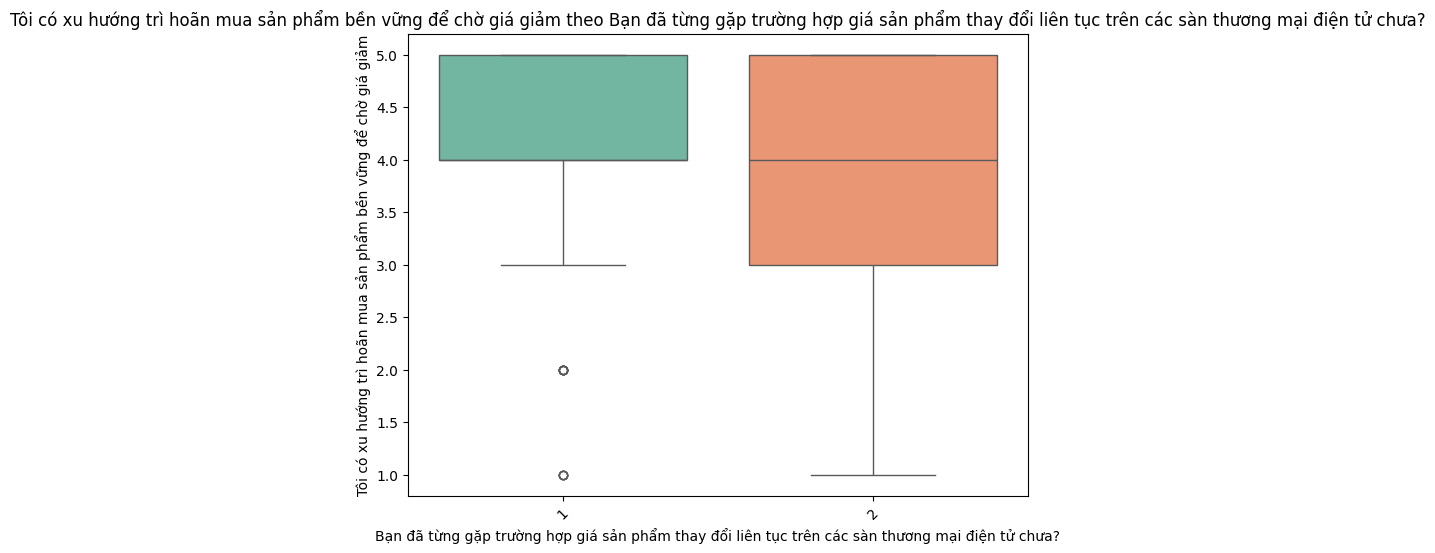

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


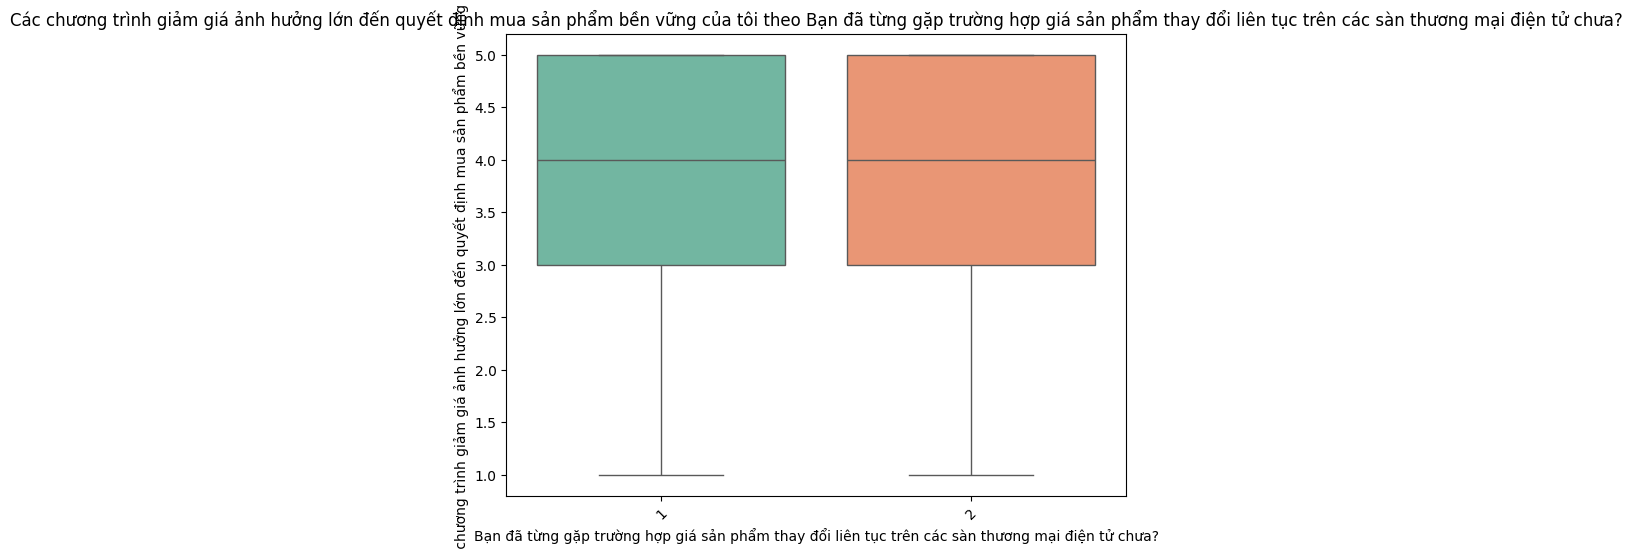

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


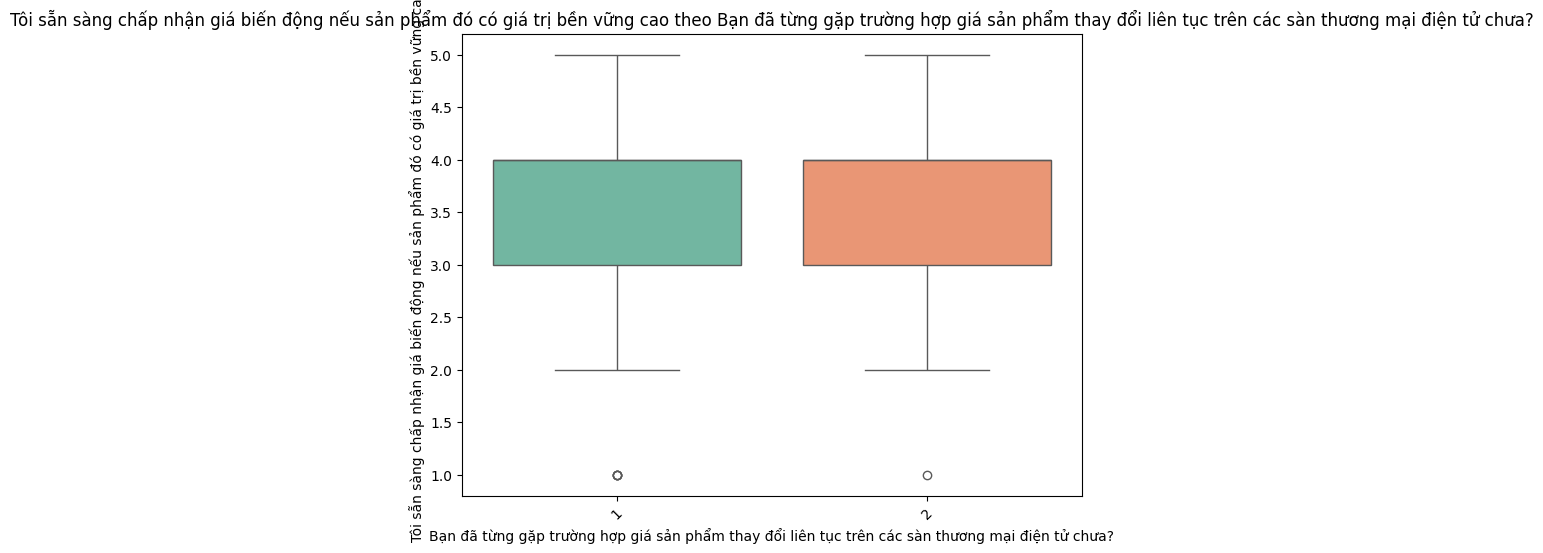

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


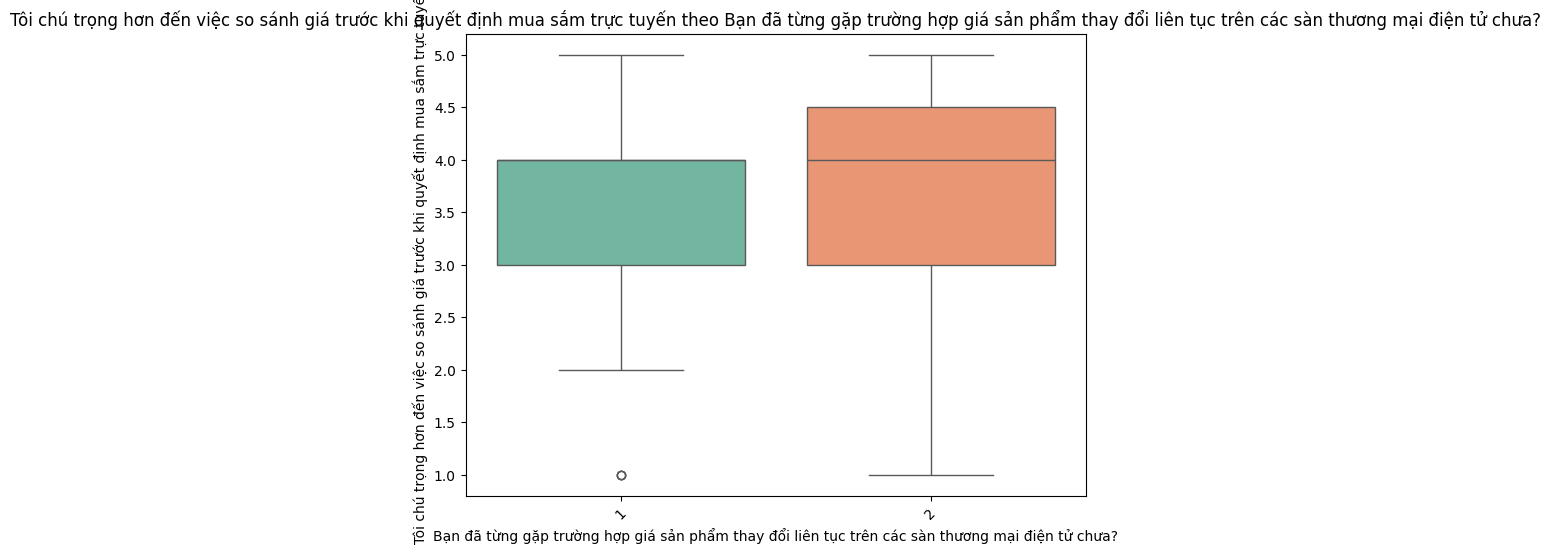

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


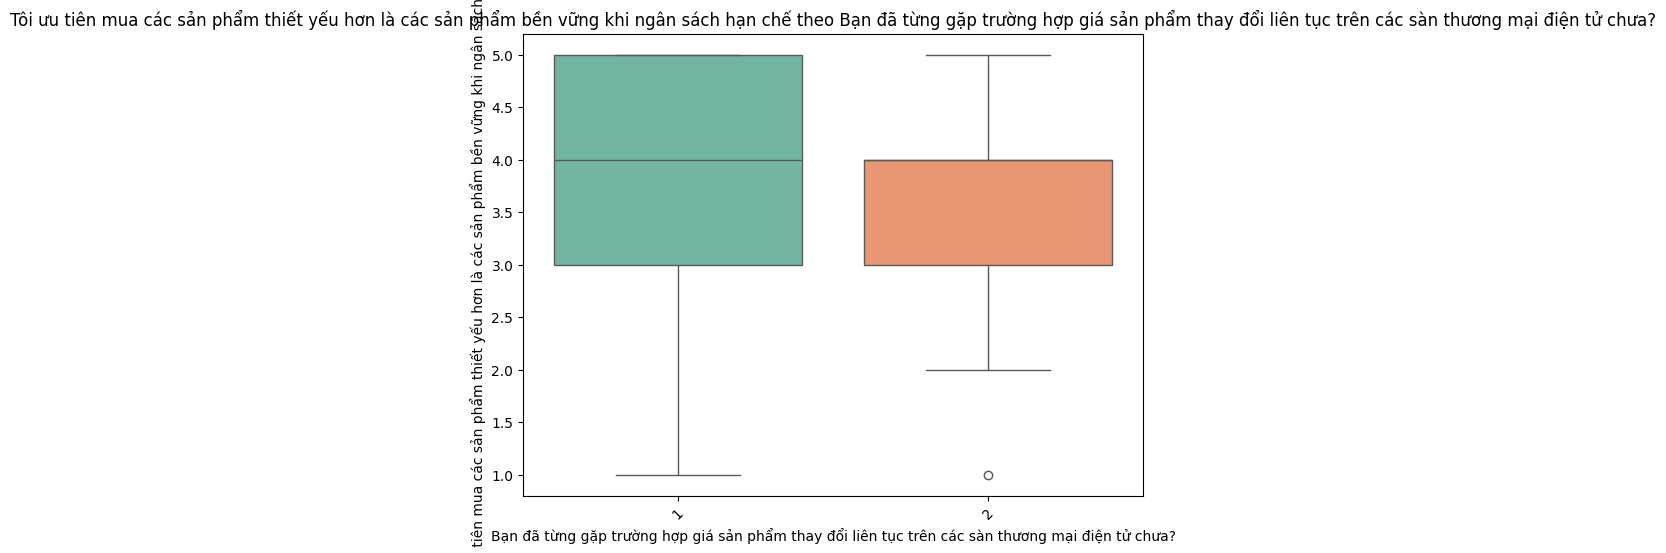

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


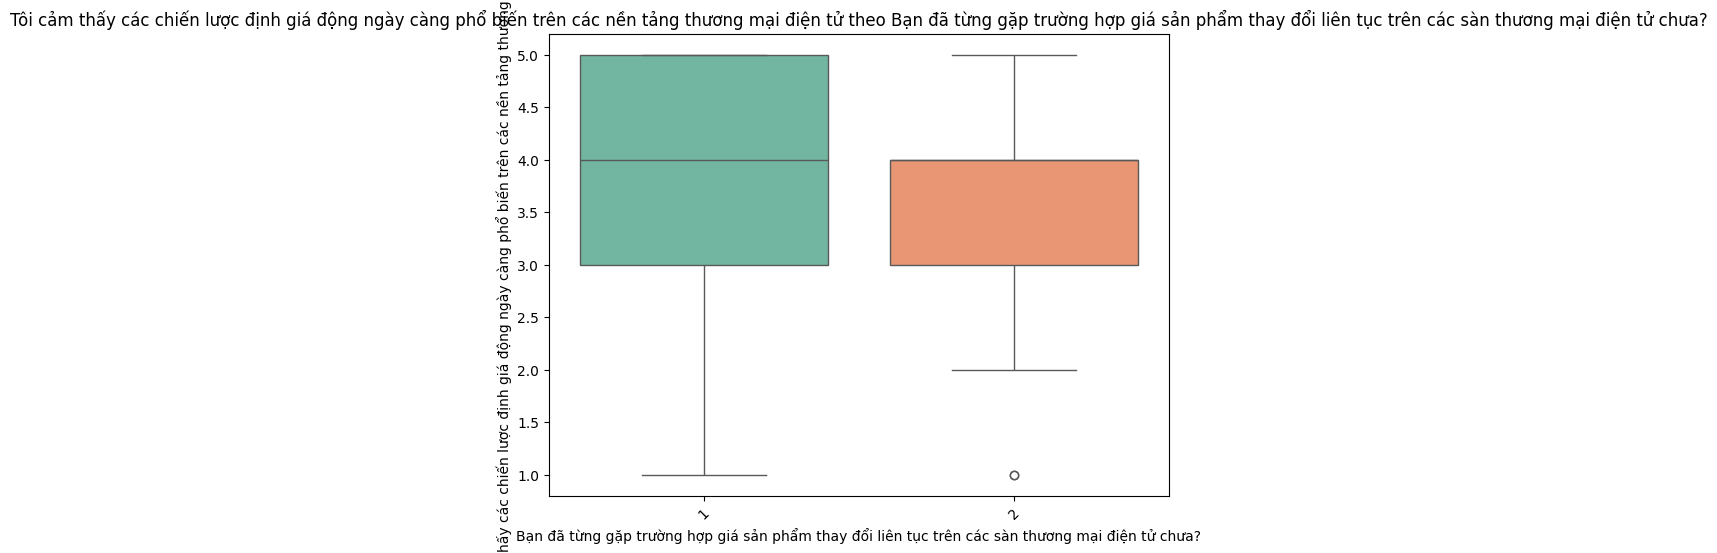

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


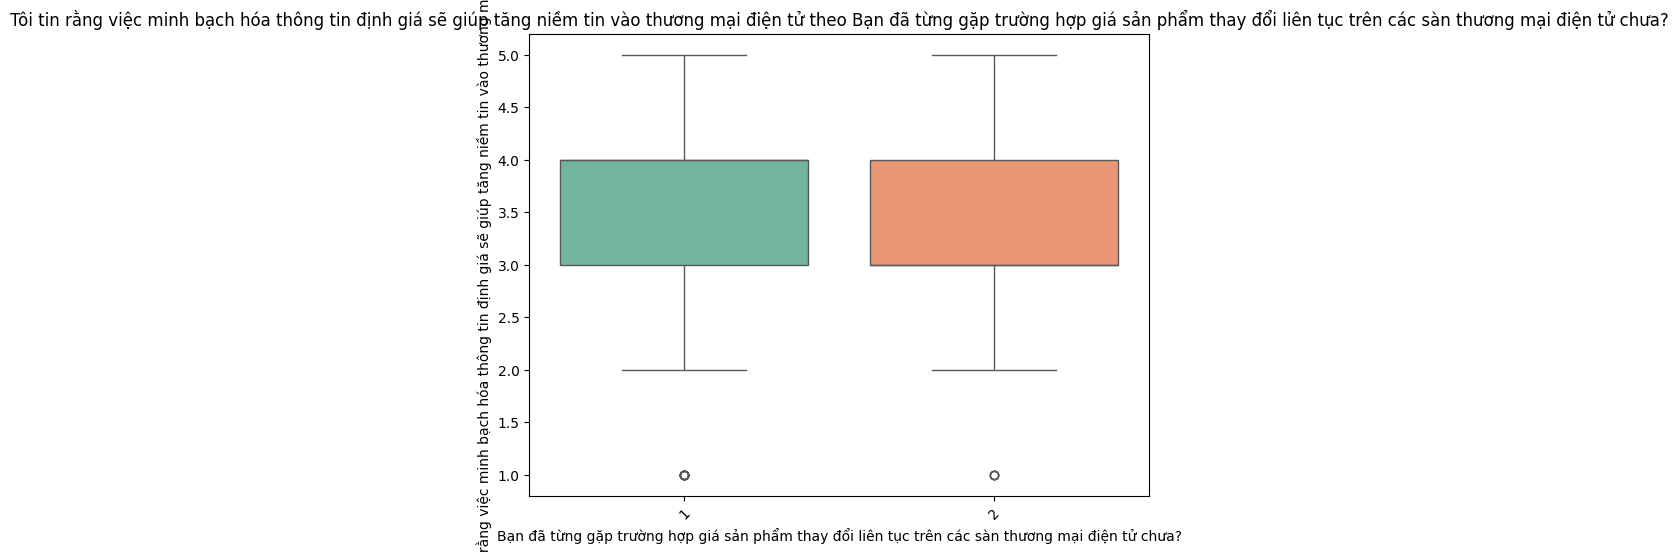

<ipython-input-18-7bb802c55daf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')


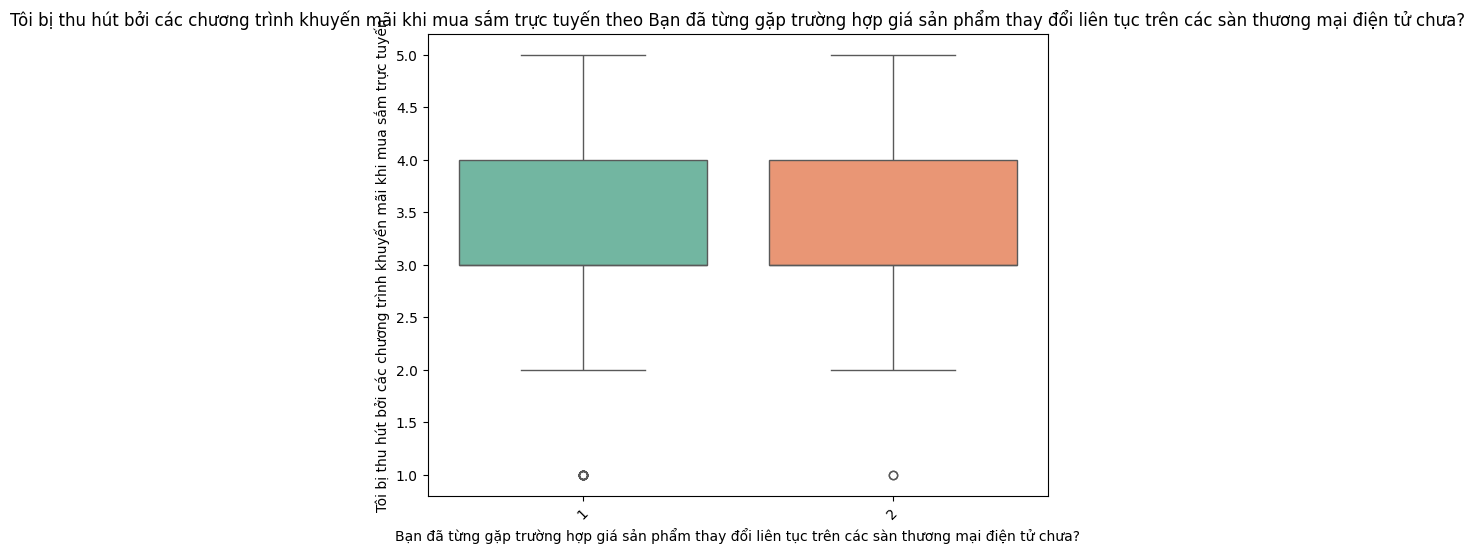

In [18]:

likert_columns = [
    "Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt",
    "Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả",
    "Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ",
    "Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử",
    "Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa",
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm",
    "Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao",
    "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
    "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế",
    "Tôi cảm thấy các chiến lược định giá động ngày càng phổ biến trên các nền tảng thương mại điện tử",
    "Tôi tin rằng việc minh bạch hóa thông tin định giá sẽ giúp tăng niềm tin vào thương mại điện tử",
    "Tôi bị thu hút bởi các chương trình khuyến mãi khi mua sắm trực tuyến"
]
categorical_columns = ['Giới tính', 'Độ tuổi', 'Thu nhập', 'Tần suất mua sắm trực tuyến',
                       'Bạn đã từng gặp trường hợp giá sản phẩm thay đổi liên tục trên các sàn thương mại điện tử chưa?']

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/encoded_form.csv')

for cat_column in categorical_columns:
    for likert_column in likert_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[cat_column], y=data[likert_column], palette='Set2')
        plt.title(f"{likert_column} theo {cat_column}")
        plt.xlabel(cat_column)
        plt.ylabel(likert_column)
        plt.xticks(rotation=45)
        plt.show()


ANOVA

                                                    Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt  \
Dynamic pricing giúp tôi có cơ hội mua sản phẩm...                                           1.000000             
Dynamic pricing khiến tôi cảm thấy khó dự đoán ...                                           0.311617             
Tôi tin rằng dynamic pricing là chiến lược hiệu...                                           0.250038             
Dynamic pricing làm tăng sự cạnh tranh giữa các...                                           0.267407             
Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynami...                                           0.176223             
Tôi ưu tiên mua sản phẩm thân thiện với môi trư...                                           0.540911             
Tôi thường tìm kiếm các sản phẩm bền vững khi m...                                           0.402811             
Tôi có xu hướng trì hoãn mua sản phẩm bền vững ...                              

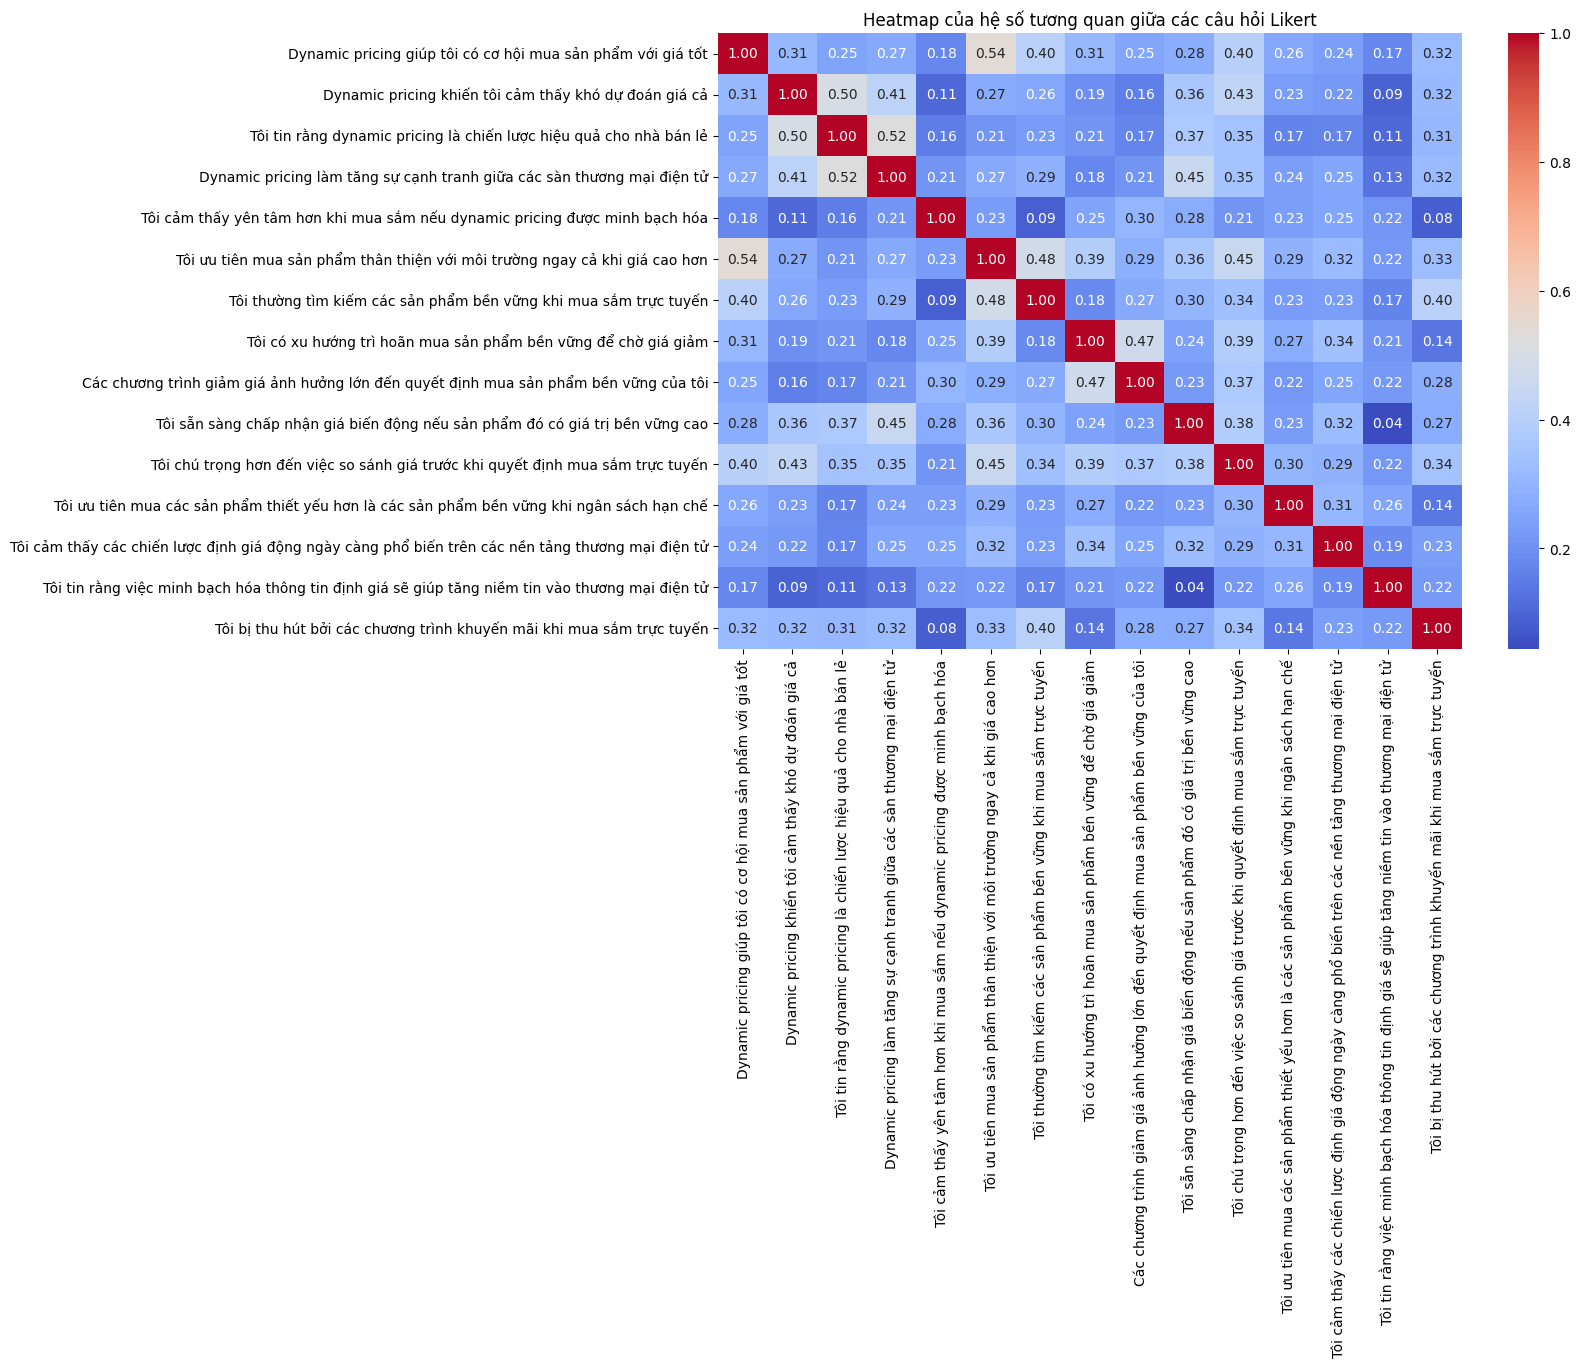

In [20]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/encoded_form.csv'
encoded_form = pd.read_csv(file_path)

likert_columns = [
    "Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt",
    "Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả",
    "Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ",
    "Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử",
    "Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa",
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm",
    "Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao",
    "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
    "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế",
    "Tôi cảm thấy các chiến lược định giá động ngày càng phổ biến trên các nền tảng thương mại điện tử",
    "Tôi tin rằng việc minh bạch hóa thông tin định giá sẽ giúp tăng niềm tin vào thương mại điện tử",
    "Tôi bị thu hút bởi các chương trình khuyến mãi khi mua sắm trực tuyến"
]


correlation_matrix = encoded_form[likert_columns].corr(method='pearson')
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Heatmap của hệ số tương quan giữa các câu hỏi Likert")
plt.show()


composite indicators

In [22]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/encoded_form.csv'
dynamic_pricing_questions = [
    "Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt",
    "Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả",
    "Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ",
    "Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử",
    "Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa"
]

sustainable_behavior_questions = [
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm",
    "Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao"
]

difference_questions = [
   "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
    "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế",
    "Tôi cảm thấy các chiến lược định giá động ngày càng phổ biến trên các nền tảng thương mại điện tử",
    "Tôi tin rằng việc minh bạch hóa thông tin định giá sẽ giúp tăng niềm tin vào thương mại điện tử",
   "Tôi bị thu hút bởi các chương trình khuyến mãi khi mua sắm trực tuyến"
]
encoded_form['Chỉ số đồng thuận với Dynamic Pricing'] = encoded_form[dynamic_pricing_questions].mean(axis=1)
encoded_form['Chỉ số hành vi tiêu dùng bền vững'] = encoded_form[sustainable_behavior_questions].mean(axis=1)
encoded_form['Chỉ số về các yếu tố khác'] = encoded_form[difference_questions].mean(axis=1)

print(encoded_form[['Chỉ số đồng thuận với Dynamic Pricing', 'Chỉ số hành vi tiêu dùng bền vững']].head())
print(encoded_form[['Chỉ số về các yếu tố khác']].head())

   Chỉ số đồng thuận với Dynamic Pricing  Chỉ số hành vi tiêu dùng bền vững
0                                    4.0                                3.8
1                                    3.8                                3.8
2                                    3.2                                3.4
3                                    4.0                                4.0
4                                    3.4                                4.2
   Chỉ số về các yếu tố khác
0                        4.0
1                        3.6
2                        3.2
3                        4.6
4                        4.6


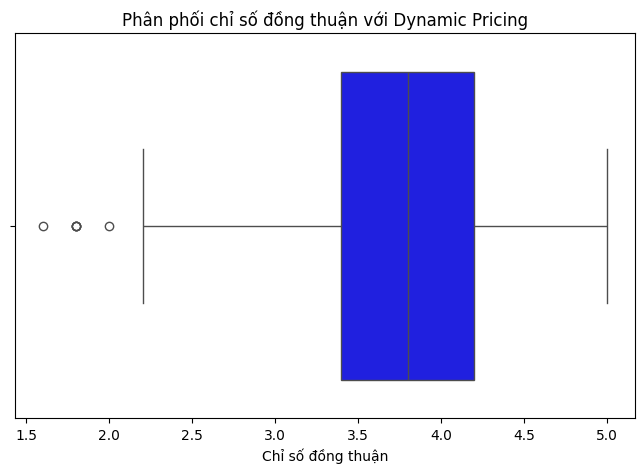

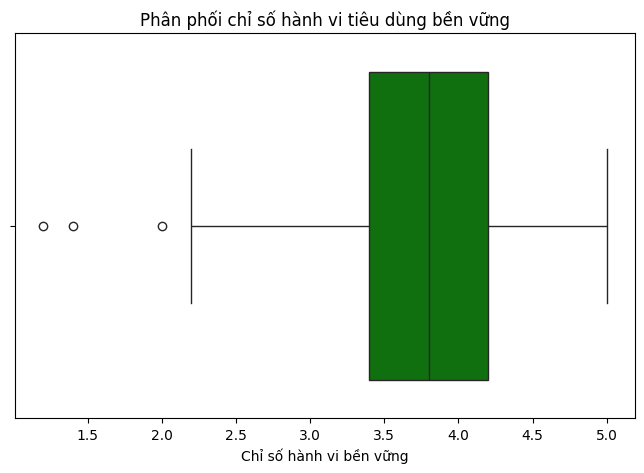

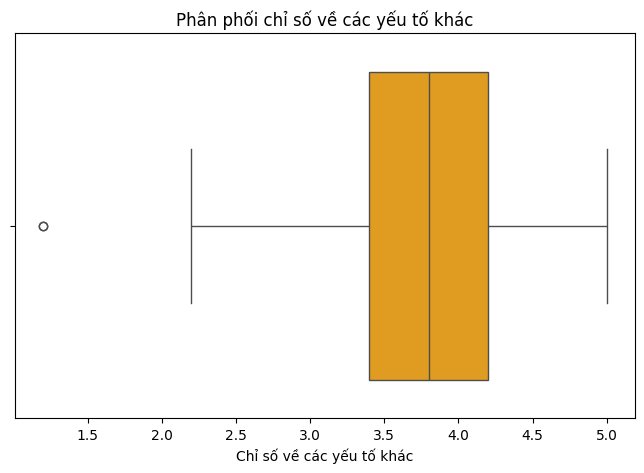

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=encoded_form['Chỉ số đồng thuận với Dynamic Pricing'], color='blue')
plt.title('Phân phối chỉ số đồng thuận với Dynamic Pricing')
plt.xlabel('Chỉ số đồng thuận')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=encoded_form['Chỉ số hành vi tiêu dùng bền vững'], color='green')
plt.title('Phân phối chỉ số hành vi tiêu dùng bền vững')
plt.xlabel('Chỉ số hành vi bền vững')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=encoded_form['Chỉ số về các yếu tố khác'], color='orange')
plt.title('Phân phối chỉ số về các yếu tố khác')
plt.xlabel('Chỉ số về các yếu tố khác')
plt.show()

kiểm tra độ tin cậy

In [24]:
import pandas as pd
import numpy as np

def cronbach_alpha(df):
    """
    Tính hệ số Cronbach's Alpha.
    df: DataFrame chứa các câu hỏi Likert trong cùng một nhóm.
    """
    df = df.dropna()
    item_variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]
    alpha = (n_items / (n_items - 1)) * (1 - (item_variances.sum() / total_variance))
    return alpha

dynamic_pricing_questions = [
    "Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt",
    "Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả",
    "Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ",
    "Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử",
    "Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa"
]

dynamic_pricing_alpha = cronbach_alpha(encoded_form[dynamic_pricing_questions])
print(f"Hệ số Cronbach's Alpha cho nhóm Dynamic Pricing: {dynamic_pricing_alpha:.2f}")


Hệ số Cronbach's Alpha cho nhóm Dynamic Pricing: 0.68


In [25]:
sustainable_behavior_questions = [
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm",
    "Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao"
]
sustainable_behavior_alpha = cronbach_alpha(encoded_form[sustainable_behavior_questions])
print(f"Hệ số Cronbach's Alpha cho nhóm Hành vi Tối Ưu: {sustainable_behavior_alpha:.2f}")

Hệ số Cronbach's Alpha cho nhóm Hành vi Tối Ưu: 0.70


In [26]:

difference_questions = [
   "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
    "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế",
    "Tôi cảm thấy các chiến lược định giá động ngày càng phổ biến trên các nền tảng thương mại điện tử",
    "Tôi tin rằng việc minh bạch hóa thông tin định giá sẽ giúp tăng niềm tin vào thương mại điện tử",
   "Tôi bị thu hút bởi các chương trình khuyến mãi khi mua sắm trực tuyến"
]
difference_alpha = cronbach_alpha(encoded_form[difference_questions])
print(f"Hệ số Cronbach's Alpha cho nhóm Các yếu tố khác: {difference_alpha:.2f}")

Hệ số Cronbach's Alpha cho nhóm Các yếu tố khác: 0.62


pHÂN TÍCH HỒI QUY


=== Hồi quy tuyến tính ===
Hệ số hồi quy: 0.5893433876360533
Hệ số chặn: 1.649169452941595
R^2: 0.3625590673460467


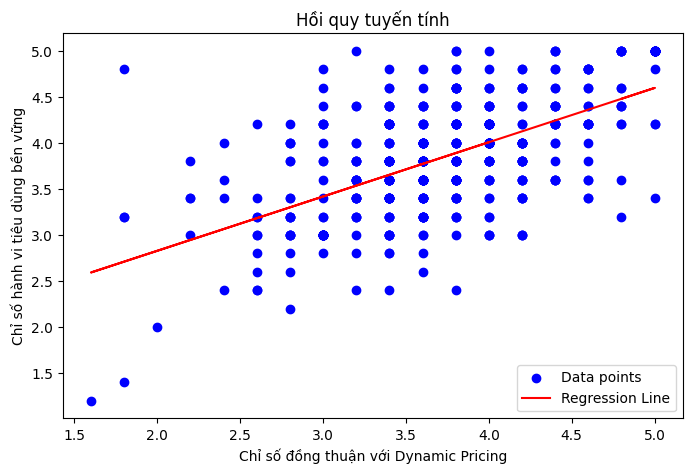


=== Hồi quy logistic ===
Hệ số hồi quy: 1.6747934424262874
Hệ số chặn: -6.371506804321244
Accuracy: 0.7068965517241379

Ma trận nhầm lẫn:
[[196  48]
 [ 88 132]]

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       244
           1       0.73      0.60      0.66       220

    accuracy                           0.71       464
   macro avg       0.71      0.70      0.70       464
weighted avg       0.71      0.71      0.70       464

AUC-ROC: 0.76


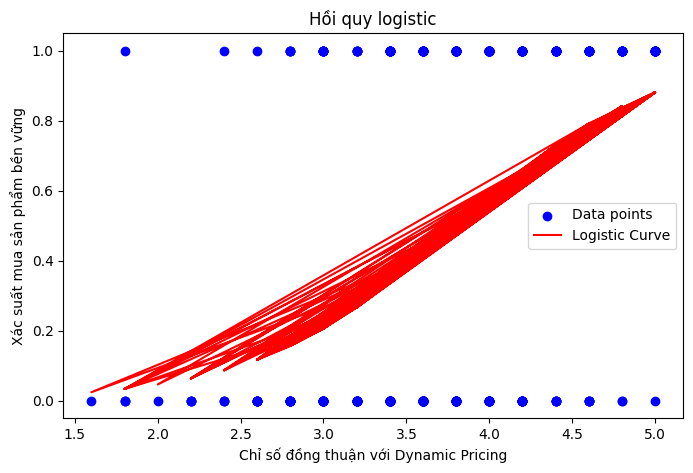

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
file_path = '/content/drive/MyDrive/Colab Notebooks/encoded_form.csv'

dynamic_pricing_questions = [
    "Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt",
    "Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả",
    "Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ",
    "Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử",
    "Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa"
]

sustainable_behavior_questions = [
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm",
    "Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao"
]

cleaned_data['Chỉ số đồng thuận với Dynamic Pricing'] = cleaned_data[dynamic_pricing_questions].mean(axis=1)
cleaned_data['Chỉ số hành vi tiêu dùng bền vững'] = cleaned_data[sustainable_behavior_questions].mean(axis=1)


print("\n=== Hồi quy tuyến tính ===")
X_linear = cleaned_data[['Chỉ số đồng thuận với Dynamic Pricing']].values
y_linear = cleaned_data['Chỉ số hành vi tiêu dùng bền vững'].values

linear_model = LinearRegression()
linear_model.fit(X_linear, y_linear)


print(f"Hệ số hồi quy: {linear_model.coef_[0]}")
print(f"Hệ số chặn: {linear_model.intercept_}")
print(f"R^2: {linear_model.score(X_linear, y_linear)}")

plt.figure(figsize=(8, 5))
plt.scatter(X_linear, y_linear, color='blue', label='Data points')
plt.plot(X_linear, linear_model.predict(X_linear), color='red', label='Regression Line')
plt.xlabel('Chỉ số đồng thuận với Dynamic Pricing')
plt.ylabel('Chỉ số hành vi tiêu dùng bền vững')
plt.title('Hồi quy tuyến tính')
plt.legend()
plt.show()


print("\n=== Hồi quy logistic ===")

threshold = cleaned_data['Chỉ số hành vi tiêu dùng bền vững'].median()
cleaned_data['Mua sản phẩm bền vững'] = (cleaned_data['Chỉ số hành vi tiêu dùng bền vững'] > threshold).astype(int)


X_logistic = cleaned_data[['Chỉ số đồng thuận với Dynamic Pricing']].values
y_logistic = cleaned_data['Mua sản phẩm bền vững'].values


logistic_model = LogisticRegression()
logistic_model.fit(X_logistic, y_logistic)


print(f"Hệ số hồi quy: {logistic_model.coef_[0][0]}")
print(f"Hệ số chặn: {logistic_model.intercept_[0]}")
print(f"Accuracy: {logistic_model.score(X_logistic, y_logistic)}")


y_pred = logistic_model.predict(X_logistic)
conf_matrix = confusion_matrix(y_logistic, y_pred)
print("\nMa trận nhầm lẫn:")
print(conf_matrix)
print("\nBáo cáo phân loại:")
print(classification_report(y_logistic, y_pred))

y_prob = logistic_model.predict_proba(X_logistic)[:, 1]
auc_score = roc_auc_score(y_logistic, y_prob)
print(f"AUC-ROC: {auc_score:.2f}")


plt.figure(figsize=(8, 5))
plt.scatter(X_logistic, y_logistic, color='blue', label='Data points')
plt.plot(X_logistic, logistic_model.predict_proba(X_logistic)[:, 1], color='red', label='Logistic Curve')
plt.xlabel('Chỉ số đồng thuận với Dynamic Pricing')
plt.ylabel('Xác suất mua sản phẩm bền vững')
plt.title('Hồi quy logistic')
plt.legend()
plt.show()


hồi quy tuyến tính đa biến

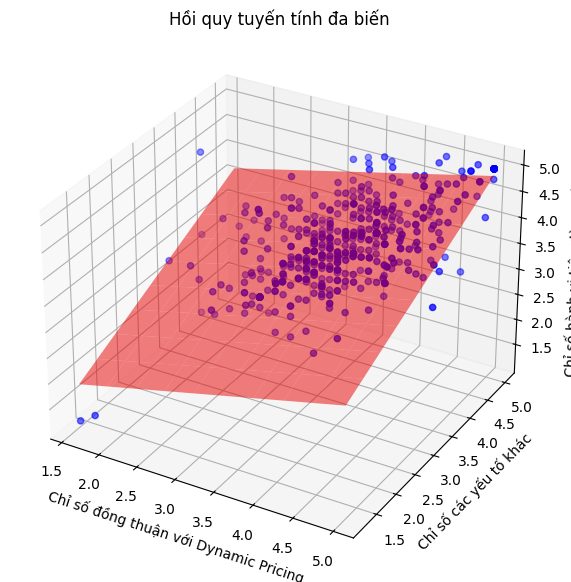

In [30]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cleaned_form['Chỉ số đồng thuận với Dynamic Pricing'],
           cleaned_form['Chỉ số các yếu tố khác'],
           cleaned_form['Chỉ số hành vi tiêu dùng bền vững'],
           color='blue', label='Data points')

x1, x2 = np.meshgrid(np.linspace(X_multivariate_linear[:, 0].min(), X_multivariate_linear[:, 0].max(), 10),
                     np.linspace(X_multivariate_linear[:, 1].min(), X_multivariate_linear[:, 1].max(), 10))
y_pred = multi_linear_model.intercept_ + multi_linear_model.coef_[0] * x1 + multi_linear_model.coef_[1] * x2
ax.plot_surface(x1, x2, y_pred, color='red', alpha=0.5, label='Regression Plane')

ax.set_xlabel('Chỉ số đồng thuận với Dynamic Pricing')
ax.set_ylabel('Chỉ số các yếu tố khác')
ax.set_zlabel('Chỉ số hành vi tiêu dùng bền vững')
plt.title('Hồi quy tuyến tính đa biến')
plt.show()

Hồi quy logistics đa biến


=== Hồi quy logistic đa biến ===
Hệ số hồi quy (Dynamic Pricing): 1.0740681756797814
Hệ số hồi quy (Các yếu tố khác): 1.6092358958858022
Hệ số chặn: -10.154328819201787
Accuracy: 0.7349137931034483

Ma trận nhầm lẫn:
[[185  59]
 [ 64 156]]

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       244
           1       0.73      0.71      0.72       220

    accuracy                           0.73       464
   macro avg       0.73      0.73      0.73       464
weighted avg       0.73      0.73      0.73       464

AUC-ROC: 0.81


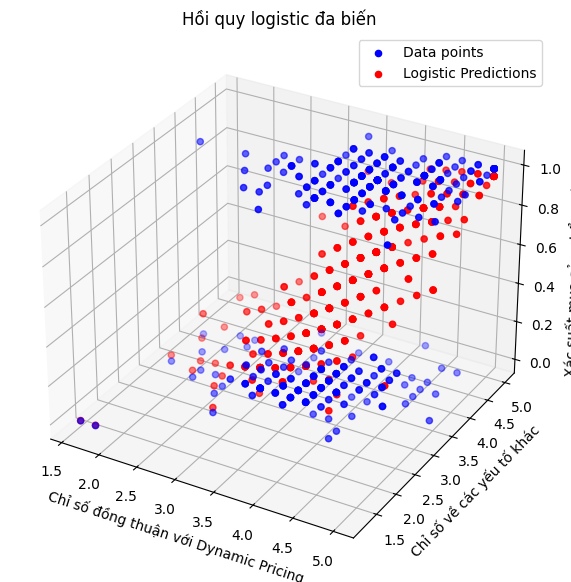

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drive/MyDrive/Colab Notebooks/encoded_form.csv'

dynamic_pricing_questions = [
    "Dynamic pricing giúp tôi có cơ hội mua sản phẩm với giá tốt",
    "Dynamic pricing khiến tôi cảm thấy khó dự đoán giá cả",
    "Tôi tin rằng dynamic pricing là chiến lược hiệu quả cho nhà bán lẻ",
    "Dynamic pricing làm tăng sự cạnh tranh giữa các sàn thương mại điện tử",
    "Tôi cảm thấy yên tâm hơn khi mua sắm nếu dynamic pricing được minh bạch hóa"
]

sustainable_behavior_questions = [
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi có xu hướng trì hoãn mua sản phẩm bền vững để chờ giá giảm",
    "Các chương trình giảm giá ảnh hưởng lớn đến quyết định mua sản phẩm bền vững của tôi",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao"
]

difference_questions = [
    "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
    "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế",
    "Tôi cảm thấy các chiến lược định giá động ngày càng phổ biến trên các nền tảng thương mại điện tử",
    "Tôi tin rằng việc minh bạch hóa thông tin định giá sẽ giúp tăng niềm tin vào thương mại điện tử",
    "Tôi bị thu hút bởi các chương trình khuyến mãi khi mua sắm trực tuyến"
]

cleaned_form['Chỉ số đồng thuận với Dynamic Pricing'] = cleaned_form[dynamic_pricing_questions].mean(axis=1)
cleaned_form['Chỉ số hành vi tiêu dùng bền vững'] = cleaned_form[sustainable_behavior_questions].mean(axis=1)
cleaned_form['Chỉ số COVID-19'] = cleaned_form[difference_questions].mean(axis=1)

threshold = cleaned_form['Chỉ số hành vi tiêu dùng bền vững'].median()
cleaned_form['Mua sản phẩm bền vững'] = (cleaned_form['Chỉ số hành vi tiêu dùng bền vững'] > threshold).astype(int)

print("\n=== Hồi quy logistic đa biến ===")

X_multivariate_logistic = cleaned_form[['Chỉ số đồng thuận với Dynamic Pricing', 'Chỉ số COVID-19']].values
y_multivariate_logistic = cleaned_form['Mua sản phẩm bền vững'].values

multi_logistic_model = LogisticRegression()
multi_logistic_model.fit(X_multivariate_logistic, y_multivariate_logistic)

print(f"Hệ số hồi quy (Dynamic Pricing): {multi_logistic_model.coef_[0][0]}")
print(f"Hệ số hồi quy (Các yếu tố khác): {multi_logistic_model.coef_[0][1]}")
print(f"Hệ số chặn: {multi_logistic_model.intercept_[0]}")
print(f"Accuracy: {multi_logistic_model.score(X_multivariate_logistic, y_multivariate_logistic)}")

y_pred = multi_logistic_model.predict(X_multivariate_logistic)
y_prob = multi_logistic_model.predict_proba(X_multivariate_logistic)[:, 1]

print("\nMa trận nhầm lẫn:")
print(confusion_matrix(y_multivariate_logistic, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_multivariate_logistic, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_multivariate_logistic, y_prob):.2f}")

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cleaned_form['Chỉ số đồng thuận với Dynamic Pricing'],
           cleaned_form['Chỉ số COVID-19'],
           y_multivariate_logistic,
           color='blue', label='Data points')

y_pred_prob = multi_logistic_model.predict_proba(X_multivariate_logistic)[:, 1]
ax.scatter(X_multivariate_logistic[:, 0],
           X_multivariate_logistic[:, 1],
           y_pred_prob,
           color='red', label='Logistic Predictions')

ax.set_xlabel('Chỉ số đồng thuận với Dynamic Pricing')
ax.set_ylabel('Chỉ số về các yếu tố khác')
ax.set_zlabel('Xác suất mua sản phẩm bền vững')
plt.title('Hồi quy logistic đa biến')
plt.legend()
plt.show()


Phân nhóm

         Price Sensitivity Index  Sustainability Index
Cluster                                               
0                       3.439163              3.266160
1                       4.422886              4.240464


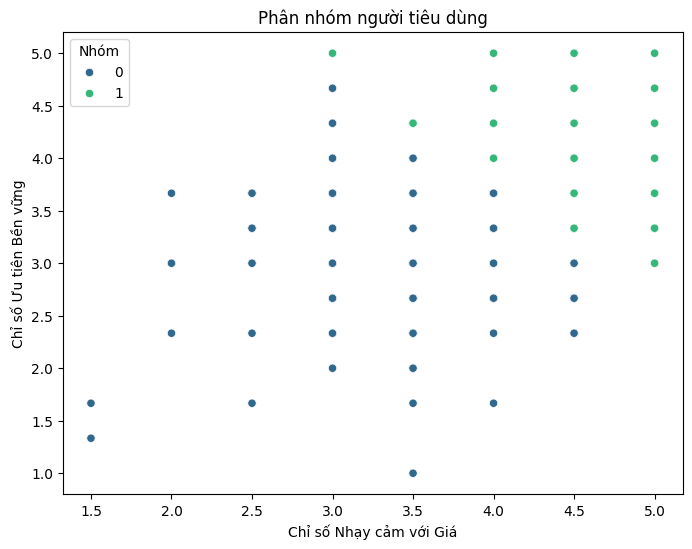

In [37]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/Colab Notebooks/encoded_form.csv'
encoded_form = pd.read_csv(file_path)

price_sensitive_questions = [
    "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
    "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế"
]

sustainability_questions = [
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao"
]

encoded_form['Price Sensitivity Index'] = encoded_form[price_sensitive_questions].mean(axis=1)
encoded_form['Sustainability Index'] = encoded_form[sustainability_questions].mean(axis=1)

X = encoded_form[['Price Sensitivity Index', 'Sustainability Index']]

kmeans = KMeans(n_clusters=2, random_state=42)
encoded_form['Cluster'] = kmeans.fit_predict(X)

cluster_summary = encoded_form.groupby('Cluster')[['Price Sensitivity Index', 'Sustainability Index']].mean()
print(cluster_summary)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=encoded_form['Price Sensitivity Index'], y=encoded_form['Sustainability Index'], hue=encoded_form['Cluster'], palette='viridis')
plt.title('Phân nhóm người tiêu dùng')
plt.xlabel('Chỉ số Nhạy cảm với Giá')
plt.ylabel('Chỉ số Ưu tiên Bền vững')
plt.legend(title='Nhóm')
plt.show()


phân tích đặc điểm

Tóm tắt đặc điểm của từng nhóm:
         Price Sensitivity Index  Sustainability Index
Cluster                                               
0                       3.439163              3.266160
1                       4.422886              4.240464


<ipython-input-39-bfb6be1469fe>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=encoded_form['Cluster'], y=encoded_form[col], palette='viridis')


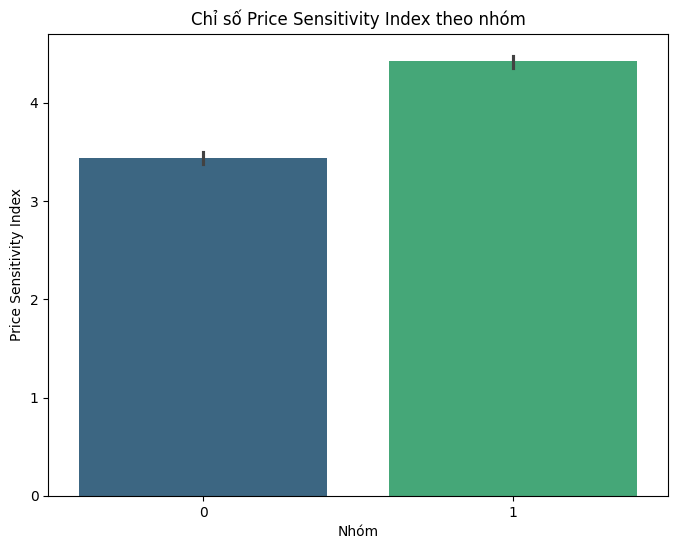

<ipython-input-39-bfb6be1469fe>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=encoded_form['Cluster'], y=encoded_form[col], palette='viridis')


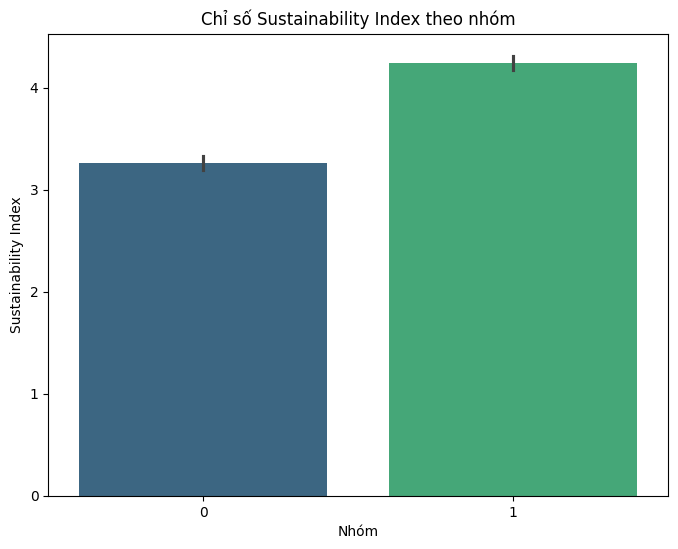

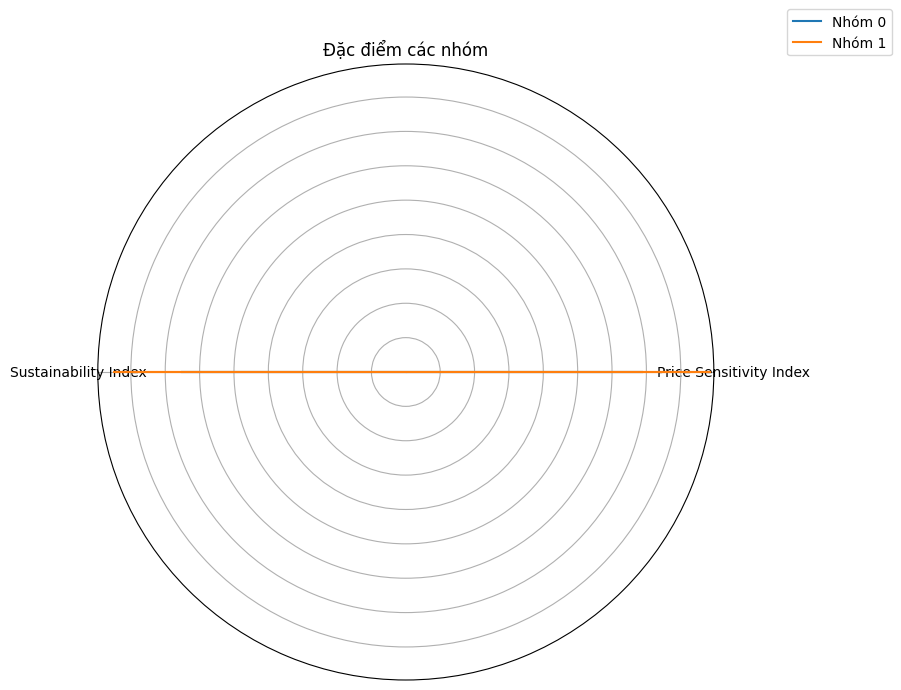

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drive/MyDrive/Colab Notebooks/encoded_form.csv'
encoded_form = pd.read_csv(file_path)

price_sensitive_questions = [
    "Tôi chú trọng hơn đến việc so sánh giá trước khi quyết định mua sắm trực tuyến",
    "Tôi ưu tiên mua các sản phẩm thiết yếu hơn là các sản phẩm bền vững khi ngân sách hạn chế"
]

sustainability_questions = [
    "Tôi ưu tiên mua sản phẩm thân thiện với môi trường ngay cả khi giá cao hơn",
    "Tôi thường tìm kiếm các sản phẩm bền vững khi mua sắm trực tuyến",
    "Tôi sẵn sàng chấp nhận giá biến động nếu sản phẩm đó có giá trị bền vững cao"
]

encoded_form['Price Sensitivity Index'] = encoded_form[price_sensitive_questions].mean(axis=1)
encoded_form['Sustainability Index'] = encoded_form[sustainability_questions].mean(axis=1)

X = encoded_form[['Price Sensitivity Index', 'Sustainability Index']]

kmeans = KMeans(n_clusters=2, random_state=42)
encoded_form['Cluster'] = kmeans.fit_predict(X)

group_summary = encoded_form.groupby('Cluster')[['Price Sensitivity Index', 'Sustainability Index']].mean()
print("Tóm tắt đặc điểm của từng nhóm:")
print(group_summary)
for col in ['Price Sensitivity Index', 'Sustainability Index']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=encoded_form['Cluster'], y=encoded_form[col], palette='viridis')
    plt.title(f"Chỉ số {col} theo nhóm")
    plt.xlabel('Nhóm')
    plt.ylabel(col)
    plt.show()

def plot_radar(data, categories, group_labels, title):
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    for group, label in zip(data, group_labels):
        values = group.tolist()
        values += values[:1]
        ax.plot(angles, values, label=label)
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title(title)
    plt.show()

categories = ['Price Sensitivity Index', 'Sustainability Index']
radar_data = group_summary.values
plot_radar(radar_data, categories, ['Nhóm 0', 'Nhóm 1'], "Đặc điểm các nhóm")

In [40]:

persona = {
    "Nhóm 0": {
        "Đặc điểm": "Nhạy cảm giá, thích khuyến mãi, ít quan tâm đến bền vững.",
        "Chiến lược": "Tăng cường giảm giá, tập trung chương trình khuyến mãi."
    },
    "Nhóm 1": {
        "Đặc điểm": "Ưu tiên bền vững, ít nhạy cảm giá, quan tâm đến minh bạch.",
        "Chiến lược": "Nhấn mạnh giá trị môi trường, cải thiện thông tin minh bạch."
    }
}

for group, details in persona.items():
    print(f"{group}:")
    for key, value in details.items():
        print(f"  {key}: {value}")


Nhóm 0:
  Đặc điểm: Nhạy cảm giá, thích khuyến mãi, ít quan tâm đến bền vững.
  Chiến lược: Tăng cường giảm giá, tập trung chương trình khuyến mãi.
Nhóm 1:
  Đặc điểm: Ưu tiên bền vững, ít nhạy cảm giá, quan tâm đến minh bạch.
  Chiến lược: Nhấn mạnh giá trị môi trường, cải thiện thông tin minh bạch.
